# AlphaPept Systems Check

This notebook will run several tests and compare the performance to MaxQuant. Depending on the machine, this can take several hours.
Each run is called via the `test_ci.py` script, which downloads files to a temporary folder which can be specified in this file.

This notebook requires the `matplotlib_venn` (`!pip install matplotlib_venn`) package.

## Reference Data

Download MaxQuant reference files. Referance MaxQuant data from `PXD006109` and `PXD010012` were taken from the paper, the others were analyzed with `MaxQuant_1.6.14`, default settings w/o second peptides and provided with the given contaminants file.

In [9]:
import os
import sys
sys.path.append(os.path.join(".."))
import test_ci

try:
    import wget
except ImportError:
    !pip install wget
    import wget
    
FILE_DICT = {}
#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/1E2G1IwgcgdsCHC/download' #OLD MQ FILES
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/Fn2uxeYNL60JSd3/download'

#FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/vMNferEoSoROJbb/download' #AP Files
#FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/KLBotZbodMByigh/download'

FILE_DICT['PXD006109_ref.txt'] = 'https://datashare.biochem.mpg.de/s/fLhxQ8mVb29x9xH/download'
FILE_DICT['PXD006109_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/BkMMHPregCQgKLg/download'
FILE_DICT['PXD010012_ref.txt'] = 'https://datashare.biochem.mpg.de/s/ps226k7Fme1K0jf/download'
FILE_DICT['PXD010012_ref_evd.txt'] = 'https://datashare.biochem.mpg.de/s/pyhKMrytjdDU2sX/download'
FILE_DICT['bruker_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/fRcoGuwlcbH2SBJ/download'
FILE_DICT['thermo_HeLa_evd.txt'] = 'https://datashare.biochem.mpg.de/s/p4Omj9K5hHmSoDl/download'

tmp_folder = os.path.join(os.getcwd(),'./temp')


BASE_DIR = os.path.join(tmp_folder, './test_files/') # Storarge location for test files
TEST_DIR = os.path.join(tmp_folder, './test_temp/')
ARCHIVE_DIR = os.path.join(tmp_folder, './test_archive/')

MONGODB_USER = 'github_actions'
MONGODB_URL = 'ci.yue0n.mongodb.net/'

if not os.path.isdir(tmp_folder):
    os.mkdir(tmp_folder)


test_ci.config_test_paths(BASE_DIR, TEST_DIR, ARCHIVE_DIR, MONGODB_USER, MONGODB_URL)


    
for file in FILE_DICT:
    target = os.path.join(tmp_folder, file)
    if not os.path.isfile(target):
        wget.download(FILE_DICT[file], target)
        
software_1 = 'AlphaPept'
software_2 = 'MaxQuant'

## Single Files

Compare to the single HeLa test files

### Thermo Hela

In [5]:
%run -i ../test_ci.py $tmp_folder thermo_irt

start processing, tmp folder is /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/./temp
2021-05-19 15:44:41> Creating dir /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/./temp/./test_temp/.
2021-05-19 15:44:41> Logging to /Users/constantin/alphapept/logs/log_20210519154441.txt.
2021-05-19 15:44:41> Platform information:
2021-05-19 15:44:41> system     - Darwin
2021-05-19 15:44:41> release    - 20.3.0
2021-05-19 15:44:41> version    - 10.16
2021-05-19 15:44:41> machine    - x86_64
2021-05-19 15:44:41> processor  - i386
2021-05-19 15:44:41> cpu count  - 8
2021-05-19 15:44:41> ram memory - 22.4/32.0 Gb (available/total)
2021-05-19 15:44:41> 
2021-05-19 15:44:41> Python information:
2021-05-19 15:44:41> SQLAlchemy     - 1.3.22
2021-05-19 15:44:41> alphapept      - 0.3.21
2021-05-19 15:44:41> biopython      - 1.78
2021-05-19 15:44:41> click          - 7.1.2
2021-05-19 15:44:41> comtypes       - 1.1.7
2021-05-19 15:44:41> fastcore       - 1.3.5
2021-05-19 

2021-05-19 15:44:41> FASTA contains 247 entries.


In [1]:
%run -i ../test_ci.py $tmp_folder thermo_hela

#test_ci.main(runtype = "thermo_hela", new_files = False)

Exception: File `'../test_ci.py'` not found.

In [ ]:
try:
    import matplotlib_venn
except ModuleNotFoundError:
    !pip install matplotlib_venn
    import matplotlib_venn

  Using cached matplotlib_venn-0.11.6-py3-none-any.whl


In [ ]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank
import os

df1, df2 = prepare_files(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'), os.path.join(TEST_DIR,'thermo_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

OSError: Unable to open file (unable to open file: name = '/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/temp/test_temp/thermo_HeLa.ms_data.hdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Calling custom steps of the pipeline

Work with already processed results and call individual steps

--- ML ---
2021-05-18 17:38:38> 53,140 target (5,314 decoy) of 63856 PSMs. fdr 0.100000 for a cutoff of 19.78 (set fdr was 0.1)
2021-05-18 17:38:38> Training & cross-validation on 45231 targets and 45231 decoys
2021-05-18 17:49:03> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-05-18 17:49:04> The train accuracy was 0.9185072185005859
2021-05-18 17:49:04> Testing on 11308 targets and 11308 decoys
2021-05-18 17:49:04> The test accuracy was 0.9128493102228511
2021-05-18 17:49:04> Top features {'y_hits': 0.2632153784423396, 'x_tandem': 0.19475201136745815, 'hits': 0.16390101065886034, 'matched_ion_fraction': 0.07468265899862953, 'matched_int_ratio': 0.045574409611358314, 'n_ions': 0.0421421644610647, 'n_missed': 0.032396526003453475, 'matched_int': 0.03066801843932354, 'b_hits': 0.02488281794928554, 'mz': 0.01787167472360012, 'o_mass': 0.01194669078184687, 'o_mass_ppm': 0.010686224417954105, 'y-NH3_hits': 0.009101990688

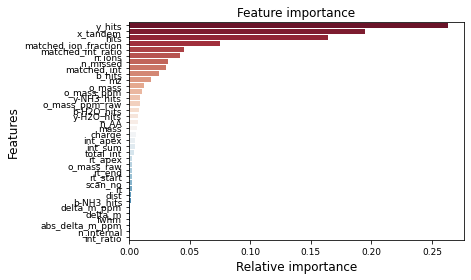

2021-05-18 17:49:04> Filter df with x_tandem score
2021-05-18 17:49:07> Global FDR on precursor
2021-05-18 17:49:07> 44,708 target (447 decoy) of 61971 PSMs. fdr 0.009998 for a cutoff of 0.70 (set fdr was 0.01)


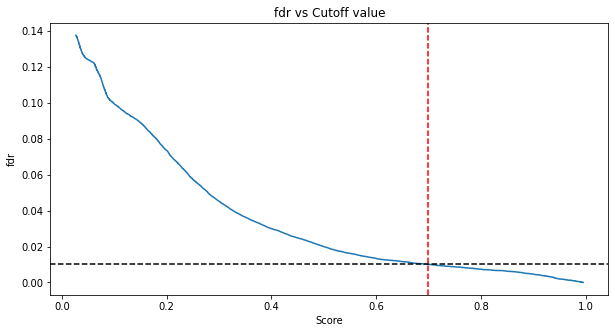

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


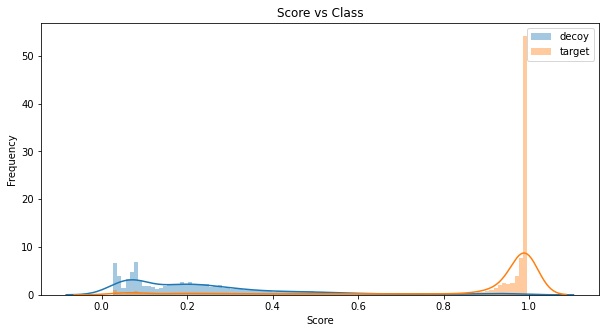

--- x! ---
2021-05-18 17:49:08> Filter df with x_tandem score
2021-05-18 17:49:09> Global FDR on precursor
2021-05-18 17:49:09> Last q_value 0.010 of dataset is smaller than fdr_level 0.010
2021-05-18 17:49:09> 44,708 target (447 decoy) of 45155 PSMs. fdr 0.009998 for a cutoff of 18.72 (set fdr was 0.01)


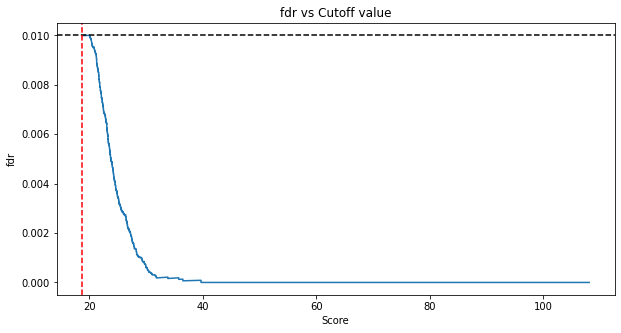

C:\Users\admin\.conda\envs\alphapept\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


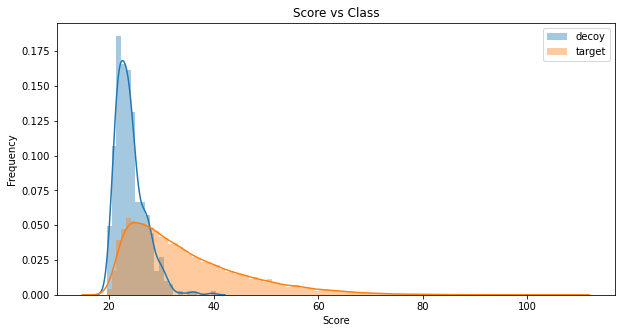

In [ ]:
import alphapept.io
from alphapept.score import get_ML_features, filter_with_ML, filter_with_x_tandem, cut_global_fdr, train_RF

ms_file = alphapept.io.MS_Data_File(os.path.join(TEST_DIR,'thermo_HeLa.ms_data.hdf'))

df = ms_file.read(dataset_name='second_search')
df = get_ML_features(df)

print('--- ML ---')
cv, features = train_RF(df, plot=True)
df = filter_with_ML(df, cv, features = features)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

print('--- x! ---')
df = filter_with_x_tandem(df)
df = cut_global_fdr(df, analyte_level='precursor',  plot=True)

### Bruker HeLa

In [ ]:
%run -i ../test_ci.py $tmp_folder bruker_hela

['../test_ci.py', 'bruker_hela'] 2
2021-05-18 17:49:11> Creating dir E:/test_temp/.
2021-05-18 17:50:32> Logging to C:\Users\admin\alphapept\logs\log_20210518175032.txt.
2021-05-18 17:50:32> Platform information:
2021-05-18 17:50:32> system     - Windows
2021-05-18 17:50:32> release    - 10
2021-05-18 17:50:32> version    - 10.0.18362
2021-05-18 17:50:32> machine    - AMD64
2021-05-18 17:50:32> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-18 17:50:32> cpu count  - 24
2021-05-18 17:50:32> ram memory - 106.0/127.7 Gb (available/total)
2021-05-18 17:50:32> 
2021-05-18 17:50:32> Python information:
2021-05-18 17:50:32> SQLAlchemy     - 1.3.22
2021-05-18 17:50:32> alphapept      - 0.3.22
2021-05-18 17:50:32> biopython      - 1.78
2021-05-18 17:50:32> click          - 7.1.2
2021-05-18 17:50:32> comtypes       - 1.1.7
2021-05-18 17:50:32> fastcore       - 1.3.5
2021-05-18 17:50:32> h5py           - 3.1.0
2021-05-18 17:50:32> lxml           - 4.6.2
2021-05-18 17:50:3




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 17:50:33> FASTA contains 36,789 entries.





  3%|█▋                                                              | 0.02702702702702703/1 [01:22<49:28, 3050.94s/it]


  5%|███▍                                                            | 0.05405405405405406/1 [01:27<21:29, 1363.27s/it]


  8%|█████▎                                                           | 0.08108108108108109/1 [01:28<11:45, 767.53s/it]


 11%|███████                                                          | 0.10810810810810811/1 [01:30<07:16, 489.58s/it]


 14%|████████▊                                                        | 0.13513513513513514/1 [01:32<04:50, 335.65s/it]


 16%|██████████▌                                                      | 0.16216216216216217/1 [01:33<03:22, 241.16s/it]


 19%|████████████▍                                                     | 0.1891891891891892/1 [01:35<02:27, 182.52s/it]


 22%|██████████████                                                   | 0.21621621621621623/1 [01:36<01:49, 140.24s/it]


 24%|███████████████▊

2021-05-18 17:53:07> Digested 36,789 proteins and generated 9,107,982 spectra
2021-05-18 17:55:07> Database saved to E:\test_temp\database.hdf. Filesize of database is 3.42 GB



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 17:55:23> Processing 1 files for step raw_conversion
2021-05-18 17:55:23> File E:/test_temp/bruker_HeLa has extension .d - converting from Bruker.
2021-05-18 18:25:48> File conversion complete. Extracted 299,728 precursors.
2021-05-18 18:25:58> File conversion of file E:/test_temp/bruker_HeLa.d complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 18:25:58> Processing 1 files for step find_features
2021-05-18 18:25:58> No *.hdf file with features found for E:/test_temp/bruker_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-18 18:25:59> Feature finding on E:/test_temp/bruker_HeLa.d
2021-05-18 18:25:59> Using Windows FF
2021-05-18 18:26:01> TopLevelUffWorkflow: Initializing 4d Feature Finder Workflow for lc-timstof data
2021-05-18 18:26:01> bdal.uff.TopLevelUffWorkflow: This is Universal Feature Finder 3.13.1.0
2021-05-18 18:26:01> 
2021-05-18 18:26:01> bdal.uff.cmdline: Parameters for ParameterSet path '':
2021-05-18 18:26:01> 
2021-05-18 18:26:01>  directory containing the data to be processed." , "required":true , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"E:/test_temp/bruker_HeLa.d"}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> nable lcms denoising. Will only denoise if the data has not been denoised already

2021-05-18 18:26:01> 
2021-05-18 18:26:01>  non-deconvoluted peaks are filled up." , "required":false , "hidden":true , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":"[topN,threshold] (class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >)" , "value":"topN"}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> , all raw peaks are written. Otherwise, only deisotoped peaks are written" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> ':
2021-05-18 18:26:01> 
2021-05-18 18:26:01> 
2021-05-18 18:26:01> :
2021-05-18 18:26:01> 
2021-05-18 18:26:01> c":"intensity threshold for matching calibrant peaks" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> able lock mass calibration" , "required":false , "hidden":false , "type":"bool" , "constraint"

2021-05-18 18:26:01> 
2021-05-18 18:26:01> :"end (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> c":"begin (RT) of the calibration segment" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> mum intensity of a calibrant" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1e+22}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> lag indicating which algorithm to use: false = use calibration-segment, true = do not use calibration-segment, default = false" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-18 18:26:01> 
2021-05-18 18:26:01> sc":"vector of vector with lower rt boundaries for the reference peaks for segment-free calibration only" , "required":false , "hidden":false , "type":"class std::vector<class std::vector

2021-05-18 18:26:01>  "desc":"Lower RT value for range to look for mobility calibrants" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:01> 
2021-05-18 18:26:02> .Calibration.ReadTimsCalibrants':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> Ms.Calibration.WriteCalibration':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> "vector of CCS values of reference peaks for mobility calibration" , "required":false , "hidden":false , "type":"class std::vector<double,class std::allocator<double> >" , "constraint":null , "value":[]}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> .Calibration.WriteCalibration':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> Ms.ClusterDeisotoping':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> ":"Ions must have at least this absolute abundance to be used as seed cluster for a component. Default 0.0" , "required":false , "hidden":false , "type":"double" , "constraint":"in [0,1.79769e+30

2021-05-18 18:26:02> 
2021-05-18 18:26:02> raction of isotope pattern which must be covered (starting from the largest peaks)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.95}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> l molecules: path to file with table: 6 x M/Z and 6 isotope intensities" , "required":false , "hidden":false , "type":"class std::basic_string<char,struct std::char_traits<char>,class std::allocator<char> >" , "constraint":null , "value":"isotopePatterns3.txt"}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> e threshold for incorporation of non-essential isotopes into feature. if <= 0, not used (abs. threshold maxIsotopePatternError used)." , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":-1}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":0.2}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> nce to find isotopes (applied to mean MZ 

2021-05-18 18:26:02> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> " , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> rue, all peaks for positions [-1, maxIsotopes-1] (with pos. 0 first isotope of feature) are reported" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":false}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> fraction of the maximum intensity is considered as not saturated (for bigger intensities we don't know)" , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":0.8}
2021-05-18 18:26:02> 
2021-05-18 18:26:02

2021-05-18 18:26:02> 
2021-05-18 18:26:02> quired":false , "hidden":false , "type":"double" , "constraint":null , "value":0.03}
2021-05-18 18:26:02> 
2021-05-18 18:26:02>  , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":2}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> ed":false , "hidden":false , "type":"double" , "constraint":null , "value":0.014}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> d":false , "hidden":false , "type":"double" , "constraint":null , "value":0.01}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> d":false , "hidden":false , "type":"double" , "constraint":null , "value":4}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> " , "required":false , "hidden":false , "type":"double" , "constraint":null , "value":1}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> equired":false , "hidden":false , "type":"double" , "constraint":null , "value":3.5}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> ":false , "hidden":false , "type":"double" , "constraint":null , "valu

2021-05-18 18:26:02> 
2021-05-18 18:26:02>  sqlite result file '<shortFilename>.features'" , "required":false , "hidden":false , "type":"bool" , "constraint":null , "value":true}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> aw peaks for each cluster are written" , "required":false , "hidden":true , "type":"bool" , "constraint":null , "value":false}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> .IsotopeClustersOutput':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> Ms.PrecursorInfoSource':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":1e+22}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> value for read range" , "required":false , "hidden":true , "type":"double" , "constraint":null , "value":0}
2021-05-18 18:26:02> 
2021-05-18 18:26:02> .PrecursorInfoSource':
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> Ms.ReadTimsData':
2021-05-18 18:26:02> 
2021-05-18 18:26

2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 00000
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 0000
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 00
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 0000.000000
2021-05-18 18:26:02> 
2021-05-18 18:26:02> e
2021-05-18 18:26:02> th.enableRecalibration=true
2021

2021-05-18 18:26:02> false
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 10
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> alse
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> ing=20
2021-05-18 18:26:02> 00000
2021-05-18 18:26:02> or=2.000000
2021-05-18 18:26:02> 300000
2021-05-18 18:26:02> 0
2021-05-18 18:26:02> 50000
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> .000000
2021-05-18 18:26:02> 
2021-05-18 18:26:02> 
2021-05-18 18:26:02> ters=<unprintable type>
2021-05-18 18:26:02> ue
2021-05-18 18:26:02> eaks=false
2021-05-18 18:26:02> nds=10000000000000000000000.000000
2021-05-18 18:26:02> nds=0.000000
2021-05-18 18:26:02> meNrTolerance=2
2021-05-18 18:26:02> imalFrequency=20
2021-05-18 18:26:02> nNrTolerance=20
2021-05-18 18:26:02> lerance=3
2021-05-18 18:26:02> eClustering"
2021-05-18 18:26:02> ue
2021-0

2021-05-18 18:49:48> bdal.algorithm.LcmsClusterDeisotoping: 2052951 clusters after splitting (if active).
2021-05-18 18:49:48> bdal.algorithm.LcmsClusterDeisotoping:  min/max apex intensity: 34.7222/1.31159e+06
2021-05-18 18:49:57> bdal.algorithm.PerioTab.InitPerioTabStream: User-defined periodic table extension is empty or file could not be opened. Proceeding with standard elements.
2021-05-18 18:49:57> bdal.algorithm.LcmsClusterDeisotoping: correlation threshold: 10623.9
2021-05-18 18:49:57> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0% (1/2052951)
2021-05-18 18:49:58> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.487104% (10001/2052951)
2021-05-18 18:49:59> bdal.algorithm.LcmsClusterDeisotoping: Progress: 0.974207% (20001/2052951)
2021-05-18 18:50:00> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.46131% (30001/2052951)
2021-05-18 18:50:02> bdal.algorithm.LcmsClusterDeisotoping: Progress: 1.94841% (40001/2052951)
2021-05-18 18:50:03> bdal.algorithm.LcmsClusterDeisotop

2021-05-18 18:51:26> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.4554% (810001/2052951)
2021-05-18 18:51:27> bdal.algorithm.LcmsClusterDeisotoping: Progress: 39.9425% (820001/2052951)
2021-05-18 18:51:28> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.4296% (830001/2052951)
2021-05-18 18:51:29> bdal.algorithm.LcmsClusterDeisotoping: Progress: 40.9167% (840001/2052951)
2021-05-18 18:51:30> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.4038% (850001/2052951)
2021-05-18 18:51:31> bdal.algorithm.LcmsClusterDeisotoping: Progress: 41.8909% (860001/2052951)
2021-05-18 18:51:32> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.378% (870001/2052951)
2021-05-18 18:51:33> bdal.algorithm.LcmsClusterDeisotoping: Progress: 42.8651% (880001/2052951)
2021-05-18 18:51:34> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.3522% (890001/2052951)
2021-05-18 18:51:35> bdal.algorithm.LcmsClusterDeisotoping: Progress: 43.8393% (900001/2052951)
2021-05-18 18:51:36> bdal.algorithm.LcmsC

2021-05-18 18:52:34> bdal.algorithm.LcmsClusterDeisotoping: Progress: 80.8592% (1660001/2052951)
2021-05-18 18:52:34> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.3463% (1670001/2052951)
2021-05-18 18:52:35> bdal.algorithm.LcmsClusterDeisotoping: Progress: 81.8334% (1680001/2052951)
2021-05-18 18:52:36> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.3205% (1690001/2052951)
2021-05-18 18:52:36> bdal.algorithm.LcmsClusterDeisotoping: Progress: 82.8076% (1700001/2052951)
2021-05-18 18:52:37> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.2947% (1710001/2052951)
2021-05-18 18:52:38> bdal.algorithm.LcmsClusterDeisotoping: Progress: 83.7818% (1720001/2052951)
2021-05-18 18:52:38> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.2689% (1730001/2052951)
2021-05-18 18:52:39> bdal.algorithm.LcmsClusterDeisotoping: Progress: 84.756% (1740001/2052951)
2021-05-18 18:52:40> bdal.algorithm.LcmsClusterDeisotoping: Progress: 85.2431% (1750001/2052951)
2021-05-18 18:52:40> bdal.algor



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 19:33:15> Starting first search.
2021-05-18 19:33:15> Processing 1 files for step search_db
2021-05-18 19:33:15> Calibrating fragments


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\admin\.conda\envs\alphapept\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2021-05-18 19:33:48> Performing search on 348,181 query and 9,107,982 db entries with m_tol = 30.00 and m_offset = 30.00.
2021-05-18 19:35:01> Compared 385,244,800 spectra and found 650,168 psms.
2021-05-18 19:35:02> Extracting columns for scoring.


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:44:55<00:00, 6295.35s/it]
  0%|                                                                                          | 0/1 [1:09:28<?, ?it/s]


2021-05-18 19:36:47> Extracted columns from 650,168 spectra.
2021-05-18 19:36:47> Saving first_search results to E:/test_temp/bruker_HeLa.ms_data.hdf
2021-05-18 19:36:53> Search of file E:/test_temp/bruker_HeLa.d complete.
2021-05-18 19:37:27> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 19:37:27> Processing 1 files for step calibrate_hdf
2021-05-18 19:37:28> Scoring using X-Tandem
2021-05-18 19:37:30> 68,852 target (688 decoy) of 100706 PSMs. fdr 0.009992 for a cutoff of 17.20 (set fdr was 0.01)
2021-05-18 19:37:35> Calibration of file E:/test_temp/bruker_HeLa.ms_data.hdf complete.
2021-05-18 19:37:35> Calibrating fragments
2021-05-18 19:37:36> Median fragment offset -5.17 - std 14.92 ppm



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-09 02:05:57> Starting second search with DB.
2021-05-09 02:05:57> Processing 1 files for step search_db
2021-05-09 02:05:57> Found calibrated m_offset with value 5.92
2021-05-09 02:06:00> Performing search on 348,181 query and 8,830,740 db entries with m_tol = 20.00 and m_offset = 5.92.



  0%|                                                                                            | 0/1 [00:31<?, ?it/s]

2021-05-09 02:06:17> Compared 87,886,440 spectra and found 174,072 psms.


  0%|                                                                                            | 0/1 [00:56<?, ?it/s]


2021-05-18 19:39:00> Extracted columns from 342,438 spectra.
2021-05-18 19:39:00> Saving second_search results to E:/test_temp/bruker_HeLa.ms_data.hdf
2021-05-18 19:39:03> Search of file E:/test_temp/bruker_HeLa.d complete.
2021-05-18 19:39:34> Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 19:39:35> Processing 1 files for step score_hdf
2021-05-18 19:39:36> Found second search psms for scoring.
2021-05-18 19:39:41> Last q_value 0.079 of dataset is smaller than fdr_level 0.100
2021-05-18 19:39:42> 87,263 target (6,911 decoy) of 94174 PSMs. fdr 0.079197 for a cutoff of 10.72 (set fdr was 0.1)
2021-05-18 19:39:42> Training & cross-validation on 72059 targets and 72059 decoys
2021-05-18 19:57:27> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-05-18 19:57:29> The train accuracy was 0.936926685077506
2021-05-18 19:57:29> Testing on 18015 targets and 18015 decoys
2021-05-18 19:57:29> The test accuracy was 0.9319178462392451
2021-05-18 19:57:29> Top features {'y_hits': 0.2343669096601591, 'hits': 0.19588496076899234, 'x_tandem': 0.14184441963532066, 'total_int': 0.07315173407399725, 'matched_int_ratio': 0.05905374947876514, 'matched_ion_fraction': 0.055878293872721974, 'n_ions': 0.0372788889844017, 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-18 19:57:40> A total of 7,404 proteins with unique PSMs found
2021-05-18 19:57:40> A total of 903 ambigious proteins
2021-05-18 19:58:15> A total of 692 proteins with unique PSMs found
2021-05-18 19:58:15> A total of 41 ambigious proteins
2021-05-18 19:58:16> Global FDR on protein
2021-05-18 19:58:16> 6,790 target (67 decoy) of 8261 PSMs. fdr 0.009867 for a cutoff of 0.85 (set fdr was 0.01)
2021-05-18 19:58:16> FDR on proteins complete. For 0.01 FDR found 74,724 targets and 72 decoys. A total of 6,835 proteins found.
2021-05-18 19:58:16> Extracting ions
2021-05-18 19:58:42> Extracting ions complete.
2021-05-18 19:58:50> Saving complete.
2021-05-18 19:58:50> Protein groups complete.
2021-05-18 19:58:50> Only 1 dataset present. Skipping alignment.
2021-05-18 19:58:50> Assembling dataframe.
2021-05-18 19:58:51> Assembly complete.
2021-05-18 19:58:51> Complete. 
2021-05-18 19:58:51> Starting profile extraction.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.95it/s]

2021-05-18 19:58:52> LFQ complete.
2021-05-18 19:58:52> Exporting as csv.
2021-05-18 19:58:54> Saved df of length 74,796 saved to E:\test_temp\results
2021-05-18 19:58:58> Settings saved to E:\test_temp\results.yaml
2021-05-18 19:58:58> Analysis complete.


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.82s/it]


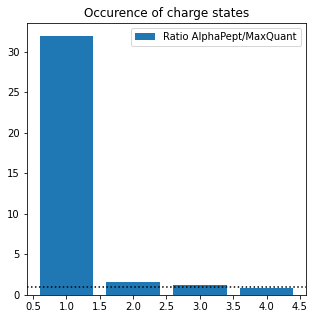

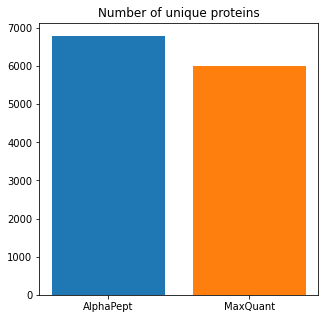

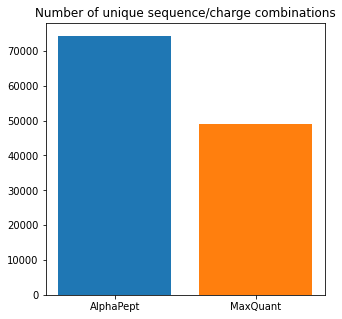

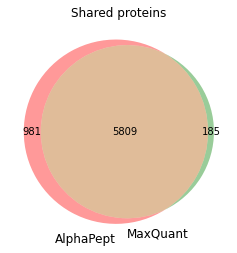

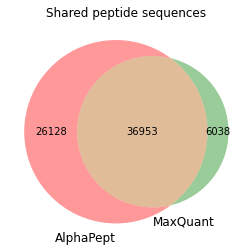

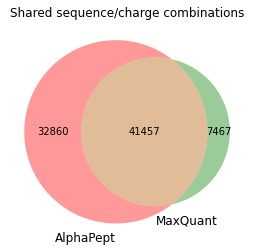

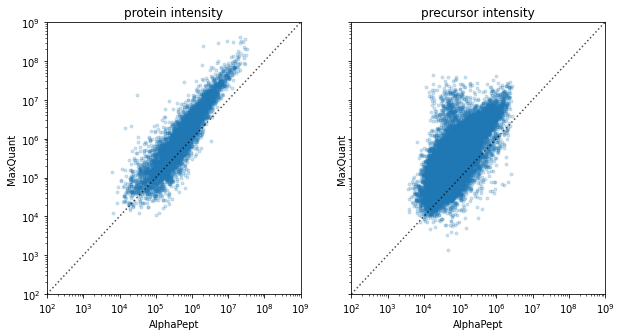

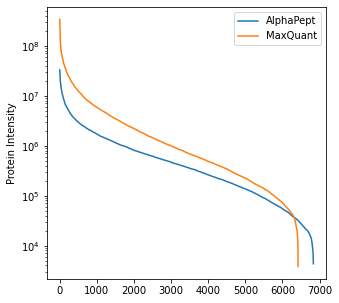

In [ ]:
from test_helper import prepare_files, compare_field, compare_populations, compare_intensities, protein_rank

df1, df2 = prepare_files(os.path.join(TEST_DIR, "bruker_HeLa.ms_data.hdf"), os.path.join(tmp_folder,'bruker_HeLa_evd.txt'))
for field in ['charge','protein','precursor']:
    compare_field(df1, df2, software_1, software_2, field)
    
for field in ['protein','sequence','precursor']:
    compare_populations(df1, df2, software_1, software_2, field)
    
compare_intensities(df1, df2,software_1, software_2)

protein_rank(df1, df2,software_1, software_2)

# Quantification Test

This notebook will run `PXD006109` and `PXD010012` and compare the quantificaiton performance.

## PXD006109

In [ ]:
%run -i ../test_ci.py $tmp_folder PXD006109 
#test_ci.main(runtype="PXD006109", new_files=False)

['/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"c2d05b11-57da-46c3-8668-d0a7e85a1f98"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=/var/folders/m2/9tp69_c95995cmx5r1hl98qr0000gn/T/tmp-9645388iuQ06U1zlc.json'] 11
2021-05-10 16:37:37> Logging to /Users/constantin/alphapept/logs/log_20210510163737.txt.
2021-05-10 16:37:37> Platform information:
2021-05-10 16:37:37> system     - Darwin
2021-05-10 16:37:37> release    - 20.3.0
2021-05-10 16:37:37> version    - 10.16
2021-05-10 16:37:37> machine    - x86_64
2021-05-10 16:37:37> processor  - i386
2021-05-10 16:37:37> cpu count  - 8
2021-05-10 16:37:37> ram memory - 16.0/32.0 Gb (available/total)
2021-05-10 16:37:37> 
2021-05-10 16:37:37> Python information:
2021-05-10 16:37:37> SQLAlchemy     - 1.3.22
2021-05-10 16:37:37> alphapept      - 0.3.21
2021-05-10 16:37:37> biopython      - 

  0%|          | 0/1 [00:00<?, ?it/s]

2021-05-10 16:37:39> FASTA contains 43,752 entries.


100%|██████████| 1.0/1 [04:13<00:00, 86.11s/it]               

2021-05-10 16:42:11> Digested 43,752 proteins and generated 6,062,444 spectra
2021-05-10 16:43:15> Database saved to /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/temp/test_temp/database.hdf. Filesize of database is 2.33 GB


2021-05-10 16:43:33> Processing 6 files for step raw_conversion
AlphaPool was set to 8 processes. Setting max to 8.


100%|██████████| 1.0/1 [04:43<00:00, 283.93s/it]               


2021-05-10 16:48:21> Processing 6 files for step find_features
2021-05-10 16:48:21> Setting Process limit to 2
AlphaPool was set to 2 processes. Setting max to 2.


2021-05-10 17:02:57> Starting first search.
2021-05-10 17:02:57> Processing 6 files for step search_db
2021-05-10 17:02:57> Searching. Setting Process limit to 3.
AlphaPool was set to 3 processes. Setting max to 3.




100%|██████████| 1.0/1 [16:33<00:00, 993.06s/it]
100%|██████████| 1.0/1 [27:17<00:00, 1637.40s/it]


2021-05-10 17:05:14> First search complete.


  0%|          | 0/1 [00:00<?, ?it/s]

2021-05-10 17:05:15> Processing 6 files for step calibrate_hdf
AlphaPool was set to 8 processes. Setting max to 8.


 17%|█▋        | 0.16666666666666666/1 [00:14<01:12, 86.41s/it]

2021-05-10 17:05:29> Starting second search with DB.
2021-05-10 17:05:29> Processing 6 files for step search_db
2021-05-10 17:05:29> Searching. Setting Process limit to 2.
AlphaPool was set to 2 processes. Setting max to 2.


100%|██████████| 1.0/1 [01:23<00:00, 83.96s/it]                
100%|██████████| 1.0/1 [03:42<00:00, 222.95s/it]               


2021-05-10 17:06:59> Second search complete.


  0%|          | 0/1 [00:00<?, ?it/s]

2021-05-10 17:07:00> Processing 6 files for step score_hdf
AlphaPool was set to 8 processes. Setting max to 8.


 67%|██████▋   | 0.6666666666666666/1 [02:20<00:54, 164.81s/it] 

2021-05-10 17:09:21> Fasta dict with length 43,752, Pept dict with length 6,062,444
2021-05-10 17:09:21> Extracting protein groups.



100%|██████████| 1.0/1 [02:25<00:00, 145.67s/it]               



100%|██████████| 1.0/1 [11:50<00:00, 710.46s/it]





2021-05-10 17:21:24> Protein groups complete.
2021-05-10 17:21:25> NumExpr defaulting to 8 threads.
2021-05-10 17:21:34> Total deviation before calibration {'mz': 0.008127196662821343, 'rt': 7.775504908322703}
2021-05-10 17:21:34> Mean deviation before calibration {'mz': 0.0005418131108547562, 'rt': 0.5183669938881802}
2021-05-10 17:21:34> Solving equation system
2021-05-10 17:21:34> Regression score is 0.870784531191745
2021-05-10 17:21:34> Solving equation system complete.
2021-05-10 17:21:34> Applying offset
2021-05-10 17:21:34> Saving /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/./temp/./test_temp/PXD006109_HeLa12_1.ms_data.hdf - protein_fdr.
2021-05-10 17:21:34> Saving /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/./temp/./test_temp/PXD006109_HeLa12_1.ms_data.hdf - feature_table.
2021-05-10 17:21:34> Saving /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/./temp/./test_temp/PXD006109_HeLa12_2.ms_data.hdf - protein_fdr.
2021

  0%|          | 0/1 [00:00<?, ?it/s]

2021-05-10 17:21:49> Preparing protein table for parallel processing.


 20%|█▉        | 0.1963300258257442/1 [00:02<00:08, 11.05s/it] 

2021-05-10 17:21:51> Starting protein extraction for 7357 proteins.
AlphaPool was set to 8 processes. Setting max to 8.


100%|█████████▉| 0.9996737800733995/1 [02:37<00:00, 172.69s/it]

2021-05-10 17:24:32> LFQ complete.
2021-05-10 17:24:32> Exporting as csv.
2021-05-10 17:24:41> Saved df of length 187,329 saved to /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/temp/test_temp/results
2021-05-10 17:24:46> Settings saved to /Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/temp/test_temp/results.yaml
2021-05-10 17:24:46> Analysis complete.


FileNotFoundError: [Errno 2] No such file or directory: 'git branch --show-current'

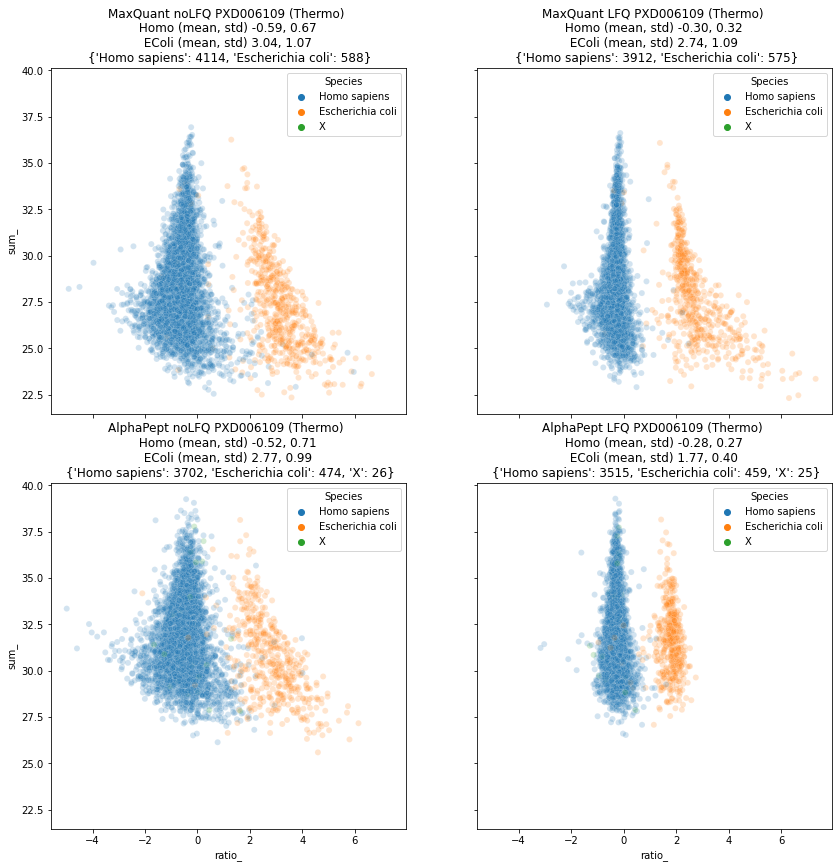

In [ ]:
import test_helper
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
test_helper.add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, 'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')


species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

## CV plot

<ipython-input-6-e7cc4d122219>:22: RuntimeWarning: invalid value encountered in true_divide
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-6-e7cc4d122219>:51: RuntimeWarning: Mean of empty slice
  cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)


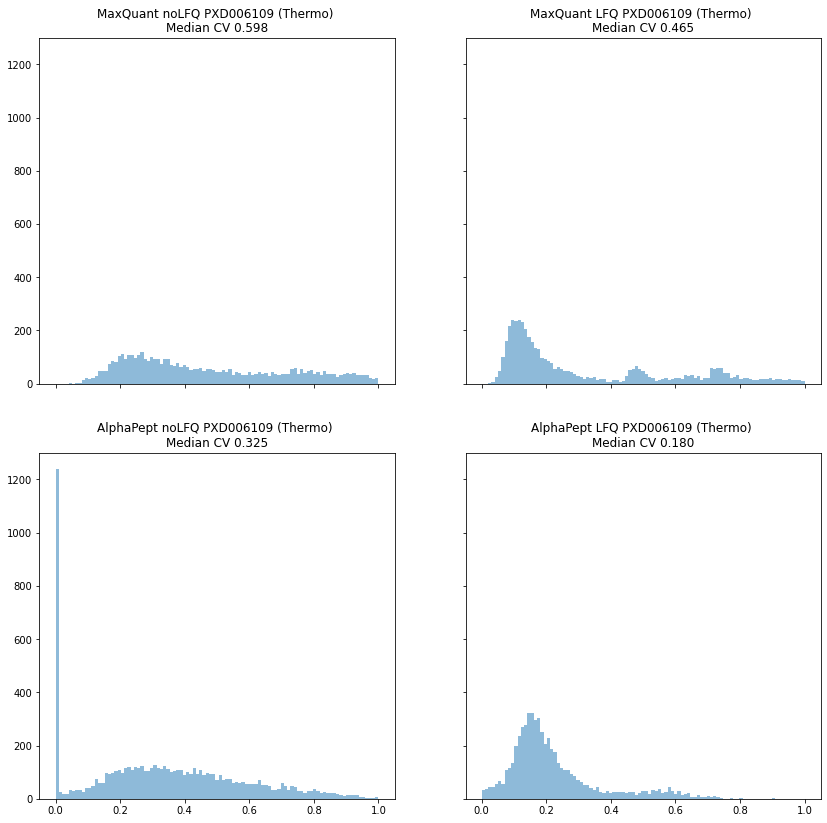

In [ ]:
bins = np.linspace(0,1,100)

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD006109_ref.txt'), sep='\t') 
no_rev_cont = [(x[0]!="+") & (x[1] !="+") for x in ref[["Reverse","Potential contaminant"]].values]
ref = ref[no_rev_cont]
test_helper.add_species_column(ref)
ref['Species'] = ref['Species'].replace(np.nan, "X")

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Shotgun_02-01_{i}" for i in range(1,4)]
    ratio_columns = [f"{x}ntensity Shotgun_12-01_{i}" for i in range(1,4)]

    id_ = 'MaxQuant ' +_+' PXD006109 (Thermo)'
    
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[0,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[0,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

path = os.path.join(TEST_DIR,'results.hdf') #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD006109_HeLa2_{i}{x}" for i in range(1,4)]
    ratio_columns = [f"PXD006109_HeLa12_{i}{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD006109 (Thermo)'
    cv = np.nanstd(ref[base_columns + ratio_columns], axis=1) / np.nanmean(ref[base_columns + ratio_columns], axis=1)

    axes[1,j].hist(cv, bins = bins, label = id_, alpha = 0.5)
    axes[1,j].set_title(f'{id_} \nMedian CV {np.nanmedian(cv):.3f}')

plt.show()

## Algorithm Test

Test performance of LFQ algorithm on MaxQuant evidence file.

In [ ]:
try: 
    import ipywidgets
except ModuleNotFoundError:
    !pip install ipywidgets

In [1]:
from alphapept.quantification import protein_profile_parallel_mq
import test_helper
import pandas as pd


evidence_path = os.path.join(tmp_folder,'PXD006109_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD006109_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
test_helper.add_species_column(ref)
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD006109'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'HeLa2' in _]
    ratio_columns = [_ for _ in ds if 'HeLa12' in _]
    test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

NameError: name 'tmp_folder' is not defined

## Normalization Checks

### Check only the delayed normalization part

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/p

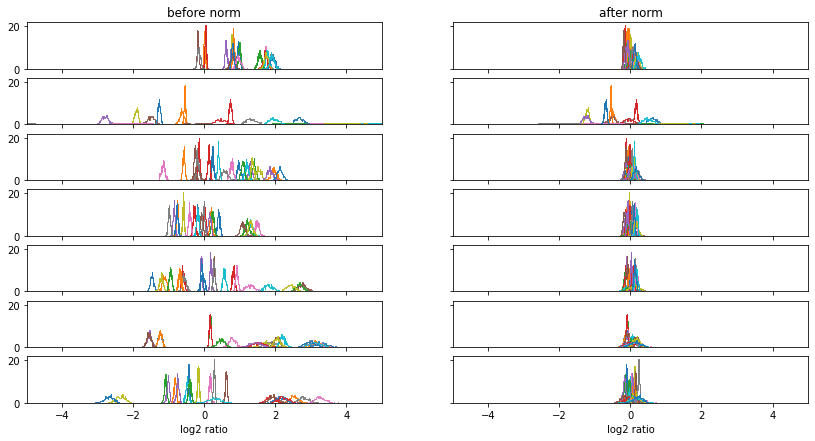

In [3]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test_helper
from alphapept.quantification import delayed_normalization


def visualize_normalization(simulated_df, axis, value = "Intensity",show_per_colpair = True):
    
    shortnames = df["shortname"].unique()
    df["namefrac"] = [f"{n}_{f}" for n,f in zip(simulated_df["shortname"], simulated_df["fraction"])]
    simulated_reformat = pd.pivot_table(simulated_df, values=value, columns="namefrac" ,index=["protein", "precursor" ])
    
    for namepair in itertools.combinations(shortnames, 2):
        cols1 = [x for x in simulated_reformat.columns if namepair[0] in x]
        cols2 = [x for x in simulated_reformat.columns if namepair[1] in x]
        for colpair in itertools.product(cols1, cols2):
            fcs = np.log2(simulated_reformat[colpair[0]]) - np.log2(simulated_reformat[colpair[1]])
            axis.hist(fcs, histtype = 'step', bins = 50, label = f"{colpair}", density = True)
            axis.set_xlim(-5, 5)
            #plt.box(fcs)
        #plt.legend()
        #if show_per_colpair:
         #   plt.show()
    #plt.show()



samplenames = ["A1", "A2","B1"]
fractions = [3, 2, 3]

ntests = 7
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(14,7), sharex=True,sharey=True)
count_axis = 0
axes[0][0].set_title("before norm")
axes[-1][0].set_xlabel('log2 ratio')
axes[0][1].set_title("after norm")
axes[-1][1].set_xlabel('log2 ratio')
for _ in range(ntests):
    df = test_helper.simulate_biased_peptides(5000, samplenames, fractions)
    df_del, normed = delayed_normalization(df, field ='Intensity')
    visualize_normalization(df, axes[count_axis][0],value = "Intensity", show_per_colpair = False)
    visualize_normalization(df_del, axes[count_axis][1],value = "Intensity_dn", show_per_colpair = False)
    count_axis+=1

### Check delayed normalization + protein intensity estimation

AlphaPool was set to 8 processes. Setting max to 8.


/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/test_helper.py:223: RuntimeWarning: Mean of empty slice
  e_coli_ratio = np.nanmean(e_coli[~np.isinf(e_coli)])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/test_helper.py:223: RuntimeWarning: Mean of empty slice
  e_coli_ratio = np.nanmean(e_coli[~np.isinf(e_coli)])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/test_helper.py:223: RuntimeWarning: Mean of empty slice
  e_coli_ratio = np.nanmean(e_coli[~np.isinf(e_coli)])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: De

AlphaPool was set to 8 processes. Setting max to 8.


/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/test_helper.py:223: RuntimeWarning: Mean of empty slice
  e_coli_ratio = np.nanmean(e_coli[~np.isinf(e_coli)])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/test_helper.py:223: RuntimeWarning: Mean of empty slice
  e_coli_ratio = np.nanmean(e_coli[~np.isinf(e_coli)])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/constantin/workspace/alphapept_untouched/alphapept/sandbox/test_helper.py:223: RuntimeWarning: Mean of empty slice
  e_coli_ratio = np.nanmean(e_coli[~np.isinf(e_coli)])
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: De

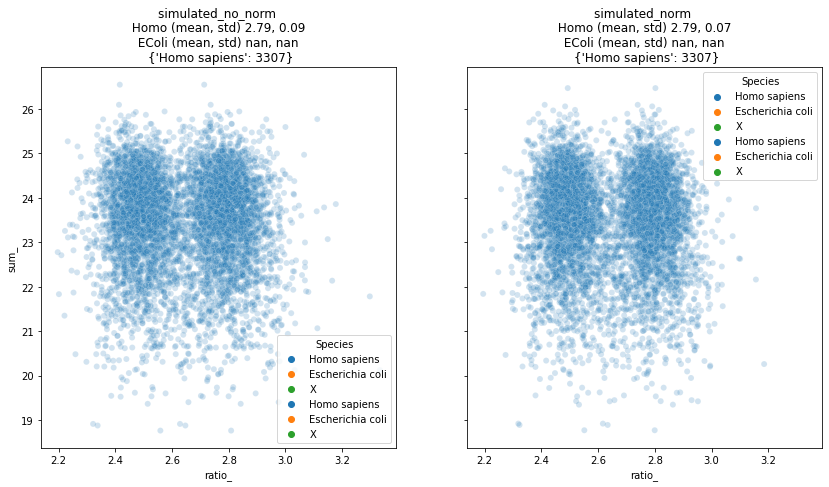

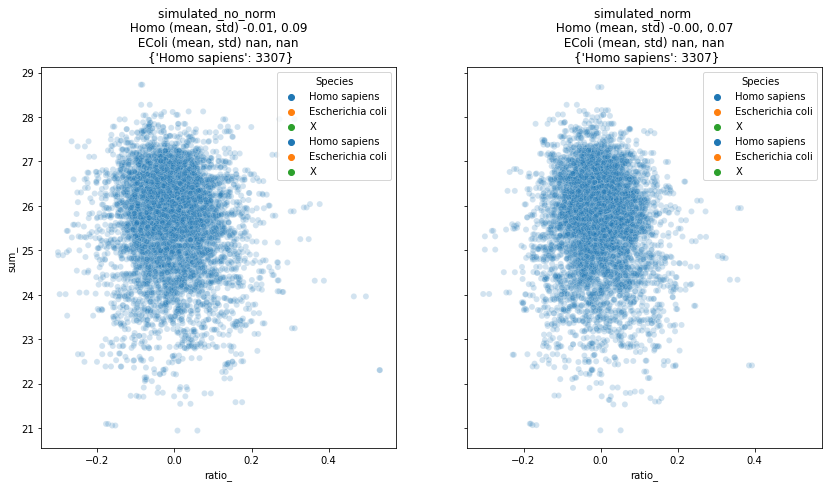

In [1]:
from alphapept.quantification import delayed_normalization, protein_profile_parallel
import test_helper
import pandas as pd
import matplotlib.pyplot as plt
import itertools

samplenames = ["A1", "A2", "B1"]
fractions = [1, 1, 1]
df = test_helper.simulate_biased_peptides(20000, samplenames, fractions)

df, normed = delayed_normalization(df, field ='Intensity')

for field in  ['Intensity', 'Intensity_dn']:
    #df = df[['protein', 'shortname', 'precursor', 'fraction', 'Intensity_dn']]
    pt = protein_profile_parallel(df, minimum_ratios=1, field=field)
    

    pt['Species'] = ["Homo sapiens" for x in range(len(pt.index))]
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

    test_id = 'PXD006109'

    fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

    ids = ["simulated_no_norm", "simulated_norm"]
    pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
    lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]



    for i, cols in enumerate([pre_lfq, lfq]):
        samplepairs = itertools.product([x for x in cols if "A" in x ], [x for x in cols if "B" in x ])

        for pair in samplepairs:
            base_columns = [pair[0]]
            ratio_columns = [pair[1]]
            test_helper.get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i], valid_filter = False)
        

## PXD010012

In [ ]:
%run -i ../test_ci.py $tmp_folder PXD010012

KeyboardInterrupt: 

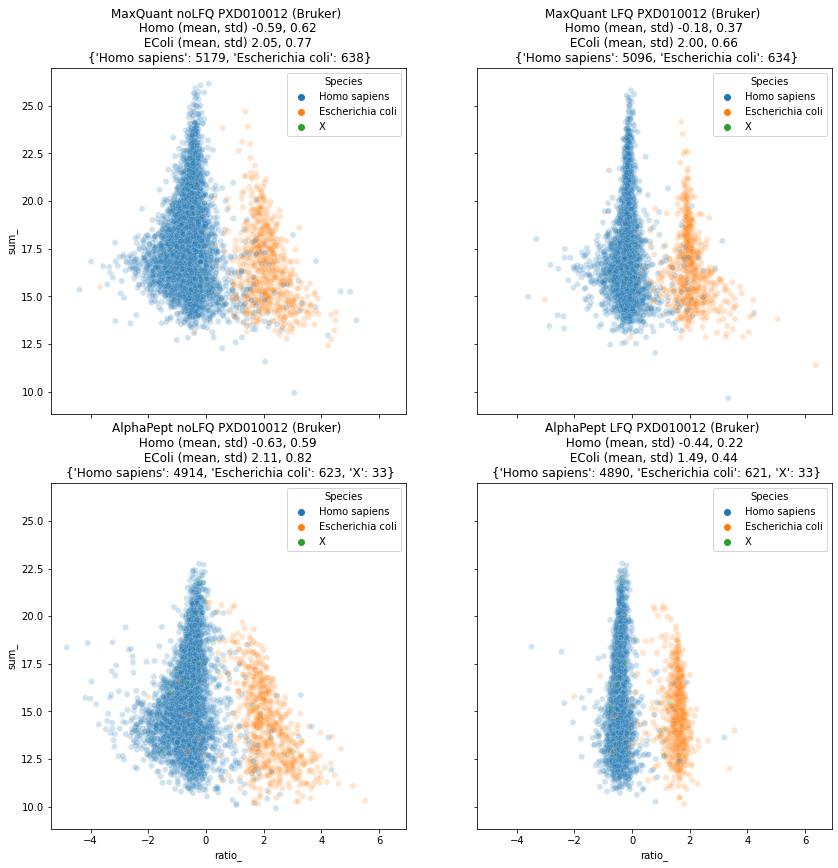

In [ ]:
from test_helper import get_plot_df
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True,sharey=True)

ref = pd.read_csv(os.path.join(tmp_folder,'PXD010012_ref.txt'), sep='\t') 

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = 'LFQ i'
    else:
        x = 'I'
        
    base_columns = [f"{x}ntensity Base_{i}" for i in range(1,6)]
    ratio_columns = [f"{x}ntensity Ratio_{i}" for i in range(1,6)]

    id_ = 'MaxQuant ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[0,j], id_)


path = os.path.join(TEST_DIR, "results.hdf") #TEST_DIR as set in test_ci.py
ref = pd.read_hdf(path, 'protein_table')

species = []
for _ in ref.index:
    if 'HUMAN' in _:
        species.append('Homo sapiens')
    elif 'ECO' in _:
        species.append('Escherichia coli')
    else:
        species.append('X')
        
ref['Species'] = species

for j, _ in enumerate(['noLFQ','LFQ']):
    if _ == 'LFQ':
        x = '_LFQ'
    else:
        x = ''
        
    base_columns = [f"PXD010012_CT_{i}_C1_01_Base{x}" for i in range(1,4)]
    ratio_columns = [f"PXD010012_CT_{i}_C2_01_Ratio{x}" for i in range(1,4)]

    id_ = 'AlphaPept ' +_+' PXD010012 (Bruker)'
    get_plot_df(ref, base_columns, ratio_columns, axes[1,j], id_)

plt.show()

2021-05-19 03:38:40> Loading files


C:\Users\admin\.conda\envs\alphapept\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


2021-05-19 03:38:43> A total of 10 files.
2021-05-19 03:38:54> A total of 7,413 proteins.


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [19:45<00:00, 1185.44s/it]
100%|█████████████████████████████████████████████████████████████████████████████████| 1.0/1 [04:55<00:00, 295.25s/it]


2021-05-19 03:39:07> Preparing protein table for parallel processing.
2021-05-19 03:39:17> Starting protein extraction for 7413 proteins.
AlphaPool was set to 24 processes. Setting max to 24.


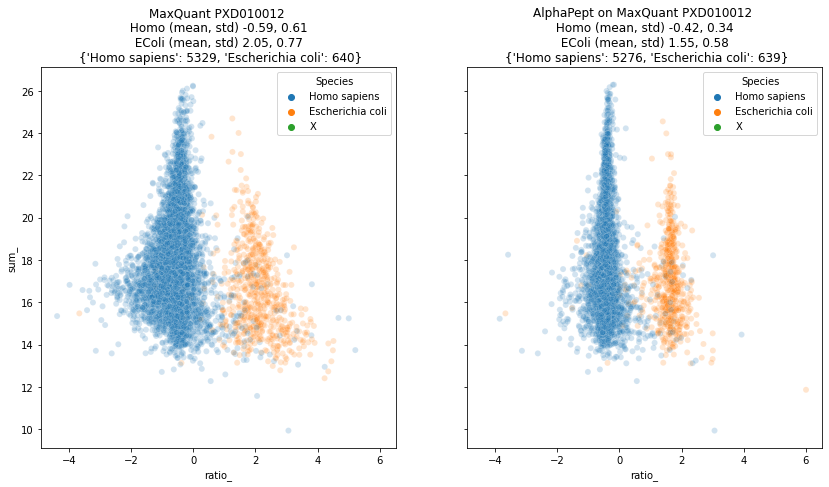

In [ ]:
from alphapept.quantification import protein_profile_parallel_mq
from test_helper import get_plot_df


evidence_path = os.path.join(tmp_folder,'PXD010012_ref_evd.txt')
protein_group_path = os.path.join(tmp_folder,'PXD010012_ref.txt')

pt = protein_profile_parallel_mq(evidence_path, protein_group_path)

ref = pd.read_csv(protein_group_path, sep='\t')
species_dict = pd.Series(ref['Species'].values, index=ref['Protein IDs']).to_dict()
pt['Species'] = [species_dict[_] for _ in pt.index]


pre_lfq = [_ for _ in pt.columns if not _.endswith('_LFQ')]
lfq = [_ for _ in pt.columns if _.endswith('_LFQ')]

test_id = 'PXD010012'

fig, axes = plt.subplots(1, 2, figsize=(14,7), sharex=True,sharey=True)

ids = [f'{software_2} {test_id}', f'{software_1} on {software_2} {test_id}']

for i, ds in enumerate([pre_lfq, lfq]):

    base_columns = [_ for _ in ds if 'Base' in _]
    ratio_columns = [_ for _ in ds if 'Ratio' in _]
    get_plot_df(pt, base_columns, ratio_columns, axes[i], ids[i])

### Large Fasta

In [ ]:
%run -i ../test_ci.py $tmp_folder thermo_hela_large_fasta

['../test_ci.py', 'thermo_hela_large_fasta'] 2
2021-05-19 03:41:39> Creating dir E:/test_temp/.
2021-05-19 03:42:08> Logging to C:\Users\admin\alphapept\logs\log_20210519034208.txt.
2021-05-19 03:42:08> Platform information:
2021-05-19 03:42:08> system     - Windows
2021-05-19 03:42:08> release    - 10
2021-05-19 03:42:08> version    - 10.0.18362
2021-05-19 03:42:08> machine    - AMD64
2021-05-19 03:42:08> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-19 03:42:08> cpu count  - 24
2021-05-19 03:42:08> ram memory - 108.7/127.7 Gb (available/total)
2021-05-19 03:42:08> 
2021-05-19 03:42:09> Python information:
2021-05-19 03:42:09> SQLAlchemy     - 1.3.22
2021-05-19 03:42:09> alphapept      - 0.3.22
2021-05-19 03:42:09> biopython      - 1.78
2021-05-19 03:42:09> click          - 7.1.2
2021-05-19 03:42:09> comtypes       - 1.1.7
2021-05-19 03:42:09> fastcore       - 1.3.5
2021-05-19 03:42:09> h5py           - 3.1.0
2021-05-19 03:42:09> lxml           - 4.6.2
2021-0


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 03:42:09> Processing 1 files for step raw_conversion
2021-05-19 03:42:09> File E:/test_temp/thermo_HeLa has extension .raw - converting from Thermo.
2021-05-19 03:44:22> File conversion complete. Extracted 120,226 precursors.
2021-05-19 03:44:28> File conversion of file E:/test_temp/thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 03:44:28> Processing 1 files for step find_features
2021-05-19 03:44:28> No *.hdf file with features found for E:/test_temp/thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-19 03:44:28> Feature finding on E:/test_temp/thermo_HeLa.raw


  0%|                                                                                            | 0/1 [02:25<?, ?it/s]

2021-05-19 03:44:35> Number of hills 1,105,353, len = 17.35
2021-05-19 03:44:35> Repeating hill extraction with ppm_tol 5.87


2021-05-19 03:44:41> Number of hills 1,227,331, len = 19.44
2021-05-19 03:45:03> After split hill_ptrs 1,635,903
2021-05-19 03:45:04> After filter hill_ptrs 1,585,989
2021-05-19 03:48:07> Extracting hill stats complete
2021-05-19 03:48:31> Found 190,099 pre isotope patterns.
2021-05-19 03:51:47> Extracted 232,428 isotope patterns.
2021-05-19 03:51:50> Report complete.
2021-05-19 03:51:50> Matching features to query data.
2021-05-19 03:51:51> Saving feature table.
2021-05-19 03:51:51> Feature table saved to E:/test_temp/thermo_HeLa.ms_data.hdf
2021-05-19 03:51:51> Saving features.
2021-05-19 03:51:51> Feature finding of file E:/test_temp/thermo_HeLa.raw complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 03:51:52> Starting first search.
2021-05-19 03:52:03> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'num_missed_cleavages': 2, 'min_length': 6, 'max_length': 27, 'max_isoforms': 1024, 'limit_modifications': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'max_fasta_size': 100}
AlphaPool was set to 60 processes. Setting max to 24.
2021-05-19 03:53:37> Block 1 of 565 complete - 0.18 % - created peptides 136,294 



  0%|                                                          | 0.0017699115044247787/1 [01:26<13:36:44, 49091.83s/it]

2021-05-19 03:53:37> Block 2 of 565 complete - 0.35 % - created peptides 131,706 



  0%|▏                                                          | 0.0035398230088495575/1 [01:27<5:36:54, 20286.21s/it]

2021-05-19 03:53:38> Block 3 of 565 complete - 0.53 % - created peptides 137,200 



  1%|▎                                                           | 0.005309734513274336/1 [01:27<3:03:55, 11093.95s/it]

2021-05-19 03:53:40> Block 4 of 565 complete - 0.71 % - created peptides 145,388 



  1%|▍                                                            | 0.007079646017699115/1 [01:28<1:54:32, 6921.82s/it]

2021-05-19 03:53:42> Block 5 of 565 complete - 0.88 % - created peptides 141,928 



  1%|▌                                                            | 0.008849557522123894/1 [01:28<1:14:17, 4496.94s/it]

2021-05-19 03:53:43> Block 6 of 565 complete - 1.06 % - created peptides 142,782 



  1%|▋                                                              | 0.010619469026548672/1 [01:29<50:03, 3036.08s/it]

2021-05-19 03:53:45> Block 7 of 565 complete - 1.24 % - created peptides 150,010 



  1%|▊                                                              | 0.012389380530973451/1 [01:29<34:44, 2110.78s/it]

2021-05-19 03:53:47> Block 8 of 565 complete - 1.42 % - created peptides 153,884 



  1%|▉                                                               | 0.01415929203539823/1 [01:29<25:06, 1527.79s/it]

2021-05-19 03:53:50> Block 9 of 565 complete - 1.59 % - created peptides 151,508 



  2%|█                                                               | 0.01592920353982301/1 [01:30<18:32, 1130.93s/it]

2021-05-19 03:53:52> Block 10 of 565 complete - 1.77 % - created peptides 158,708 


  2%|█                                                              | 0.017699115044247787/1 [02:02<33:44, 2060.94s/it]

2021-05-19 03:53:55> Block 11 of 565 complete - 1.95 % - created peptides 134,370 


  2%|█▏                                                             | 0.019469026548672566/1 [02:05<30:08, 1844.89s/it]

2021-05-19 03:53:57> Block 12 of 565 complete - 2.12 % - created peptides 160,432 



  2%|█▎                                                             | 0.021238938053097345/1 [01:35<16:35, 1017.52s/it]

2021-05-19 03:53:59> Block 13 of 565 complete - 2.30 % - created peptides 172,810 



  2%|█▍                                                              | 0.023008849557522124/1 [01:36<13:31, 830.62s/it]

2021-05-19 03:54:02> Block 14 of 565 complete - 2.48 % - created peptides 170,612 



  2%|█▌                                                              | 0.024778761061946902/1 [01:37<12:55, 795.56s/it]

2021-05-19 03:54:05> Block 15 of 565 complete - 2.65 % - created peptides 168,696 



  3%|█▋                                                               | 0.02654867256637168/1 [01:38<11:22, 701.34s/it]

2021-05-19 03:54:07> Block 16 of 565 complete - 2.83 % - created peptides 175,322 



  3%|█▊                                                               | 0.02831858407079646/1 [01:39<11:35, 715.36s/it]

2021-05-19 03:54:10> Block 17 of 565 complete - 3.01 % - created peptides 175,712 



  3%|█▉                                                               | 0.03008849557522124/1 [01:40<11:48, 730.69s/it]

2021-05-19 03:54:13> Block 18 of 565 complete - 3.19 % - created peptides 176,542 



  3%|██                                                               | 0.03185840707964602/1 [01:41<10:47, 669.11s/it]

2021-05-19 03:54:16> Block 19 of 565 complete - 3.36 % - created peptides 176,668 



  3%|██▏                                                             | 0.033628318584070796/1 [01:43<11:29, 713.89s/it]

2021-05-19 03:54:20> Block 20 of 565 complete - 3.54 % - created peptides 181,094 



  4%|██▎                                                             | 0.035398230088495575/1 [01:44<11:14, 699.02s/it]

2021-05-19 03:54:24> Block 21 of 565 complete - 3.72 % - created peptides 181,926 



  4%|██▍                                                              | 0.03716814159292035/1 [01:46<12:08, 756.68s/it]

2021-05-19 03:54:28> Block 22 of 565 complete - 3.89 % - created peptides 182,860 



  4%|██▌                                                              | 0.03893805309734513/1 [01:47<12:21, 771.75s/it]

2021-05-19 03:54:34> Block 23 of 565 complete - 4.07 % - created peptides 193,612 



  4%|██▋                                                              | 0.04070796460176991/1 [01:49<13:16, 830.33s/it]

2021-05-19 03:54:38> Block 24 of 565 complete - 4.25 % - created peptides 206,820 



  4%|██▊                                                              | 0.04247787610619469/1 [01:51<14:22, 900.54s/it]

2021-05-19 03:54:44> Block 25 of 565 complete - 4.42 % - created peptides 133,548 



  4%|██▊                                                             | 0.04424778761061947/1 [01:54<19:15, 1208.60s/it]

2021-05-19 03:54:48> Block 26 of 565 complete - 4.60 % - created peptides 132,994 



  5%|██▉                                                             | 0.04601769911504425/1 [01:55<16:52, 1061.55s/it]

2021-05-19 03:54:52> Block 27 of 565 complete - 4.78 % - created peptides 147,430 



  5%|███                                                            | 0.047787610619469026/1 [01:58<18:36, 1172.02s/it]

2021-05-19 03:54:57> Block 28 of 565 complete - 4.96 % - created peptides 134,648 



  5%|███                                                            | 0.049557522123893805/1 [02:02<23:24, 1478.26s/it]

2021-05-19 03:55:02> Block 29 of 565 complete - 5.13 % - created peptides 174,392 



  5%|███▎                                                            | 0.05132743362831858/1 [02:04<22:51, 1446.09s/it]

2021-05-19 03:55:07> Block 30 of 565 complete - 5.31 % - created peptides 130,340 



  5%|███▍                                                            | 0.05309734513274336/1 [02:06<21:57, 1391.70s/it]

2021-05-19 03:55:11> Block 31 of 565 complete - 5.49 % - created peptides 164,200 



  5%|███▌                                                            | 0.05486725663716814/1 [02:09<22:30, 1429.41s/it]

2021-05-19 03:55:14> Block 32 of 565 complete - 5.66 % - created peptides 146,326 



  6%|███▌                                                            | 0.05663716814159292/1 [02:11<20:17, 1290.24s/it]

2021-05-19 03:55:18> Block 33 of 565 complete - 5.84 % - created peptides 181,200 



  6%|███▊                                                             | 0.0584070796460177/1 [02:13<20:24, 1300.34s/it]

2021-05-19 03:55:24> Block 34 of 565 complete - 6.02 % - created peptides 163,276 



  6%|███▊                                                            | 0.06017699115044248/1 [02:16<21:16, 1357.96s/it]

2021-05-19 03:55:28> Block 35 of 565 complete - 6.19 % - created peptides 149,212 



  6%|███▉                                                           | 0.061946902654867256/1 [02:18<21:09, 1352.82s/it]

2021-05-19 03:55:33> Block 36 of 565 complete - 6.37 % - created peptides 185,570 



  6%|████                                                            | 0.06371681415929203/1 [02:21<21:29, 1376.83s/it]

2021-05-19 03:55:39> Block 37 of 565 complete - 6.55 % - created peptides 171,700 



  7%|████▏                                                           | 0.06548672566371681/1 [02:23<20:51, 1339.30s/it]

2021-05-19 03:55:44> Block 38 of 565 complete - 6.73 % - created peptides 225,264 



  7%|████▎                                                           | 0.06725663716814159/1 [02:25<21:00, 1351.57s/it]

2021-05-19 03:55:51> Block 39 of 565 complete - 6.90 % - created peptides 171,860 



  7%|████▍                                                           | 0.06902654867256637/1 [02:28<20:55, 1349.00s/it]

2021-05-19 03:55:57> Block 40 of 565 complete - 7.08 % - created peptides 216,084 



  7%|████▌                                                           | 0.07079646017699115/1 [02:31<24:02, 1552.78s/it]

2021-05-19 03:56:03> Block 41 of 565 complete - 7.26 % - created peptides 212,378 



  7%|████▋                                                           | 0.07256637168141593/1 [02:34<24:59, 1617.05s/it]

2021-05-19 03:56:07> Block 42 of 565 complete - 7.43 % - created peptides 181,538 



  7%|████▊                                                            | 0.0743362831858407/1 [02:37<23:04, 1495.36s/it]

2021-05-19 03:56:13> Block 43 of 565 complete - 7.61 % - created peptides 206,834 



  8%|████▊                                                           | 0.07610619469026549/1 [02:40<25:53, 1681.85s/it]

2021-05-19 03:56:18> Block 44 of 565 complete - 7.79 % - created peptides 214,350 



  8%|████▉                                                           | 0.07787610619469026/1 [02:44<26:56, 1753.29s/it]

2021-05-19 03:56:24> Block 45 of 565 complete - 7.96 % - created peptides 198,478 



  8%|█████                                                           | 0.07964601769911504/1 [02:47<27:48, 1812.50s/it]

2021-05-19 03:56:30> Block 46 of 565 complete - 8.14 % - created peptides 208,136 



  8%|█████▏                                                          | 0.08141592920353982/1 [02:51<28:40, 1872.70s/it]

2021-05-19 03:56:35> Block 47 of 565 complete - 8.32 % - created peptides 235,102 



  8%|█████▍                                                           | 0.0831858407079646/1 [02:55<30:21, 1986.33s/it]

2021-05-19 03:56:40> Block 48 of 565 complete - 8.50 % - created peptides 202,198 



  8%|█████▍                                                          | 0.08495575221238938/1 [02:57<27:57, 1832.83s/it]

2021-05-19 03:56:47> Block 49 of 565 complete - 8.67 % - created peptides 150,464 



  9%|█████▌                                                          | 0.08672566371681416/1 [03:01<28:09, 1849.98s/it]

2021-05-19 03:56:54> Block 50 of 565 complete - 8.85 % - created peptides 139,836 



  9%|█████▋                                                          | 0.08849557522123894/1 [03:04<27:13, 1791.74s/it]

2021-05-19 03:57:01> Block 51 of 565 complete - 9.03 % - created peptides 161,286 



  9%|█████▊                                                          | 0.09026548672566372/1 [03:07<28:06, 1854.03s/it]

2021-05-19 03:57:08> Block 52 of 565 complete - 9.20 % - created peptides 142,328 



  9%|█████▉                                                           | 0.0920353982300885/1 [03:10<27:43, 1832.66s/it]

2021-05-19 03:57:14> Block 53 of 565 complete - 9.38 % - created peptides 200,772 



  9%|██████                                                          | 0.09380530973451327/1 [03:13<27:43, 1835.58s/it]

2021-05-19 03:57:19> Block 54 of 565 complete - 9.56 % - created peptides 175,328 



 10%|██████                                                          | 0.09557522123893805/1 [03:17<29:25, 1951.60s/it]

2021-05-19 03:57:26> Block 55 of 565 complete - 9.73 % - created peptides 152,274 



 10%|██████▏                                                         | 0.09734513274336283/1 [03:21<28:50, 1917.14s/it]

2021-05-19 03:57:31> Block 56 of 565 complete - 9.91 % - created peptides 171,034 



 10%|██████▎                                                         | 0.09911504424778761/1 [03:25<31:24, 2091.85s/it]

2021-05-19 03:57:38> Block 57 of 565 complete - 10.09 % - created peptides 192,526 



 10%|██████▍                                                         | 0.10088495575221239/1 [03:29<32:33, 2172.73s/it]

2021-05-19 03:57:43> Block 58 of 565 complete - 10.27 % - created peptides 145,706 



 10%|██████▌                                                         | 0.10265486725663717/1 [03:33<33:08, 2216.20s/it]

2021-05-19 03:57:50> Block 59 of 565 complete - 10.44 % - created peptides 210,320 



 10%|██████▋                                                         | 0.10442477876106195/1 [03:37<31:25, 2104.80s/it]

2021-05-19 03:57:58> Block 60 of 565 complete - 10.62 % - created peptides 200,642 



 11%|██████▊                                                         | 0.10619469026548672/1 [03:40<30:55, 2076.42s/it]

2021-05-19 03:58:03> Block 61 of 565 complete - 10.80 % - created peptides 184,958 



 11%|███████                                                          | 0.1079646017699115/1 [03:44<30:23, 2043.91s/it]

2021-05-19 03:58:10> Block 62 of 565 complete - 10.97 % - created peptides 165,616 



 11%|███████                                                         | 0.10973451327433628/1 [03:46<27:46, 1871.50s/it]

2021-05-19 03:58:18> Block 63 of 565 complete - 11.15 % - created peptides 184,052 



 11%|███████▏                                                        | 0.11150442477876106/1 [03:50<27:39, 1867.69s/it]

2021-05-19 03:58:23> Block 64 of 565 complete - 11.33 % - created peptides 170,182 



 11%|███████▏                                                        | 0.11327433628318584/1 [03:53<28:59, 1961.40s/it]

2021-05-19 03:58:30> Block 65 of 565 complete - 11.50 % - created peptides 168,210 



 12%|███████▎                                                        | 0.11504424778761062/1 [03:57<29:31, 2001.62s/it]

2021-05-19 03:58:36> Block 66 of 565 complete - 11.68 % - created peptides 212,550 



 12%|███████▌                                                         | 0.1168141592920354/1 [04:01<29:53, 2030.81s/it]

2021-05-19 03:58:41> Block 67 of 565 complete - 11.86 % - created peptides 176,008 



 12%|███████▌                                                        | 0.11858407079646018/1 [04:05<32:14, 2194.81s/it]

2021-05-19 03:58:49> Block 68 of 565 complete - 12.04 % - created peptides 147,694 



 12%|███████▋                                                        | 0.12035398230088495/1 [04:10<33:15, 2268.21s/it]

2021-05-19 03:58:56> Block 69 of 565 complete - 12.21 % - created peptides 226,892 



 12%|███████▊                                                        | 0.12212389380530973/1 [04:14<34:07, 2332.68s/it]

2021-05-19 03:59:01> Block 70 of 565 complete - 12.39 % - created peptides 200,942 



 12%|███████▉                                                        | 0.12389380530973451/1 [04:17<31:34, 2162.07s/it]

2021-05-19 03:59:08> Block 71 of 565 complete - 12.57 % - created peptides 193,414 



 13%|████████▏                                                        | 0.1256637168141593/1 [04:22<32:42, 2244.77s/it]

2021-05-19 03:59:14> Block 72 of 565 complete - 12.74 % - created peptides 152,250 



 13%|████████▏                                                       | 0.12743362831858407/1 [04:26<32:37, 2243.40s/it]

2021-05-19 03:59:21> Block 73 of 565 complete - 12.92 % - created peptides 184,850 



 13%|████████▎                                                       | 0.12920353982300886/1 [04:30<33:07, 2282.42s/it]

2021-05-19 03:59:28> Block 74 of 565 complete - 13.10 % - created peptides 234,608 



 13%|████████▍                                                       | 0.13097345132743363/1 [04:34<33:02, 2281.37s/it]

2021-05-19 03:59:34> Block 75 of 565 complete - 13.27 % - created peptides 229,114 



 13%|████████▍                                                       | 0.13274336283185842/1 [04:38<33:52, 2343.16s/it]

2021-05-19 03:59:41> Block 76 of 565 complete - 13.45 % - created peptides 151,570 



 13%|████████▌                                                       | 0.13451327433628318/1 [04:41<31:24, 2177.26s/it]

2021-05-19 03:59:46> Block 77 of 565 complete - 13.63 % - created peptides 193,852 



 14%|████████▋                                                       | 0.13628318584070798/1 [04:45<32:01, 2224.23s/it]

2021-05-19 03:59:54> Block 78 of 565 complete - 13.81 % - created peptides 199,456 



 14%|████████▊                                                       | 0.13805309734513274/1 [04:50<33:56, 2362.92s/it]

2021-05-19 04:00:00> Block 79 of 565 complete - 13.98 % - created peptides 150,592 



 14%|████████▉                                                       | 0.13982300884955753/1 [04:55<35:20, 2465.70s/it]

2021-05-19 04:00:07> Block 80 of 565 complete - 14.16 % - created peptides 177,422 



 14%|█████████▏                                                       | 0.1415929203539823/1 [04:58<32:46, 2291.44s/it]

2021-05-19 04:00:15> Block 81 of 565 complete - 14.34 % - created peptides 183,342 



 14%|█████████▎                                                       | 0.1433628318584071/1 [05:03<33:34, 2351.97s/it]

2021-05-19 04:00:21> Block 82 of 565 complete - 14.51 % - created peptides 171,176 



 15%|█████████▎                                                      | 0.14513274336283186/1 [05:07<34:09, 2398.00s/it]

2021-05-19 04:00:28> Block 83 of 565 complete - 14.69 % - created peptides 142,104 



 15%|█████████▍                                                      | 0.14690265486725665/1 [05:12<35:09, 2472.44s/it]

2021-05-19 04:00:34> Block 84 of 565 complete - 14.87 % - created peptides 199,534 



 15%|█████████▋                                                       | 0.1486725663716814/1 [05:16<33:35, 2367.86s/it]

2021-05-19 04:00:42> Block 85 of 565 complete - 15.04 % - created peptides 182,478 



 15%|█████████▊                                                       | 0.1504424778761062/1 [05:20<33:47, 2386.71s/it]

2021-05-19 04:00:48> Block 86 of 565 complete - 15.22 % - created peptides 161,900 



 15%|█████████▋                                                      | 0.15221238938053097/1 [05:25<35:38, 2522.32s/it]

2021-05-19 04:00:56> Block 87 of 565 complete - 15.40 % - created peptides 193,426 



 15%|█████████▊                                                      | 0.15398230088495576/1 [05:31<38:53, 2758.17s/it]

2021-05-19 04:01:01> Block 88 of 565 complete - 15.58 % - created peptides 199,258 



 16%|█████████▉                                                      | 0.15575221238938053/1 [05:34<35:08, 2497.93s/it]

2021-05-19 04:01:09> Block 89 of 565 complete - 15.75 % - created peptides 218,448 



 16%|██████████                                                      | 0.15752212389380532/1 [05:39<35:27, 2525.60s/it]

2021-05-19 04:01:14> Block 90 of 565 complete - 15.93 % - created peptides 192,288 



 16%|██████████▎                                                      | 0.1592920353982301/1 [05:44<36:07, 2578.67s/it]

2021-05-19 04:01:21> Block 91 of 565 complete - 16.11 % - created peptides 181,748 



 16%|██████████▎                                                     | 0.16106194690265488/1 [05:48<36:38, 2620.57s/it]

2021-05-19 04:01:26> Block 92 of 565 complete - 16.28 % - created peptides 230,228 



 16%|██████████▍                                                     | 0.16283185840707964/1 [05:52<34:32, 2475.28s/it]

2021-05-19 04:01:35> Block 93 of 565 complete - 16.46 % - created peptides 190,196 



 16%|██████████▌                                                     | 0.16460176991150444/1 [05:57<36:00, 2586.13s/it]

2021-05-19 04:01:41> Block 94 of 565 complete - 16.64 % - created peptides 200,434 



 17%|██████████▊                                                      | 0.1663716814159292/1 [06:02<36:59, 2662.20s/it]

2021-05-19 04:01:50> Block 95 of 565 complete - 16.81 % - created peptides 149,864 



 17%|███████████                                                       | 0.168141592920354/1 [06:06<34:11, 2466.38s/it]

2021-05-19 04:01:56> Block 96 of 565 complete - 16.99 % - created peptides 178,320 



 17%|██████████▊                                                     | 0.16991150442477876/1 [06:11<36:21, 2627.87s/it]

2021-05-19 04:02:01> Block 97 of 565 complete - 17.17 % - created peptides 151,016 



 17%|██████████▉                                                     | 0.17168141592920355/1 [06:17<38:59, 2824.30s/it]

2021-05-19 04:02:10> Block 98 of 565 complete - 17.35 % - created peptides 144,978 



 17%|███████████                                                     | 0.17345132743362832/1 [06:22<39:31, 2869.63s/it]

2021-05-19 04:02:16> Block 99 of 565 complete - 17.52 % - created peptides 186,390 



 18%|███████████▍                                                     | 0.1752212389380531/1 [06:26<36:48, 2677.14s/it]

2021-05-19 04:02:23> Block 100 of 565 complete - 17.70 % - created peptides 188,974 



 18%|███████████▎                                                    | 0.17699115044247787/1 [06:31<37:39, 2745.49s/it]

2021-05-19 04:02:29> Block 101 of 565 complete - 17.88 % - created peptides 161,746 



 18%|███████████▍                                                    | 0.17876106194690267/1 [06:36<38:17, 2797.73s/it]

2021-05-19 04:02:36> Block 102 of 565 complete - 18.05 % - created peptides 148,160 



 18%|███████████▌                                                    | 0.18053097345132743/1 [06:40<35:14, 2579.86s/it]

2021-05-19 04:02:42> Block 103 of 565 complete - 18.23 % - created peptides 200,970 



 18%|███████████▋                                                    | 0.18230088495575222/1 [06:45<36:16, 2661.68s/it]

2021-05-19 04:02:51> Block 104 of 565 complete - 18.41 % - created peptides 174,134 



 18%|████████████▏                                                     | 0.184070796460177/1 [06:51<38:17, 2815.63s/it]

2021-05-19 04:02:58> Block 105 of 565 complete - 18.58 % - created peptides 188,426 



 19%|███████████▉                                                    | 0.18584070796460178/1 [06:55<36:48, 2712.56s/it]

2021-05-19 04:03:07> Block 106 of 565 complete - 18.76 % - created peptides 157,028 



 19%|████████████                                                    | 0.18761061946902655/1 [07:01<38:15, 2825.83s/it]

2021-05-19 04:03:13> Block 107 of 565 complete - 18.94 % - created peptides 182,438 



 19%|████████████                                                    | 0.18938053097345134/1 [07:05<36:47, 2723.58s/it]

2021-05-19 04:03:19> Block 108 of 565 complete - 19.12 % - created peptides 157,718 



 19%|████████████▍                                                    | 0.1911504424778761/1 [07:10<37:25, 2775.77s/it]

2021-05-19 04:03:26> Block 109 of 565 complete - 19.29 % - created peptides 148,316 



 19%|████████████▌                                                    | 0.1929203539823009/1 [07:15<38:27, 2858.59s/it]

2021-05-19 04:03:32> Block 110 of 565 complete - 19.47 % - created peptides 160,210 



 19%|████████████▍                                                   | 0.19469026548672566/1 [07:20<36:12, 2697.93s/it]

2021-05-19 04:03:41> Block 111 of 565 complete - 19.65 % - created peptides 156,360 



 20%|████████████▌                                                   | 0.19646017699115045/1 [07:24<35:47, 2672.71s/it]

2021-05-19 04:03:46> Block 112 of 565 complete - 19.82 % - created peptides 169,722 



 20%|████████████▋                                                   | 0.19823008849557522/1 [07:29<36:07, 2703.88s/it]

2021-05-19 04:03:58> Block 113 of 565 complete - 20.00 % - created peptides 152,464 



 20%|████████████████                                                                | 0.2/1 [07:33<33:24, 2505.03s/it]

2021-05-19 04:04:04> Block 114 of 565 complete - 20.18 % - created peptides 156,726 



 20%|████████████▉                                                   | 0.20176991150442478/1 [07:38<36:05, 2713.30s/it]

2021-05-19 04:04:10> Block 115 of 565 complete - 20.35 % - created peptides 147,526 



 20%|█████████████                                                   | 0.20353982300884957/1 [07:45<38:55, 2932.49s/it]

2021-05-19 04:04:20> Block 116 of 565 complete - 20.53 % - created peptides 180,536 



 21%|█████████████▏                                                  | 0.20530973451327433/1 [07:48<35:59, 2717.33s/it]

2021-05-19 04:04:26> Block 117 of 565 complete - 20.71 % - created peptides 210,872 



 21%|█████████████▎                                                  | 0.20707964601769913/1 [07:54<37:52, 2866.57s/it]

2021-05-19 04:04:31> Block 118 of 565 complete - 20.88 % - created peptides 159,952 



 21%|█████████████▌                                                   | 0.2088495575221239/1 [07:58<35:29, 2691.18s/it]

2021-05-19 04:04:42> Block 119 of 565 complete - 21.06 % - created peptides 154,866 



 21%|█████████████▍                                                  | 0.21061946902654868/1 [08:04<36:41, 2788.83s/it]

2021-05-19 04:04:48> Block 120 of 565 complete - 21.24 % - created peptides 222,658 



 21%|█████████████▌                                                  | 0.21238938053097345/1 [08:07<34:03, 2593.98s/it]

2021-05-19 04:04:59> Block 121 of 565 complete - 21.42 % - created peptides 118,604 



 21%|█████████████▋                                                  | 0.21415929203539824/1 [08:13<35:50, 2736.18s/it]

2021-05-19 04:05:04> Block 122 of 565 complete - 21.59 % - created peptides 213,292 



 22%|██████████████▎                                                   | 0.215929203539823/1 [08:19<38:17, 2930.00s/it]

2021-05-19 04:05:10> Block 123 of 565 complete - 21.77 % - created peptides 195,164 



 22%|██████████████▏                                                  | 0.2176991150442478/1 [08:23<36:49, 2824.63s/it]

2021-05-19 04:05:20> Block 124 of 565 complete - 21.95 % - created peptides 226,130 



 22%|██████████████                                                  | 0.21946902654867256/1 [08:29<38:05, 2928.18s/it]

2021-05-19 04:05:26> Block 125 of 565 complete - 22.12 % - created peptides 242,590 



 22%|██████████████▏                                                 | 0.22123893805309736/1 [08:33<36:10, 2787.61s/it]

2021-05-19 04:05:32> Block 126 of 565 complete - 22.30 % - created peptides 175,664 



 22%|██████████████▎                                                 | 0.22300884955752212/1 [08:39<38:12, 2950.89s/it]

2021-05-19 04:05:42> Block 127 of 565 complete - 22.48 % - created peptides 190,570 



 22%|██████████████▌                                                  | 0.2247787610619469/1 [08:43<35:32, 2750.92s/it]

2021-05-19 04:05:48> Block 128 of 565 complete - 22.65 % - created peptides 181,780 



 23%|██████████████▍                                                 | 0.22654867256637168/1 [08:49<36:57, 2867.39s/it]

2021-05-19 04:05:59> Block 129 of 565 complete - 22.83 % - created peptides 158,736 



 23%|██████████████▌                                                 | 0.22831858407079647/1 [08:55<39:31, 3073.42s/it]

2021-05-19 04:06:04> Block 130 of 565 complete - 23.01 % - created peptides 190,868 



 23%|██████████████▋                                                 | 0.23008849557522124/1 [08:59<36:45, 2865.21s/it]

2021-05-19 04:06:10> Block 131 of 565 complete - 23.19 % - created peptides 149,960 



 23%|██████████████▊                                                 | 0.23185840707964603/1 [09:05<38:24, 2999.69s/it]

2021-05-19 04:06:20> Block 132 of 565 complete - 23.36 % - created peptides 167,154 



 23%|███████████████▏                                                 | 0.2336283185840708/1 [09:10<36:20, 2845.36s/it]

2021-05-19 04:06:26> Block 133 of 565 complete - 23.54 % - created peptides 184,644 



 24%|███████████████                                                 | 0.23539823008849559/1 [09:15<37:56, 2977.71s/it]

2021-05-19 04:06:32> Block 134 of 565 complete - 23.72 % - created peptides 151,244 



 24%|███████████████▏                                                | 0.23716814159292035/1 [09:19<34:42, 2729.99s/it]

2021-05-19 04:06:42> Block 135 of 565 complete - 23.89 % - created peptides 144,486 



 24%|███████████████▎                                                | 0.23893805309734514/1 [09:25<37:00, 2917.15s/it]

2021-05-19 04:06:48> Block 136 of 565 complete - 24.07 % - created peptides 175,630 



 24%|███████████████▋                                                 | 0.2407079646017699/1 [09:30<35:49, 2830.45s/it]

2021-05-19 04:06:55> Block 137 of 565 complete - 24.25 % - created peptides 191,560 



 24%|███████████████▊                                                 | 0.2424778761061947/1 [09:36<39:15, 3109.74s/it]

2021-05-19 04:07:01> Block 138 of 565 complete - 24.42 % - created peptides 139,342 



 24%|███████████████▋                                                | 0.24424778761061947/1 [09:43<41:24, 3286.98s/it]

2021-05-19 04:07:11> Block 139 of 565 complete - 24.60 % - created peptides 188,606 



 25%|███████████████▋                                                | 0.24601769911504426/1 [09:47<36:32, 2907.62s/it]

2021-05-19 04:07:17> Block 140 of 565 complete - 24.78 % - created peptides 142,766 



 25%|███████████████▊                                                | 0.24778761061946902/1 [09:51<35:18, 2815.99s/it]

2021-05-19 04:07:27> Block 141 of 565 complete - 24.96 % - created peptides 164,846 



 25%|███████████████▉                                                | 0.24955752212389382/1 [09:57<36:38, 2929.90s/it]

2021-05-19 04:07:34> Block 142 of 565 complete - 25.13 % - created peptides 210,538 



 25%|████████████████▎                                                | 0.2513274336283186/1 [10:04<39:50, 3193.34s/it]

2021-05-19 04:07:39> Block 143 of 565 complete - 25.31 % - created peptides 144,476 



 25%|████████████████▏                                               | 0.25309734513274335/1 [10:08<37:13, 2989.73s/it]

2021-05-19 04:07:46> Block 144 of 565 complete - 25.49 % - created peptides 147,202 



 25%|████████████████▎                                               | 0.25486725663716814/1 [10:14<38:56, 3136.17s/it]

2021-05-19 04:07:56> Block 145 of 565 complete - 25.66 % - created peptides 216,994 



 26%|████████████████▍                                               | 0.25663716814159293/1 [10:19<37:18, 3011.12s/it]

2021-05-19 04:08:03> Block 146 of 565 complete - 25.84 % - created peptides 191,098 



 26%|████████████████▊                                                | 0.2584070796460177/1 [10:23<35:10, 2845.62s/it]

2021-05-19 04:08:10> Block 147 of 565 complete - 26.02 % - created peptides 186,032 



 26%|████████████████▋                                               | 0.26017699115044246/1 [10:29<36:45, 2981.45s/it]

2021-05-19 04:08:21> Block 148 of 565 complete - 26.19 % - created peptides 204,878 



 26%|████████████████▊                                               | 0.26194690265486725/1 [10:36<39:10, 3184.30s/it]

2021-05-19 04:08:26> Block 149 of 565 complete - 26.37 % - created peptides 178,618 



 26%|████████████████▉                                               | 0.26371681415929205/1 [10:40<37:15, 3036.64s/it]

2021-05-19 04:08:32> Block 150 of 565 complete - 26.55 % - created peptides 177,984 



 27%|████████████████▉                                               | 0.26548672566371684/1 [10:45<35:52, 2930.80s/it]

2021-05-19 04:08:42> Block 151 of 565 complete - 26.73 % - created peptides 176,392 



 27%|█████████████████▎                                               | 0.2672566371681416/1 [10:52<38:54, 3186.57s/it]

2021-05-19 04:08:48> Block 152 of 565 complete - 26.90 % - created peptides 171,596 



 27%|█████████████████▏                                              | 0.26902654867256637/1 [10:56<36:08, 2966.33s/it]

2021-05-19 04:08:55> Block 153 of 565 complete - 27.08 % - created peptides 207,402 



 27%|█████████████████▎                                              | 0.27079646017699116/1 [11:02<37:23, 3076.57s/it]

2021-05-19 04:09:01> Block 154 of 565 complete - 27.26 % - created peptides 159,518 



 27%|█████████████████▍                                              | 0.27256637168141595/1 [11:06<34:41, 2861.67s/it]

2021-05-19 04:09:12> Block 155 of 565 complete - 27.43 % - created peptides 226,022 



 27%|█████████████████▊                                               | 0.2743362831858407/1 [11:12<36:43, 3036.42s/it]

2021-05-19 04:09:19> Block 156 of 565 complete - 27.61 % - created peptides 168,394 



 28%|█████████████████▉                                               | 0.2761061946902655/1 [11:17<34:58, 2898.38s/it]

2021-05-19 04:09:25> Block 157 of 565 complete - 27.79 % - created peptides 147,076 



 28%|██████████████████                                               | 0.2778761061946903/1 [11:24<38:02, 3161.28s/it]

2021-05-19 04:09:35> Block 158 of 565 complete - 27.96 % - created peptides 162,304 



 28%|█████████████████▉                                              | 0.27964601769911507/1 [11:28<35:06, 2924.16s/it]

2021-05-19 04:09:41> Block 159 of 565 complete - 28.14 % - created peptides 192,848 



 28%|██████████████████▎                                              | 0.2814159292035398/1 [11:34<36:40, 3062.58s/it]

2021-05-19 04:09:47> Block 160 of 565 complete - 28.32 % - created peptides 193,232 



 28%|██████████████████▍                                              | 0.2831858407079646/1 [11:39<35:26, 2967.09s/it]

2021-05-19 04:09:54> Block 161 of 565 complete - 28.50 % - created peptides 175,270 



 28%|██████████████████▌                                              | 0.2849557522123894/1 [11:45<37:19, 3132.28s/it]

2021-05-19 04:10:05> Block 162 of 565 complete - 28.67 % - created peptides 205,550 



 29%|██████████████████▋                                              | 0.2867256637168142/1 [11:50<35:48, 3012.23s/it]

2021-05-19 04:10:12> Block 163 of 565 complete - 28.85 % - created peptides 149,158 



 29%|██████████████████▊                                              | 0.2884955752212389/1 [11:57<40:04, 3378.93s/it]

2021-05-19 04:10:18> Block 164 of 565 complete - 29.03 % - created peptides 176,826 



 29%|██████████████████▊                                              | 0.2902654867256637/1 [12:02<38:12, 3229.87s/it]

2021-05-19 04:10:28> Block 165 of 565 complete - 29.20 % - created peptides 172,390 



 29%|██████████████████▉                                              | 0.2920353982300885/1 [12:07<35:40, 3022.90s/it]

2021-05-19 04:10:34> Block 166 of 565 complete - 29.38 % - created peptides 162,394 



 29%|███████████████████                                              | 0.2938053097345133/1 [12:13<38:20, 3258.24s/it]

2021-05-19 04:10:40> Block 167 of 565 complete - 29.56 % - created peptides 213,498 



 30%|██████████████████▉                                             | 0.29557522123893804/1 [12:18<35:50, 3053.33s/it]

2021-05-19 04:10:45> Block 168 of 565 complete - 29.73 % - created peptides 180,820 



 30%|███████████████████▎                                             | 0.2973451327433628/1 [12:25<38:17, 3269.37s/it]

2021-05-19 04:10:58> Block 169 of 565 complete - 29.91 % - created peptides 150,036 



 30%|███████████████████▍                                             | 0.2991150442477876/1 [12:30<37:12, 3185.54s/it]

2021-05-19 04:11:06> Block 170 of 565 complete - 30.09 % - created peptides 153,560 



 30%|███████████████████▌                                             | 0.3008849557522124/1 [12:37<40:25, 3468.80s/it]

2021-05-19 04:11:12> Block 171 of 565 complete - 30.27 % - created peptides 171,850 



 30%|███████████████████▎                                            | 0.30265486725663715/1 [12:42<37:21, 3214.22s/it]

2021-05-19 04:11:23> Block 172 of 565 complete - 30.44 % - created peptides 156,236 



 30%|███████████████████▍                                            | 0.30442477876106194/1 [12:50<40:57, 3532.91s/it]

2021-05-19 04:11:29> Block 173 of 565 complete - 30.62 % - created peptides 146,874 



 31%|███████████████████▌                                            | 0.30619469026548674/1 [12:54<37:49, 3270.85s/it]

2021-05-19 04:11:35> Block 174 of 565 complete - 30.80 % - created peptides 173,846 



 31%|███████████████████▋                                            | 0.30796460176991153/1 [12:59<34:58, 3032.59s/it]

2021-05-19 04:11:41> Block 175 of 565 complete - 30.97 % - created peptides 146,956 



 31%|███████████████████▊                                            | 0.30973451327433627/1 [13:06<39:13, 3410.20s/it]

2021-05-19 04:11:47> Block 176 of 565 complete - 31.15 % - created peptides 159,864 



 31%|███████████████████▉                                            | 0.31150442477876106/1 [13:11<36:25, 3174.15s/it]

2021-05-19 04:11:59> Block 177 of 565 complete - 31.33 % - created peptides 141,456 



 31%|████████████████████                                            | 0.31327433628318585/1 [13:19<40:27, 3535.25s/it]

2021-05-19 04:12:06> Block 178 of 565 complete - 31.50 % - created peptides 207,560 



 32%|████████████████████▏                                           | 0.31504424778761064/1 [13:23<37:29, 3284.28s/it]

2021-05-19 04:12:13> Block 179 of 565 complete - 31.68 % - created peptides 148,658 



 32%|████████████████████▌                                            | 0.3168141592920354/1 [13:28<35:37, 3128.66s/it]

2021-05-19 04:12:23> Block 180 of 565 complete - 31.86 % - created peptides 139,662 



 32%|████████████████████▋                                            | 0.3185840707964602/1 [13:35<37:56, 3340.57s/it]

2021-05-19 04:12:30> Block 181 of 565 complete - 32.04 % - created peptides 190,864 



 32%|████████████████████▌                                           | 0.32035398230088497/1 [13:40<35:21, 3121.26s/it]

2021-05-19 04:12:36> Block 182 of 565 complete - 32.21 % - created peptides 202,286 



 32%|████████████████████▌                                           | 0.32212389380530976/1 [13:47<38:15, 3386.92s/it]

2021-05-19 04:12:43> Block 183 of 565 complete - 32.39 % - created peptides 182,724 



 32%|█████████████████████                                            | 0.3238938053097345/1 [13:51<35:31, 3152.81s/it]

2021-05-19 04:12:48> Block 184 of 565 complete - 32.57 % - created peptides 137,594 



 33%|█████████████████████▏                                           | 0.3256637168141593/1 [13:56<33:29, 2980.07s/it]

2021-05-19 04:13:03> Block 185 of 565 complete - 32.74 % - created peptides 140,434 



 33%|█████████████████████▎                                           | 0.3274336283185841/1 [14:03<36:46, 3281.06s/it]

2021-05-19 04:13:11> Block 186 of 565 complete - 32.92 % - created peptides 174,774 



 33%|█████████████████████▍                                           | 0.3292035398230089/1 [14:08<35:02, 3134.73s/it]

2021-05-19 04:13:17> Block 187 of 565 complete - 33.10 % - created peptides 173,458 



 33%|█████████████████████▌                                           | 0.3309734513274336/1 [14:16<39:05, 3505.80s/it]

2021-05-19 04:13:29> Block 188 of 565 complete - 33.27 % - created peptides 174,340 



 33%|█████████████████████▋                                           | 0.3327433628318584/1 [14:21<36:49, 3311.66s/it]

2021-05-19 04:13:34> Block 189 of 565 complete - 33.45 % - created peptides 154,774 



 33%|█████████████████████▋                                           | 0.3345132743362832/1 [14:26<34:40, 3125.99s/it]

2021-05-19 04:13:40> Block 190 of 565 complete - 33.63 % - created peptides 132,622 



 34%|██████████████████████▏                                           | 0.336283185840708/1 [14:32<36:47, 3326.18s/it]

2021-05-19 04:13:46> Block 191 of 565 complete - 33.81 % - created peptides 179,824 



 34%|█████████████████████▉                                           | 0.3380530973451327/1 [14:37<33:50, 3067.64s/it]

2021-05-19 04:13:53> Block 192 of 565 complete - 33.98 % - created peptides 195,590 



 34%|██████████████████████                                           | 0.3398230088495575/1 [14:44<37:11, 3380.18s/it]

2021-05-19 04:14:06> Block 193 of 565 complete - 34.16 % - created peptides 181,134 



 34%|██████████████████████▏                                          | 0.3415929203539823/1 [14:48<34:21, 3130.94s/it]

2021-05-19 04:14:13> Block 194 of 565 complete - 34.34 % - created peptides 190,104 



 34%|██████████████████████▎                                          | 0.3433628318584071/1 [14:53<32:36, 2979.95s/it]

2021-05-19 04:14:20> Block 195 of 565 complete - 34.51 % - created peptides 174,324 



 35%|██████████████████████                                          | 0.34513274336283184/1 [14:59<34:19, 3145.59s/it]

2021-05-19 04:14:27> Block 196 of 565 complete - 34.69 % - created peptides 153,616 



 35%|██████████████████████▏                                         | 0.34690265486725663/1 [15:02<29:51, 2743.49s/it]

2021-05-19 04:14:38> Block 197 of 565 complete - 34.87 % - created peptides 160,616 



 35%|██████████████████████▋                                          | 0.3486725663716814/1 [15:05<25:52, 2383.14s/it]

2021-05-19 04:14:45> Block 198 of 565 complete - 35.04 % - created peptides 150,682 



 35%|██████████████████████▊                                          | 0.3504424778761062/1 [15:09<25:21, 2342.41s/it]

2021-05-19 04:14:52> Block 199 of 565 complete - 35.22 % - created peptides 173,540 



 35%|██████████████████████▌                                         | 0.35221238938053095/1 [15:11<21:46, 2016.26s/it]

2021-05-19 04:14:59> Block 200 of 565 complete - 35.40 % - created peptides 180,816 



 35%|██████████████████████▋                                         | 0.35398230088495575/1 [15:14<19:13, 1785.50s/it]

2021-05-19 04:15:06> Block 201 of 565 complete - 35.58 % - created peptides 163,526 



 36%|██████████████████████▊                                         | 0.35575221238938054/1 [15:17<20:25, 1902.19s/it]

2021-05-19 04:15:17> Block 202 of 565 complete - 35.75 % - created peptides 182,354 



 36%|██████████████████████▉                                         | 0.35752212389380533/1 [15:20<18:19, 1710.88s/it]

2021-05-19 04:15:23> Block 203 of 565 complete - 35.93 % - created peptides 152,188 



 36%|██████████████████████▉                                         | 0.35929203539823007/1 [15:22<16:49, 1576.11s/it]

2021-05-19 04:15:31> Block 204 of 565 complete - 36.11 % - created peptides 186,254 



 36%|███████████████████████                                         | 0.36106194690265486/1 [15:26<18:42, 1756.37s/it]

2021-05-19 04:15:37> Block 205 of 565 complete - 36.28 % - created peptides 188,586 



 36%|███████████████████████▏                                        | 0.36283185840707965/1 [15:28<17:06, 1611.27s/it]

2021-05-19 04:15:49> Block 206 of 565 complete - 36.46 % - created peptides 197,664 



 36%|███████████████████████▎                                        | 0.36460176991150445/1 [15:30<15:58, 1509.23s/it]

2021-05-19 04:15:55> Block 207 of 565 complete - 36.64 % - created peptides 162,998 



 37%|███████████████████████▊                                         | 0.3663716814159292/1 [15:34<18:00, 1705.97s/it]

2021-05-19 04:16:00> Block 208 of 565 complete - 36.81 % - created peptides 175,708 



 37%|████████████████████████▎                                         | 0.368141592920354/1 [15:36<16:36, 1577.56s/it]

2021-05-19 04:16:04> Block 209 of 565 complete - 36.99 % - created peptides 175,714 



 37%|███████████████████████▋                                        | 0.36991150442477877/1 [15:40<18:45, 1786.24s/it]

2021-05-19 04:16:08> Block 210 of 565 complete - 37.17 % - created peptides 186,626 



 37%|███████████████████████▊                                        | 0.37168141592920356/1 [15:43<17:15, 1648.47s/it]

2021-05-19 04:16:16> Block 211 of 565 complete - 37.35 % - created peptides 181,242 



 37%|████████████████████████▎                                        | 0.3734513274336283/1 [15:45<16:08, 1545.65s/it]

2021-05-19 04:16:19> Block 212 of 565 complete - 37.52 % - created peptides 185,830 



 38%|████████████████████████▍                                        | 0.3752212389380531/1 [15:49<18:23, 1766.31s/it]

2021-05-19 04:16:22> Block 213 of 565 complete - 37.70 % - created peptides 199,602 



 38%|████████████████████████▌                                        | 0.3769911504424779/1 [15:51<16:52, 1625.54s/it]

2021-05-19 04:16:25> Block 214 of 565 complete - 37.88 % - created peptides 185,490 



 38%|████████████████████████▌                                        | 0.3787610619469027/1 [15:54<15:47, 1525.61s/it]

2021-05-19 04:16:28> Block 215 of 565 complete - 38.05 % - created peptides 199,220 



 38%|████████████████████████▋                                        | 0.3805309734513274/1 [15:58<18:10, 1760.88s/it]

2021-05-19 04:16:32> Block 216 of 565 complete - 38.23 % - created peptides 179,258 



 38%|████████████████████████▊                                        | 0.3823008849557522/1 [16:00<16:47, 1631.72s/it]

2021-05-19 04:16:39> Block 217 of 565 complete - 38.41 % - created peptides 200,100 



 38%|█████████████████████████▎                                        | 0.384070796460177/1 [16:02<15:51, 1545.25s/it]

2021-05-19 04:16:42> Block 218 of 565 complete - 38.58 % - created peptides 186,684 



 39%|█████████████████████████                                        | 0.3858407079646018/1 [16:07<18:05, 1767.35s/it]

2021-05-19 04:16:45> Block 219 of 565 complete - 38.76 % - created peptides 181,700 



 39%|████████████████████████▊                                       | 0.38761061946902653/1 [16:09<16:44, 1640.34s/it]

2021-05-19 04:16:48> Block 220 of 565 complete - 38.94 % - created peptides 182,224 



 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [16:11<15:48, 1553.80s/it]

2021-05-19 04:16:52> Block 221 of 565 complete - 39.12 % - created peptides 183,288 



 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [16:15<17:56, 1767.86s/it]

2021-05-19 04:16:59> Block 222 of 565 complete - 39.29 % - created peptides 191,836 



 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [16:18<16:38, 1645.30s/it]

2021-05-19 04:17:02> Block 223 of 565 complete - 39.47 % - created peptides 163,980 



 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [16:20<15:42, 1557.07s/it]

2021-05-19 04:17:06> Block 224 of 565 complete - 39.65 % - created peptides 189,564 



 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [16:24<17:45, 1764.80s/it]

2021-05-19 04:17:09> Block 225 of 565 complete - 39.82 % - created peptides 165,064 



 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [16:26<16:27, 1640.94s/it]

2021-05-19 04:17:12> Block 226 of 565 complete - 40.00 % - created peptides 185,668 



 40%|████████████████████████████████                                                | 0.4/1 [16:31<18:29, 1848.68s/it]

2021-05-19 04:17:15> Block 227 of 565 complete - 40.18 % - created peptides 189,868 



 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [16:33<16:59, 1703.94s/it]

2021-05-19 04:17:22> Block 228 of 565 complete - 40.35 % - created peptides 166,188 



 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [16:35<15:56, 1603.52s/it]

2021-05-19 04:17:26> Block 229 of 565 complete - 40.53 % - created peptides 186,782 



 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [16:40<17:59, 1814.60s/it]

2021-05-19 04:17:29> Block 230 of 565 complete - 40.71 % - created peptides 202,070 



 41%|██████████████████████████                                      | 0.40707964601769914/1 [16:42<16:37, 1681.74s/it]

2021-05-19 04:17:32> Block 231 of 565 complete - 40.88 % - created peptides 171,176 



 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [16:44<15:36, 1584.95s/it]

2021-05-19 04:17:36> Block 232 of 565 complete - 41.06 % - created peptides 127,306 



 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [16:48<17:36, 1793.27s/it]

2021-05-19 04:17:43> Block 233 of 565 complete - 41.24 % - created peptides 197,166 



 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [16:51<16:21, 1670.86s/it]

2021-05-19 04:17:46> Block 234 of 565 complete - 41.42 % - created peptides 141,762 



 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [16:53<15:26, 1581.59s/it]

2021-05-19 04:17:49> Block 235 of 565 complete - 41.59 % - created peptides 185,910 



 42%|███████████████████████████▍                                      | 0.415929203539823/1 [16:57<17:18, 1777.28s/it]

2021-05-19 04:17:53> Block 236 of 565 complete - 41.77 % - created peptides 141,716 



 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [17:00<16:06, 1659.29s/it]

2021-05-19 04:17:56> Block 237 of 565 complete - 41.95 % - created peptides 183,776 



 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [17:04<17:54, 1851.01s/it]

2021-05-19 04:18:03> Block 238 of 565 complete - 42.12 % - created peptides 157,214 



 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [17:06<16:26, 1705.35s/it]

2021-05-19 04:18:07> Block 239 of 565 complete - 42.30 % - created peptides 208,444 



 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [17:09<15:30, 1612.09s/it]

2021-05-19 04:18:10> Block 240 of 565 complete - 42.48 % - created peptides 158,368 



 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [17:13<17:19, 1806.36s/it]

2021-05-19 04:18:13> Block 241 of 565 complete - 42.65 % - created peptides 190,874 



 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [17:15<16:03, 1679.84s/it]

2021-05-19 04:18:16> Block 242 of 565 complete - 42.83 % - created peptides 180,762 



 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [17:19<17:51, 1874.56s/it]

2021-05-19 04:18:20> Block 243 of 565 complete - 43.01 % - created peptides 186,210 



 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [17:22<16:25, 1729.42s/it]

2021-05-19 04:18:27> Block 244 of 565 complete - 43.19 % - created peptides 196,762 



 43%|████████████████████████████▌                                     | 0.431858407079646/1 [17:24<15:26, 1630.15s/it]

2021-05-19 04:18:30> Block 245 of 565 complete - 43.36 % - created peptides 162,336 



 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [17:28<17:12, 1822.97s/it]

2021-05-19 04:18:33> Block 246 of 565 complete - 43.54 % - created peptides 183,990 



 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [17:31<15:56, 1694.75s/it]

2021-05-19 04:18:37> Block 247 of 565 complete - 43.72 % - created peptides 174,002 



 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [17:33<15:04, 1606.93s/it]

2021-05-19 04:18:40> Block 248 of 565 complete - 43.89 % - created peptides 164,878 



 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [17:37<16:43, 1788.07s/it]

2021-05-19 04:18:47> Block 249 of 565 complete - 44.07 % - created peptides 233,428 



 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [17:40<15:38, 1677.58s/it]

2021-05-19 04:18:50> Block 250 of 565 complete - 44.25 % - created peptides 169,630 



 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [17:44<17:13, 1853.23s/it]

2021-05-19 04:18:54> Block 251 of 565 complete - 44.42 % - created peptides 152,488 



 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [17:46<15:54, 1717.88s/it]

2021-05-19 04:18:57> Block 252 of 565 complete - 44.60 % - created peptides 175,044 



 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [17:50<17:34, 1903.65s/it]

2021-05-19 04:19:00> Block 253 of 565 complete - 44.78 % - created peptides 157,420 



 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [17:53<16:08, 1753.90s/it]

2021-05-19 04:19:07> Block 254 of 565 complete - 44.96 % - created peptides 176,060 



 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [17:55<15:06, 1647.64s/it]

2021-05-19 04:19:11> Block 255 of 565 complete - 45.13 % - created peptides 195,436 



 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [17:59<16:48, 1838.90s/it]

2021-05-19 04:19:14> Block 256 of 565 complete - 45.31 % - created peptides 172,004 



 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [18:02<15:35, 1710.24s/it]

2021-05-19 04:19:18> Block 257 of 565 complete - 45.49 % - created peptides 198,136 



 45%|█████████████████████████████                                   | 0.45486725663716815/1 [18:06<17:15, 1900.00s/it]

2021-05-19 04:19:25> Block 258 of 565 complete - 45.66 % - created peptides 173,358 



 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [18:08<15:54, 1756.45s/it]

2021-05-19 04:19:28> Block 259 of 565 complete - 45.84 % - created peptides 183,934 



 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [18:11<14:55, 1654.19s/it]

2021-05-19 04:19:32> Block 260 of 565 complete - 46.02 % - created peptides 169,244 



 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [18:15<16:34, 1841.78s/it]

2021-05-19 04:19:35> Block 261 of 565 complete - 46.19 % - created peptides 173,078 



 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [18:17<15:22, 1714.53s/it]

2021-05-19 04:19:38> Block 262 of 565 complete - 46.37 % - created peptides 164,064 



 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [18:22<16:58, 1898.48s/it]

2021-05-19 04:19:45> Block 263 of 565 complete - 46.55 % - created peptides 186,962 



 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [18:24<15:40, 1758.85s/it]

2021-05-19 04:19:49> Block 264 of 565 complete - 46.73 % - created peptides 198,236 



 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [18:27<14:44, 1660.57s/it]

2021-05-19 04:19:52> Block 265 of 565 complete - 46.90 % - created peptides 157,214 



 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [18:31<16:15, 1837.70s/it]

2021-05-19 04:19:56> Block 266 of 565 complete - 47.08 % - created peptides 169,902 



 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [18:33<15:13, 1726.04s/it]

2021-05-19 04:19:59> Block 267 of 565 complete - 47.26 % - created peptides 197,422 



 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [18:37<16:42, 1901.10s/it]

2021-05-19 04:20:06> Block 268 of 565 complete - 47.43 % - created peptides 170,456 



 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [18:40<15:25, 1760.13s/it]

2021-05-19 04:20:09> Block 269 of 565 complete - 47.61 % - created peptides 167,174 



 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [18:44<16:57, 1942.21s/it]

2021-05-19 04:20:13> Block 270 of 565 complete - 47.79 % - created peptides 185,214 



 48%|███████████████████████████████                                  | 0.4778761061946903/1 [18:47<15:33, 1788.85s/it]

2021-05-19 04:20:16> Block 271 of 565 complete - 47.96 % - created peptides 190,656 



 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [18:49<14:36, 1685.34s/it]

2021-05-19 04:20:20> Block 272 of 565 complete - 48.14 % - created peptides 172,724 



 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [18:53<16:05, 1861.85s/it]

2021-05-19 04:20:26> Block 273 of 565 complete - 48.32 % - created peptides 174,136 



 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [18:56<14:56, 1735.02s/it]

2021-05-19 04:20:30> Block 274 of 565 complete - 48.50 % - created peptides 186,832 



 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [19:00<16:22, 1908.18s/it]

2021-05-19 04:20:33> Block 275 of 565 complete - 48.67 % - created peptides 189,776 



 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [19:02<15:07, 1768.46s/it]

2021-05-19 04:20:37> Block 276 of 565 complete - 48.85 % - created peptides 175,312 



 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [19:06<16:36, 1947.59s/it]

2021-05-19 04:20:44> Block 277 of 565 complete - 49.03 % - created peptides 187,474 



 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [19:09<15:16, 1798.17s/it]

2021-05-19 04:20:47> Block 278 of 565 complete - 49.20 % - created peptides 189,652 



 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [19:12<14:20, 1694.43s/it]

2021-05-19 04:20:51> Block 279 of 565 complete - 49.38 % - created peptides 171,646 



 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [19:16<15:45, 1868.75s/it]

2021-05-19 04:20:54> Block 280 of 565 complete - 49.56 % - created peptides 183,618 



 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [19:18<14:39, 1743.51s/it]

2021-05-19 04:20:57> Block 281 of 565 complete - 49.73 % - created peptides 175,706 



 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [19:22<16:01, 1912.04s/it]

2021-05-19 04:21:04> Block 282 of 565 complete - 49.91 % - created peptides 192,034 



 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [19:25<14:50, 1777.71s/it]

2021-05-19 04:21:08> Block 283 of 565 complete - 50.09 % - created peptides 180,716 



 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [19:29<16:11, 1946.29s/it]

2021-05-19 04:21:11> Block 284 of 565 complete - 50.27 % - created peptides 175,362 



 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [19:32<14:57, 1803.78s/it]

2021-05-19 04:21:15> Block 285 of 565 complete - 50.44 % - created peptides 172,970 



 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [19:34<14:02, 1700.43s/it]

2021-05-19 04:21:22> Block 286 of 565 complete - 50.62 % - created peptides 194,782 



 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [19:38<15:21, 1865.65s/it]

2021-05-19 04:21:25> Block 287 of 565 complete - 50.80 % - created peptides 192,912 



 51%|█████████████████████████████████                                | 0.5079646017699115/1 [19:41<14:19, 1746.56s/it]

2021-05-19 04:21:29> Block 288 of 565 complete - 50.97 % - created peptides 198,882 



 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [19:45<15:31, 1900.35s/it]

2021-05-19 04:21:32> Block 289 of 565 complete - 51.15 % - created peptides 174,410 



 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [19:47<14:26, 1773.96s/it]

2021-05-19 04:21:35> Block 290 of 565 complete - 51.33 % - created peptides 191,740 



 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [19:51<15:38, 1928.81s/it]

2021-05-19 04:21:42> Block 291 of 565 complete - 51.50 % - created peptides 174,000 



 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [19:54<14:29, 1792.63s/it]

2021-05-19 04:21:46> Block 292 of 565 complete - 51.68 % - created peptides 173,950 



 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [19:58<15:38, 1943.15s/it]

2021-05-19 04:21:49> Block 293 of 565 complete - 51.86 % - created peptides 198,340 



 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [20:01<14:30, 1808.80s/it]

2021-05-19 04:21:53> Block 294 of 565 complete - 52.04 % - created peptides 165,404 



 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [20:05<15:40, 1961.21s/it]

2021-05-19 04:22:00> Block 295 of 565 complete - 52.21 % - created peptides 189,248 



 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [20:08<14:29, 1820.28s/it]

2021-05-19 04:22:03> Block 296 of 565 complete - 52.39 % - created peptides 182,730 



 52%|██████████████████████████████████                               | 0.5238938053097345/1 [20:12<15:40, 1975.54s/it]

2021-05-19 04:22:06> Block 297 of 565 complete - 52.57 % - created peptides 199,242 



 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [20:14<14:28, 1831.75s/it]

2021-05-19 04:22:10> Block 298 of 565 complete - 52.74 % - created peptides 191,564 



 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [20:19<15:42, 1994.89s/it]

2021-05-19 04:22:17> Block 299 of 565 complete - 52.92 % - created peptides 178,818 



 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [20:21<14:28, 1845.20s/it]

2021-05-19 04:22:20> Block 300 of 565 complete - 53.10 % - created peptides 186,146 



 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [20:24<13:36, 1740.69s/it]

2021-05-19 04:22:24> Block 301 of 565 complete - 53.27 % - created peptides 173,312 



 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [20:28<14:45, 1895.91s/it]

2021-05-19 04:22:27> Block 302 of 565 complete - 53.45 % - created peptides 149,510 



 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [20:30<13:46, 1775.20s/it]

2021-05-19 04:22:31> Block 303 of 565 complete - 53.63 % - created peptides 189,484 



 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [20:34<14:49, 1917.88s/it]

2021-05-19 04:22:38> Block 304 of 565 complete - 53.81 % - created peptides 156,934 



 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [20:37<13:48, 1792.86s/it]

2021-05-19 04:22:41> Block 305 of 565 complete - 53.98 % - created peptides 179,584 



 54%|███████████████████████████████████                              | 0.5398230088495575/1 [20:41<14:46, 1925.83s/it]

2021-05-19 04:22:45> Block 306 of 565 complete - 54.16 % - created peptides 180,256 



 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [20:45<15:43, 2058.27s/it]

2021-05-19 04:22:48> Block 307 of 565 complete - 54.34 % - created peptides 189,534 



 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [20:48<14:25, 1895.12s/it]

2021-05-19 04:22:55> Block 308 of 565 complete - 54.51 % - created peptides 181,864 



 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [20:51<13:28, 1778.17s/it]

2021-05-19 04:22:58> Block 309 of 565 complete - 54.69 % - created peptides 179,296 



 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [20:55<14:31, 1922.52s/it]

2021-05-19 04:23:02> Block 310 of 565 complete - 54.87 % - created peptides 186,228 



 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [20:57<13:31, 1798.31s/it]

2021-05-19 04:23:05> Block 311 of 565 complete - 55.04 % - created peptides 163,304 



 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [21:01<14:29, 1933.21s/it]

2021-05-19 04:23:12> Block 312 of 565 complete - 55.22 % - created peptides 122,366 



 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [21:05<15:24, 2064.11s/it]

2021-05-19 04:23:15> Block 313 of 565 complete - 55.40 % - created peptides 184,848 



 55%|████████████████████████████████████                             | 0.5539823008849557/1 [21:08<14:07, 1900.85s/it]

2021-05-19 04:23:19> Block 314 of 565 complete - 55.58 % - created peptides 178,460 



 56%|████████████████████████████████████                             | 0.5557522123893806/1 [21:11<13:12, 1784.48s/it]

2021-05-19 04:23:26> Block 315 of 565 complete - 55.75 % - created peptides 121,822 



 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [21:15<14:09, 1920.30s/it]

2021-05-19 04:23:29> Block 316 of 565 complete - 55.93 % - created peptides 202,480 



 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [21:19<15:04, 2051.71s/it]

2021-05-19 04:23:33> Block 317 of 565 complete - 56.11 % - created peptides 204,754 



 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [21:22<13:56, 1904.70s/it]

2021-05-19 04:23:36> Block 318 of 565 complete - 56.28 % - created peptides 201,380 



 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [21:26<14:58, 2055.17s/it]

2021-05-19 04:23:43> Block 319 of 565 complete - 56.46 % - created peptides 175,056 



 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [21:29<13:45, 1894.96s/it]

2021-05-19 04:23:47> Block 320 of 565 complete - 56.64 % - created peptides 185,184 



 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [21:31<12:55, 1787.92s/it]

2021-05-19 04:23:50> Block 321 of 565 complete - 56.81 % - created peptides 190,690 



 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [21:35<13:50, 1923.29s/it]

2021-05-19 04:23:54> Block 322 of 565 complete - 56.99 % - created peptides 182,200 



 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [21:40<14:45, 2059.98s/it]

2021-05-19 04:24:01> Block 323 of 565 complete - 57.17 % - created peptides 191,542 



 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [21:42<13:33, 1898.42s/it]

2021-05-19 04:24:04> Block 324 of 565 complete - 57.35 % - created peptides 207,230 



 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [21:46<14:29, 2039.26s/it]

2021-05-19 04:24:08> Block 325 of 565 complete - 57.52 % - created peptides 172,588 



 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [21:49<13:24, 1894.42s/it]

2021-05-19 04:24:11> Block 326 of 565 complete - 57.70 % - created peptides 180,868 



 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [21:53<14:23, 2041.77s/it]

2021-05-19 04:24:18> Block 327 of 565 complete - 57.88 % - created peptides 191,096 



 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [21:56<13:10, 1876.83s/it]

2021-05-19 04:24:21> Block 328 of 565 complete - 58.05 % - created peptides 176,348 



 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [22:00<14:09, 2025.95s/it]

2021-05-19 04:24:25> Block 329 of 565 complete - 58.23 % - created peptides 196,028 



 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [22:03<13:00, 1867.67s/it]

2021-05-19 04:24:29> Block 330 of 565 complete - 58.41 % - created peptides 178,604 



 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [22:07<13:55, 2008.66s/it]

2021-05-19 04:24:35> Block 331 of 565 complete - 58.58 % - created peptides 199,700 



 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [22:10<12:48, 1856.00s/it]

2021-05-19 04:24:39> Block 332 of 565 complete - 58.76 % - created peptides 181,942 



 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [22:14<13:44, 1999.17s/it]

2021-05-19 04:24:42> Block 333 of 565 complete - 58.94 % - created peptides 188,296 



 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [22:16<12:40, 1852.41s/it]

2021-05-19 04:24:46> Block 334 of 565 complete - 59.12 % - created peptides 196,188 



 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [22:21<13:35, 1995.16s/it]

2021-05-19 04:24:52> Block 335 of 565 complete - 59.29 % - created peptides 161,116 



 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [22:23<12:34, 1852.34s/it]

2021-05-19 04:24:56> Block 336 of 565 complete - 59.47 % - created peptides 190,500 



 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [22:27<13:27, 1993.32s/it]

2021-05-19 04:25:00> Block 337 of 565 complete - 59.65 % - created peptides 185,846 



 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [22:30<12:25, 1847.24s/it]

2021-05-19 04:25:06> Block 338 of 565 complete - 59.82 % - created peptides 198,716 



 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [22:34<13:18, 1986.92s/it]

2021-05-19 04:25:10> Block 339 of 565 complete - 60.00 % - created peptides 197,102 



 60%|████████████████████████████████████████████████                                | 0.6/1 [22:37<12:17, 1843.91s/it]

2021-05-19 04:25:13> Block 340 of 565 complete - 60.18 % - created peptides 199,518 



 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [22:41<13:10, 1984.21s/it]

2021-05-19 04:25:17> Block 341 of 565 complete - 60.35 % - created peptides 178,484 



 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [22:44<12:11, 1845.20s/it]

2021-05-19 04:25:23> Block 342 of 565 complete - 60.53 % - created peptides 188,562 



 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [22:48<13:00, 1976.65s/it]

2021-05-19 04:25:27> Block 343 of 565 complete - 60.71 % - created peptides 177,840 



 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [22:50<12:02, 1838.08s/it]

2021-05-19 04:25:31> Block 344 of 565 complete - 60.88 % - created peptides 182,568 



 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [22:54<12:48, 1964.10s/it]

2021-05-19 04:25:34> Block 345 of 565 complete - 61.06 % - created peptides 167,052 



 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [22:57<11:52, 1829.81s/it]

2021-05-19 04:25:40> Block 346 of 565 complete - 61.24 % - created peptides 166,744 



 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [23:01<12:36, 1952.21s/it]

2021-05-19 04:25:44> Block 347 of 565 complete - 61.42 % - created peptides 178,854 



 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [23:04<11:44, 1824.69s/it]

2021-05-19 04:25:48> Block 348 of 565 complete - 61.59 % - created peptides 198,012 



 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [23:08<12:22, 1932.15s/it]

2021-05-19 04:25:54> Block 349 of 565 complete - 61.77 % - created peptides 185,884 



 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [23:12<12:59, 2038.00s/it]

2021-05-19 04:25:58> Block 350 of 565 complete - 61.95 % - created peptides 176,328 



 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [23:14<11:59, 1890.02s/it]

2021-05-19 04:26:01> Block 351 of 565 complete - 62.12 % - created peptides 192,386 



 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [23:18<12:38, 2001.55s/it]

2021-05-19 04:26:08> Block 352 of 565 complete - 62.30 % - created peptides 203,316 



 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [23:21<11:41, 1860.51s/it]

2021-05-19 04:26:11> Block 353 of 565 complete - 62.48 % - created peptides 186,616 



 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [23:25<12:18, 1969.36s/it]

2021-05-19 04:26:15> Block 354 of 565 complete - 62.65 % - created peptides 184,190 



 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [23:29<12:54, 2074.98s/it]

2021-05-19 04:26:18> Block 355 of 565 complete - 62.83 % - created peptides 188,828 



 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [23:32<11:50, 1911.05s/it]

2021-05-19 04:26:25> Block 356 of 565 complete - 63.01 % - created peptides 170,882 



 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [23:36<12:28, 2024.65s/it]

2021-05-19 04:26:28> Block 357 of 565 complete - 63.19 % - created peptides 173,454 



 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [23:39<11:31, 1878.84s/it]

2021-05-19 04:26:32> Block 358 of 565 complete - 63.36 % - created peptides 166,644 



 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [23:43<12:09, 1990.31s/it]

2021-05-19 04:26:38> Block 359 of 565 complete - 63.54 % - created peptides 169,808 



 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [23:45<11:15, 1852.71s/it]

2021-05-19 04:26:42> Block 360 of 565 complete - 63.72 % - created peptides 196,946 



 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [23:49<11:50, 1956.92s/it]

2021-05-19 04:26:45> Block 361 of 565 complete - 63.89 % - created peptides 177,656 



 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [23:53<12:24, 2061.09s/it]

2021-05-19 04:26:52> Block 362 of 565 complete - 64.07 % - created peptides 183,460 



 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [23:56<11:24, 1904.61s/it]

2021-05-19 04:26:55> Block 363 of 565 complete - 64.25 % - created peptides 188,862 



 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [24:00<11:58, 2008.73s/it]

2021-05-19 04:26:59> Block 364 of 565 complete - 64.42 % - created peptides 186,840 



 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [24:03<11:05, 1871.37s/it]

2021-05-19 04:27:05> Block 365 of 565 complete - 64.60 % - created peptides 199,954 



 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [24:07<11:37, 1970.01s/it]

2021-05-19 04:27:09> Block 366 of 565 complete - 64.78 % - created peptides 186,892 



 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [24:11<12:09, 2071.01s/it]

2021-05-19 04:27:13> Block 367 of 565 complete - 64.96 % - created peptides 188,214 



 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [24:13<11:14, 1925.74s/it]

2021-05-19 04:27:19> Block 368 of 565 complete - 65.13 % - created peptides 199,558 



 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [24:17<11:45, 2024.28s/it]

2021-05-19 04:27:23> Block 369 of 565 complete - 65.31 % - created peptides 183,668 



 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [24:20<10:52, 1881.14s/it]

2021-05-19 04:27:26> Block 370 of 565 complete - 65.49 % - created peptides 176,864 



 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [24:24<11:19, 1969.62s/it]

2021-05-19 04:27:30> Block 371 of 565 complete - 65.66 % - created peptides 202,228 



 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [24:28<11:46, 2056.83s/it]

2021-05-19 04:27:36> Block 372 of 565 complete - 65.84 % - created peptides 186,480 



 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [24:31<10:51, 1906.77s/it]

2021-05-19 04:27:40> Block 373 of 565 complete - 66.02 % - created peptides 202,906 



 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [24:35<11:18, 1996.96s/it]

2021-05-19 04:27:43> Block 374 of 565 complete - 66.19 % - created peptides 184,622 



 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [24:39<11:43, 2080.82s/it]

2021-05-19 04:27:49> Block 375 of 565 complete - 66.37 % - created peptides 194,958 



 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [24:42<10:47, 1924.04s/it]

2021-05-19 04:27:53> Block 376 of 565 complete - 66.55 % - created peptides 182,324 



 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [24:45<11:13, 2011.95s/it]

2021-05-19 04:27:57> Block 377 of 565 complete - 66.73 % - created peptides 176,494 



 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [24:49<11:38, 2098.07s/it]

2021-05-19 04:28:03> Block 378 of 565 complete - 66.90 % - created peptides 187,844 



 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [24:52<10:42, 1940.20s/it]

2021-05-19 04:28:06> Block 379 of 565 complete - 67.08 % - created peptides 180,934 



 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [24:56<11:09, 2032.26s/it]

2021-05-19 04:28:13> Block 380 of 565 complete - 67.26 % - created peptides 195,488 



 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [24:59<10:18, 1890.01s/it]

2021-05-19 04:28:16> Block 381 of 565 complete - 67.43 % - created peptides 201,798 



 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [25:03<10:43, 1976.46s/it]

2021-05-19 04:28:20> Block 382 of 565 complete - 67.61 % - created peptides 176,596 



 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [25:07<11:06, 2057.30s/it]

2021-05-19 04:28:26> Block 383 of 565 complete - 67.79 % - created peptides 213,648 



 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [25:10<10:14, 1908.20s/it]

2021-05-19 04:28:30> Block 384 of 565 complete - 67.96 % - created peptides 207,586 



 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [25:13<10:37, 1989.62s/it]

2021-05-19 04:28:34> Block 385 of 565 complete - 68.14 % - created peptides 183,048 



 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [25:17<10:57, 2063.70s/it]

2021-05-19 04:28:40> Block 386 of 565 complete - 68.32 % - created peptides 182,546 



 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [25:20<10:06, 1914.71s/it]

2021-05-19 04:28:44> Block 387 of 565 complete - 68.50 % - created peptides 183,316 



 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [25:24<10:26, 1988.01s/it]

2021-05-19 04:28:47> Block 388 of 565 complete - 68.67 % - created peptides 170,588 



 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [25:28<10:46, 2064.06s/it]

2021-05-19 04:28:54> Block 389 of 565 complete - 68.85 % - created peptides 206,630 



 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [25:32<11:04, 2132.39s/it]

2021-05-19 04:28:57> Block 390 of 565 complete - 69.03 % - created peptides 195,246 



 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [25:35<10:08, 1965.65s/it]

2021-05-19 04:29:01> Block 391 of 565 complete - 69.20 % - created peptides 210,286 



 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [25:39<10:29, 2045.49s/it]

2021-05-19 04:29:07> Block 392 of 565 complete - 69.38 % - created peptides 208,464 



 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [25:43<10:50, 2125.40s/it]

2021-05-19 04:29:11> Block 393 of 565 complete - 69.56 % - created peptides 157,348 



 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [25:46<09:56, 1960.34s/it]

2021-05-19 04:29:14> Block 394 of 565 complete - 69.73 % - created peptides 192,130 



 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [25:50<10:18, 2045.00s/it]

2021-05-19 04:29:21> Block 395 of 565 complete - 69.91 % - created peptides 193,486 



 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [25:52<09:33, 1906.40s/it]

2021-05-19 04:29:24> Block 396 of 565 complete - 70.09 % - created peptides 178,012 



 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [25:56<09:53, 1985.28s/it]

2021-05-19 04:29:28> Block 397 of 565 complete - 70.27 % - created peptides 183,950 



 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [26:00<10:10, 2054.34s/it]

2021-05-19 04:29:34> Block 398 of 565 complete - 70.44 % - created peptides 196,170 



 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [26:04<10:27, 2122.22s/it]

2021-05-19 04:29:37> Block 399 of 565 complete - 70.62 % - created peptides 211,962 



 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [26:07<09:35, 1958.06s/it]

2021-05-19 04:29:44> Block 400 of 565 complete - 70.80 % - created peptides 203,338 



 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [26:11<09:53, 2031.22s/it]

2021-05-19 04:29:47> Block 401 of 565 complete - 70.97 % - created peptides 180,482 



 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [26:15<10:10, 2102.46s/it]

2021-05-19 04:29:51> Block 402 of 565 complete - 71.15 % - created peptides 188,250 



 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [26:18<09:22, 1948.16s/it]

2021-05-19 04:29:57> Block 403 of 565 complete - 71.33 % - created peptides 180,514 



 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [26:22<09:38, 2018.08s/it]

2021-05-19 04:30:01> Block 404 of 565 complete - 71.50 % - created peptides 191,222 



 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [26:26<09:53, 2084.16s/it]

2021-05-19 04:30:04> Block 405 of 565 complete - 71.68 % - created peptides 201,880 



 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [26:28<09:07, 1932.61s/it]

2021-05-19 04:30:10> Block 406 of 565 complete - 71.86 % - created peptides 195,754 



 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [26:32<09:21, 1993.85s/it]

2021-05-19 04:30:14> Block 407 of 565 complete - 72.04 % - created peptides 177,804 



 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [26:36<09:34, 2055.39s/it]

2021-05-19 04:30:20> Block 408 of 565 complete - 72.21 % - created peptides 183,654 



 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [26:40<09:46, 2111.01s/it]

2021-05-19 04:30:24> Block 409 of 565 complete - 72.39 % - created peptides 168,840 



 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [26:43<08:59, 1953.52s/it]

2021-05-19 04:30:27> Block 410 of 565 complete - 72.57 % - created peptides 176,180 



 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [26:47<09:12, 2013.05s/it]

2021-05-19 04:30:33> Block 411 of 565 complete - 72.74 % - created peptides 186,964 



 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [26:50<09:22, 2063.88s/it]

2021-05-19 04:30:37> Block 412 of 565 complete - 72.92 % - created peptides 170,790 



 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [26:54<09:33, 2117.50s/it]

2021-05-19 04:30:43> Block 413 of 565 complete - 73.10 % - created peptides 169,860 



 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [26:57<08:47, 1960.46s/it]

2021-05-19 04:30:46> Block 414 of 565 complete - 73.27 % - created peptides 185,582 



 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [27:01<08:59, 2020.24s/it]

2021-05-19 04:30:50> Block 415 of 565 complete - 73.45 % - created peptides 194,202 



 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [27:05<09:12, 2079.61s/it]

2021-05-19 04:30:56> Block 416 of 565 complete - 73.63 % - created peptides 193,130 



 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [27:09<09:20, 2123.96s/it]

2021-05-19 04:30:59> Block 417 of 565 complete - 73.81 % - created peptides 179,872 



 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [27:13<09:28, 2171.68s/it]

2021-05-19 04:31:05> Block 418 of 565 complete - 73.98 % - created peptides 179,286 



 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [27:16<08:40, 1998.82s/it]

2021-05-19 04:31:09> Block 419 of 565 complete - 74.16 % - created peptides 175,524 



 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [27:20<08:52, 2059.00s/it]

2021-05-19 04:31:15> Block 420 of 565 complete - 74.34 % - created peptides 191,970 



 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [27:24<09:03, 2117.77s/it]

2021-05-19 04:31:19> Block 421 of 565 complete - 74.51 % - created peptides 169,628 



 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [27:27<08:20, 1962.76s/it]

2021-05-19 04:31:22> Block 422 of 565 complete - 74.69 % - created peptides 185,976 



 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [27:30<08:30, 2015.94s/it]

2021-05-19 04:31:28> Block 423 of 565 complete - 74.87 % - created peptides 182,504 



 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [27:34<08:39, 2068.18s/it]

2021-05-19 04:31:32> Block 424 of 565 complete - 75.04 % - created peptides 200,350 



 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [27:38<08:47, 2113.39s/it]

2021-05-19 04:31:38> Block 425 of 565 complete - 75.22 % - created peptides 196,424 



 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [27:42<08:55, 2161.94s/it]

2021-05-19 04:31:41> Block 426 of 565 complete - 75.40 % - created peptides 169,858 



 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [27:45<08:10, 1995.40s/it]

2021-05-19 04:31:45> Block 427 of 565 complete - 75.58 % - created peptides 174,238 



 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [27:49<08:20, 2048.51s/it]

2021-05-19 04:31:51> Block 428 of 565 complete - 75.75 % - created peptides 170,310 



 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [27:53<08:28, 2096.81s/it]

2021-05-19 04:31:54> Block 429 of 565 complete - 75.93 % - created peptides 189,006 



 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [27:57<08:36, 2145.49s/it]

2021-05-19 04:32:00> Block 430 of 565 complete - 76.11 % - created peptides 186,068 



 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [28:00<07:54, 1985.43s/it]

2021-05-19 04:32:04> Block 431 of 565 complete - 76.28 % - created peptides 199,164 



 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [28:03<08:02, 2034.47s/it]

2021-05-19 04:32:09> Block 432 of 565 complete - 76.46 % - created peptides 176,370 



 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [28:07<08:08, 2077.14s/it]

2021-05-19 04:32:13> Block 433 of 565 complete - 76.64 % - created peptides 186,828 



 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [28:11<08:15, 2119.00s/it]

2021-05-19 04:32:19> Block 434 of 565 complete - 76.81 % - created peptides 189,860 



 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [28:15<08:21, 2164.42s/it]

2021-05-19 04:32:23> Block 435 of 565 complete - 76.99 % - created peptides 173,804 



 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [28:18<07:39, 1999.01s/it]

2021-05-19 04:32:28> Block 436 of 565 complete - 77.17 % - created peptides 170,396 



 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [28:22<07:46, 2042.22s/it]

2021-05-19 04:32:32> Block 437 of 565 complete - 77.35 % - created peptides 187,522 



 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [28:26<07:51, 2081.94s/it]

2021-05-19 04:32:36> Block 438 of 565 complete - 77.52 % - created peptides 186,686 



 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [28:30<07:56, 2121.75s/it]

2021-05-19 04:32:41> Block 439 of 565 complete - 77.70 % - created peptides 182,868 



 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [28:34<08:01, 2157.40s/it]

2021-05-19 04:32:45> Block 440 of 565 complete - 77.88 % - created peptides 172,086 



 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [28:36<07:21, 1994.50s/it]

2021-05-19 04:32:51> Block 441 of 565 complete - 78.05 % - created peptides 183,554 



 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [28:40<07:26, 2033.32s/it]

2021-05-19 04:32:54> Block 442 of 565 complete - 78.23 % - created peptides 169,036 



 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [28:44<07:29, 2064.97s/it]

2021-05-19 04:33:00> Block 443 of 565 complete - 78.41 % - created peptides 208,064 



 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [28:48<07:32, 2094.55s/it]

2021-05-19 04:33:03> Block 444 of 565 complete - 78.58 % - created peptides 184,676 



 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [28:52<07:33, 2118.45s/it]

2021-05-19 04:33:09> Block 445 of 565 complete - 78.76 % - created peptides 184,496 



 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [28:56<07:36, 2147.94s/it]

2021-05-19 04:33:13> Block 446 of 565 complete - 78.94 % - created peptides 180,292 



 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [29:00<07:38, 2179.03s/it]

2021-05-19 04:33:18> Block 447 of 565 complete - 79.12 % - created peptides 176,402 



 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [29:02<06:59, 2010.33s/it]

2021-05-19 04:33:22> Block 448 of 565 complete - 79.29 % - created peptides 177,928 



 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [29:06<07:02, 2042.23s/it]

2021-05-19 04:33:28> Block 449 of 565 complete - 79.47 % - created peptides 179,328 



 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [29:10<07:04, 2068.95s/it]

2021-05-19 04:33:31> Block 450 of 565 complete - 79.65 % - created peptides 185,160 



 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [29:14<07:06, 2094.94s/it]

2021-05-19 04:33:37> Block 451 of 565 complete - 79.82 % - created peptides 191,502 



 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [29:18<07:06, 2112.97s/it]

2021-05-19 04:33:42> Block 452 of 565 complete - 80.00 % - created peptides 186,472 



 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [29:21<07:06, 2133.31s/it]

2021-05-19 04:33:46> Block 453 of 565 complete - 80.18 % - created peptides 187,550 



 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [29:25<07:08, 2162.48s/it]

2021-05-19 04:33:52> Block 454 of 565 complete - 80.35 % - created peptides 109,126 



 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [29:29<07:09, 2184.57s/it]

2021-05-19 04:33:55> Block 455 of 565 complete - 80.53 % - created peptides 187,626 



 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [29:32<06:32, 2016.58s/it]

2021-05-19 04:33:59> Block 456 of 565 complete - 80.71 % - created peptides 196,426 



 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [29:36<06:35, 2048.89s/it]

2021-05-19 04:34:04> Block 457 of 565 complete - 80.88 % - created peptides 182,296 



 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [29:40<06:36, 2071.74s/it]

2021-05-19 04:34:10> Block 458 of 565 complete - 81.06 % - created peptides 191,018 



 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [29:44<06:35, 2089.81s/it]

2021-05-19 04:34:14> Block 459 of 565 complete - 81.24 % - created peptides 173,458 



 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [29:47<06:34, 2102.74s/it]

2021-05-19 04:34:19> Block 460 of 565 complete - 81.42 % - created peptides 177,576 



 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [29:51<06:34, 2121.42s/it]

2021-05-19 04:34:23> Block 461 of 565 complete - 81.59 % - created peptides 190,512 



 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [29:55<06:34, 2140.93s/it]

2021-05-19 04:34:28> Block 462 of 565 complete - 81.77 % - created peptides 181,496 



 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [29:59<06:31, 2149.67s/it]

2021-05-19 04:34:32> Block 463 of 565 complete - 81.95 % - created peptides 189,602 



 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [30:03<06:30, 2162.54s/it]

2021-05-19 04:34:38> Block 464 of 565 complete - 82.12 % - created peptides 188,932 



 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [30:07<06:29, 2177.74s/it]

2021-05-19 04:34:41> Block 465 of 565 complete - 82.30 % - created peptides 169,222 



 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [30:11<06:28, 2197.11s/it]

2021-05-19 04:34:47> Block 466 of 565 complete - 82.48 % - created peptides 179,976 



 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [30:14<05:55, 2029.39s/it]

2021-05-19 04:34:52> Block 467 of 565 complete - 82.65 % - created peptides 178,324 



 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [30:17<05:56, 2053.09s/it]

2021-05-19 04:34:56> Block 468 of 565 complete - 82.83 % - created peptides 179,742 



 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [30:21<05:54, 2065.90s/it]

2021-05-19 04:35:01> Block 469 of 565 complete - 83.01 % - created peptides 182,794 



 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [30:25<05:52, 2076.37s/it]

2021-05-19 04:35:05> Block 470 of 565 complete - 83.19 % - created peptides 200,044 



 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [30:28<05:51, 2088.36s/it]

2021-05-19 04:35:10> Block 471 of 565 complete - 83.36 % - created peptides 171,152 



 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [30:33<06:16, 2265.98s/it]

2021-05-19 04:35:14> Block 472 of 565 complete - 83.54 % - created peptides 186,690 



 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [30:36<05:42, 2077.99s/it]

2021-05-19 04:35:19> Block 473 of 565 complete - 83.72 % - created peptides 169,970 



 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [30:40<05:39, 2086.59s/it]

2021-05-19 04:35:25> Block 474 of 565 complete - 83.89 % - created peptides 170,398 



 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [30:43<05:36, 2087.68s/it]

2021-05-19 04:35:29> Block 475 of 565 complete - 84.07 % - created peptides 155,670 



 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [30:48<05:58, 2253.19s/it]

2021-05-19 04:35:34> Block 476 of 565 complete - 84.25 % - created peptides 190,654 



 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [30:51<05:26, 2075.12s/it]

2021-05-19 04:35:38> Block 477 of 565 complete - 84.42 % - created peptides 187,006 



 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [30:56<05:50, 2250.72s/it]

2021-05-19 04:35:43> Block 478 of 565 complete - 84.60 % - created peptides 179,962 



 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [30:59<05:18, 2066.86s/it]

2021-05-19 04:35:48> Block 479 of 565 complete - 84.78 % - created peptides 177,074 



 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [31:03<05:41, 2246.15s/it]

2021-05-19 04:35:52> Block 480 of 565 complete - 84.96 % - created peptides 178,086 



 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [31:06<05:10, 2064.45s/it]

2021-05-19 04:35:57> Block 481 of 565 complete - 85.13 % - created peptides 177,860 



 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [31:11<05:33, 2242.41s/it]

2021-05-19 04:36:02> Block 482 of 565 complete - 85.31 % - created peptides 193,510 



 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [31:14<05:02, 2060.85s/it]

2021-05-19 04:36:06> Block 483 of 565 complete - 85.49 % - created peptides 185,044 



 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [31:19<05:24, 2238.12s/it]

2021-05-19 04:36:11> Block 484 of 565 complete - 85.66 % - created peptides 198,776 



 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [31:22<04:55, 2060.78s/it]

2021-05-19 04:36:17> Block 485 of 565 complete - 85.84 % - created peptides 189,378 



 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [31:26<05:16, 2237.50s/it]

2021-05-19 04:36:20> Block 486 of 565 complete - 86.02 % - created peptides 181,718 



 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [31:29<04:48, 2060.57s/it]

2021-05-19 04:36:26> Block 487 of 565 complete - 86.19 % - created peptides 182,428 



 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [31:34<05:07, 2228.95s/it]

2021-05-19 04:36:29> Block 488 of 565 complete - 86.37 % - created peptides 180,076 



 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [31:38<05:02, 2221.75s/it]

2021-05-19 04:36:35> Block 489 of 565 complete - 86.55 % - created peptides 181,270 



 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [31:42<04:59, 2222.95s/it]

2021-05-19 04:36:40> Block 490 of 565 complete - 86.73 % - created peptides 201,958 



 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [31:45<04:32, 2050.56s/it]

2021-05-19 04:36:45> Block 491 of 565 complete - 86.90 % - created peptides 169,662 



 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [31:49<04:50, 2219.06s/it]

2021-05-19 04:36:49> Block 492 of 565 complete - 87.08 % - created peptides 183,448 



 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [31:53<04:46, 2218.90s/it]

2021-05-19 04:36:54> Block 493 of 565 complete - 87.26 % - created peptides 181,024 



 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [31:56<04:21, 2049.72s/it]

2021-05-19 04:36:59> Block 494 of 565 complete - 87.43 % - created peptides 154,320 



 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [32:01<04:38, 2212.70s/it]

2021-05-19 04:37:03> Block 495 of 565 complete - 87.61 % - created peptides 171,990 



 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [32:04<04:32, 2203.04s/it]

2021-05-19 04:37:08> Block 496 of 565 complete - 87.79 % - created peptides 188,994 



 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [32:08<04:28, 2202.01s/it]

2021-05-19 04:37:13> Block 497 of 565 complete - 87.96 % - created peptides 170,174 



 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [32:12<04:24, 2196.24s/it]

2021-05-19 04:37:18> Block 498 of 565 complete - 88.14 % - created peptides 120,120 



 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [32:16<04:20, 2198.15s/it]

2021-05-19 04:37:22> Block 499 of 565 complete - 88.32 % - created peptides 174,940 



 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [32:20<04:16, 2194.70s/it]

2021-05-19 04:37:27> Block 500 of 565 complete - 88.50 % - created peptides 176,028 



 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [32:24<04:12, 2192.89s/it]

2021-05-19 04:37:32> Block 501 of 565 complete - 88.67 % - created peptides 183,436 



 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [32:28<04:08, 2197.01s/it]

2021-05-19 04:37:38> Block 502 of 565 complete - 88.85 % - created peptides 194,978 



 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [32:32<04:05, 2198.84s/it]

2021-05-19 04:37:41> Block 503 of 565 complete - 89.03 % - created peptides 162,354 



 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [32:36<04:01, 2201.26s/it]

2021-05-19 04:37:46> Block 504 of 565 complete - 89.20 % - created peptides 175,140 



 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [32:39<03:40, 2039.93s/it]

2021-05-19 04:37:52> Block 505 of 565 complete - 89.38 % - created peptides 195,274 



 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [32:43<03:54, 2205.17s/it]

2021-05-19 04:37:57> Block 506 of 565 complete - 89.56 % - created peptides 176,790 



 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [32:47<03:49, 2193.17s/it]

2021-05-19 04:38:01> Block 507 of 565 complete - 89.73 % - created peptides 184,548 



 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [32:51<03:43, 2180.40s/it]

2021-05-19 04:38:06> Block 508 of 565 complete - 89.91 % - created peptides 172,896 



 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [32:55<03:38, 2168.13s/it]

2021-05-19 04:38:11> Block 509 of 565 complete - 90.09 % - created peptides 180,150 



 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [32:58<03:33, 2153.52s/it]

2021-05-19 04:38:16> Block 510 of 565 complete - 90.27 % - created peptides 192,286 



 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [33:02<03:27, 2136.52s/it]

2021-05-19 04:38:20> Block 511 of 565 complete - 90.44 % - created peptides 179,884 



 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [33:07<03:36, 2265.04s/it]

2021-05-19 04:38:25> Block 512 of 565 complete - 90.62 % - created peptides 203,418 



 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [33:10<03:29, 2234.55s/it]

2021-05-19 04:38:30> Block 513 of 565 complete - 90.80 % - created peptides 184,684 



 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [33:14<03:23, 2213.62s/it]

2021-05-19 04:38:35> Block 514 of 565 complete - 90.97 % - created peptides 179,894 



 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [33:18<03:17, 2190.30s/it]

2021-05-19 04:38:39> Block 515 of 565 complete - 91.15 % - created peptides 186,370 



 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [33:22<03:12, 2170.00s/it]

2021-05-19 04:38:44> Block 516 of 565 complete - 91.33 % - created peptides 191,682 



 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [33:25<03:06, 2146.00s/it]

2021-05-19 04:38:49> Block 517 of 565 complete - 91.50 % - created peptides 200,956 



 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [33:30<03:13, 2273.64s/it]

2021-05-19 04:38:54> Block 518 of 565 complete - 91.68 % - created peptides 203,784 



 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [33:34<03:06, 2247.86s/it]

2021-05-19 04:38:59> Block 519 of 565 complete - 91.86 % - created peptides 158,350 



 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [33:38<03:00, 2218.49s/it]

2021-05-19 04:39:04> Block 520 of 565 complete - 92.04 % - created peptides 169,510 



 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [33:41<02:54, 2187.87s/it]

2021-05-19 04:39:09> Block 521 of 565 complete - 92.21 % - created peptides 158,716 



 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [33:45<02:48, 2161.74s/it]

2021-05-19 04:39:13> Block 522 of 565 complete - 92.39 % - created peptides 217,004 



 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [33:49<02:42, 2130.05s/it]

2021-05-19 04:39:18> Block 523 of 565 complete - 92.57 % - created peptides 152,012 



 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [33:53<02:46, 2242.55s/it]

2021-05-19 04:39:23> Block 524 of 565 complete - 92.74 % - created peptides 150,790 



 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [33:57<02:40, 2205.13s/it]

2021-05-19 04:39:27> Block 525 of 565 complete - 92.92 % - created peptides 164,466 



 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [34:01<02:33, 2166.52s/it]

2021-05-19 04:39:33> Block 526 of 565 complete - 93.10 % - created peptides 188,418 



 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [34:05<02:36, 2268.09s/it]

2021-05-19 04:39:37> Block 527 of 565 complete - 93.27 % - created peptides 195,280 



 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [34:09<02:29, 2222.38s/it]

2021-05-19 04:39:43> Block 528 of 565 complete - 93.45 % - created peptides 135,438 



 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [34:13<02:23, 2186.54s/it]

2021-05-19 04:39:48> Block 529 of 565 complete - 93.63 % - created peptides 166,424 



 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [34:17<02:26, 2296.36s/it]

2021-05-19 04:39:52> Block 530 of 565 complete - 93.81 % - created peptides 146,878 



 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [34:21<02:19, 2256.51s/it]

2021-05-19 04:39:58> Block 531 of 565 complete - 93.98 % - created peptides 158,634 



 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [34:25<02:13, 2216.32s/it]

2021-05-19 04:40:02> Block 532 of 565 complete - 94.16 % - created peptides 178,028 



 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [34:28<02:07, 2183.42s/it]

2021-05-19 04:40:07> Block 533 of 565 complete - 94.34 % - created peptides 183,434 



 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [34:32<02:01, 2150.35s/it]

2021-05-19 04:40:12> Block 534 of 565 complete - 94.51 % - created peptides 170,930 



 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [34:36<02:02, 2238.10s/it]

2021-05-19 04:40:17> Block 535 of 565 complete - 94.69 % - created peptides 133,472 



 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [34:40<01:56, 2189.90s/it]

2021-05-19 04:40:22> Block 536 of 565 complete - 94.87 % - created peptides 150,840 



 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [34:44<01:57, 2286.95s/it]

2021-05-19 04:40:27> Block 537 of 565 complete - 95.04 % - created peptides 181,316 



 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [34:48<01:50, 2236.12s/it]

2021-05-19 04:40:32> Block 538 of 565 complete - 95.22 % - created peptides 141,452 



 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [34:52<01:44, 2193.16s/it]

2021-05-19 04:40:37> Block 539 of 565 complete - 95.40 % - created peptides 142,870 



 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [34:56<01:45, 2295.15s/it]

2021-05-19 04:40:42> Block 540 of 565 complete - 95.58 % - created peptides 140,062 



 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [35:00<01:39, 2244.29s/it]

2021-05-19 04:40:47> Block 541 of 565 complete - 95.75 % - created peptides 145,086 



 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [35:04<01:33, 2197.92s/it]

2021-05-19 04:40:51> Block 542 of 565 complete - 95.93 % - created peptides 197,674 



 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [35:07<01:27, 2152.96s/it]

2021-05-19 04:40:56> Block 543 of 565 complete - 96.11 % - created peptides 149,488 



 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [35:12<01:27, 2236.81s/it]

2021-05-19 04:41:01> Block 544 of 565 complete - 96.28 % - created peptides 137,842 



 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [35:15<01:21, 2180.71s/it]

2021-05-19 04:41:06> Block 545 of 565 complete - 96.46 % - created peptides 146,950 



 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [35:20<01:19, 2254.75s/it]

2021-05-19 04:41:11> Block 546 of 565 complete - 96.64 % - created peptides 161,310 



 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [35:23<01:13, 2196.24s/it]

2021-05-19 04:41:16> Block 547 of 565 complete - 96.81 % - created peptides 144,576 



 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [35:28<01:12, 2269.68s/it]

2021-05-19 04:41:21> Block 548 of 565 complete - 96.99 % - created peptides 162,692 



 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [35:31<01:06, 2214.48s/it]

2021-05-19 04:41:26> Block 549 of 565 complete - 97.17 % - created peptides 192,992 



 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [35:36<01:04, 2293.09s/it]

2021-05-19 04:41:31> Block 550 of 565 complete - 97.35 % - created peptides 172,730 



 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [35:39<00:59, 2224.53s/it]

2021-05-19 04:41:35> Block 551 of 565 complete - 97.52 % - created peptides 214,526 



 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [35:44<00:56, 2286.66s/it]

2021-05-19 04:41:41> Block 552 of 565 complete - 97.70 % - created peptides 152,472 



 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [35:47<00:51, 2218.94s/it]

2021-05-19 04:41:45> Block 553 of 565 complete - 97.88 % - created peptides 171,448 



 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [35:52<00:48, 2275.74s/it]

2021-05-19 04:41:51> Block 554 of 565 complete - 98.05 % - created peptides 145,266 



 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [35:56<00:45, 2349.46s/it]

2021-05-19 04:41:56> Block 555 of 565 complete - 98.23 % - created peptides 197,066 



 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [36:00<00:40, 2278.86s/it]

2021-05-19 04:42:00> Block 556 of 565 complete - 98.41 % - created peptides 148,804 



 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [36:03<00:35, 2216.26s/it]

2021-05-19 04:42:06> Block 557 of 565 complete - 98.58 % - created peptides 183,264 



 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [36:08<00:32, 2282.93s/it]

2021-05-19 04:42:10> Block 558 of 565 complete - 98.76 % - created peptides 201,552 



 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [36:11<00:27, 2213.96s/it]

2021-05-19 04:42:16> Block 559 of 565 complete - 98.94 % - created peptides 195,808 



 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [36:16<00:24, 2275.19s/it]

2021-05-19 04:42:21> Block 560 of 565 complete - 99.12 % - created peptides 180,636 



 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [36:20<00:20, 2345.66s/it]

2021-05-19 04:42:26> Block 561 of 565 complete - 99.29 % - created peptides 100,964 



 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [36:24<00:16, 2273.72s/it]

2021-05-19 04:42:31> Block 562 of 565 complete - 99.47 % - created peptides 170,404 



 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [36:28<00:11, 2210.87s/it]

2021-05-19 04:42:36> Block 563 of 565 complete - 99.65 % - created peptides 222,900 



100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [36:32<00:07, 2257.85s/it]

2021-05-19 04:42:42> Block 564 of 565 complete - 99.82 % - created peptides 151,108 



100%|████████████████████████████████████████████████████████████████▉| 0.9982300884955753/1 [36:36<00:04, 2312.35s/it]

2021-05-19 04:42:46> Block 565 of 565 complete - 100.00 % - created peptides 240,224 



100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [36:40<00:00, 2236.27s/it]

2021-05-19 04:43:11> Complete. Created peptides 100,748,966
2021-05-19 04:43:11> First search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 04:43:11> Processing 1 files for step calibrate_hdf
2021-05-19 04:43:13> Scoring using X-Tandem
2021-05-19 04:43:14> 28,226 target (282 decoy) of 77966 PSMs. fdr 0.009991 for a cutoff of 29.29 (set fdr was 0.01)
2021-05-19 04:43:16> Calibration of file E:/test_temp/thermo_HeLa.ms_data.hdf complete.
2021-05-19 04:43:16> Calibrating fragments
2021-05-19 04:43:16> No ions to calibrate fragment masses found




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 04:43:16> Starting second search with DB.
2021-05-19 04:43:16> Starting second search.


  0%|                                                                                            | 0/1 [00:08<?, ?it/s]


2021-05-19 04:43:27> Number of FASTA entries: 564,523 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'num_missed_cleavages': 2, 'min_length': 6, 'max_length': 27, 'max_isoforms': 1024, 'limit_modifications': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': True, 'max_fasta_size': 100}
AlphaPool was set to 60 processes. Setting max to 24.
2021-05-19 04:44:52> Block 1 of 565 complete - 0.18 % - created peptides 136,294 




  0%|                                                          | 0.0017699115044247787/1 [01:36<15:07:26, 54543.32s/it]

2021-05-19 04:44:53> Block 2 of 565 complete - 0.35 % - created peptides 131,706 




  0%|▏                                                          | 0.0035398230088495575/1 [01:36<6:14:44, 22564.16s/it]

2021-05-19 04:44:53> Block 3 of 565 complete - 0.53 % - created peptides 137,200 




  1%|▎                                                           | 0.005309734513274336/1 [01:37<3:25:06, 12371.90s/it]

2021-05-19 04:44:53> Block 4 of 565 complete - 0.71 % - created peptides 145,388 




  1%|▍                                                            | 0.007079646017699115/1 [01:37<2:04:30, 7523.67s/it]

2021-05-19 04:44:54> Block 5 of 565 complete - 0.88 % - created peptides 141,928 




  1%|▌                                                            | 0.008849557522123894/1 [01:37<1:21:06, 4909.95s/it]

2021-05-19 04:44:54> Block 6 of 565 complete - 1.06 % - created peptides 142,782 




  1%|▋                                                              | 0.010619469026548672/1 [01:38<55:19, 3354.93s/it]

2021-05-19 04:44:55> Block 7 of 565 complete - 1.24 % - created peptides 150,010 




  1%|▊                                                              | 0.012389380530973451/1 [01:39<39:46, 2416.54s/it]

2021-05-19 04:44:56> Block 8 of 565 complete - 1.42 % - created peptides 153,884 


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [53:04<00:00, 3184.48s/it]


  1%|▉                                                               | 0.01415929203539823/1 [01:40<30:26, 1853.21s/it]

2021-05-19 04:44:56> Block 9 of 565 complete - 1.59 % - created peptides 151,508 




  2%|█                                                               | 0.01592920353982301/1 [01:40<21:34, 1315.25s/it]

2021-05-19 04:44:57> Block 10 of 565 complete - 1.77 % - created peptides 158,708 




  2%|█                                                              | 0.017699115044247787/1 [01:41<16:49, 1028.01s/it]

2021-05-19 04:44:58> Block 11 of 565 complete - 1.95 % - created peptides 160,432 




  2%|█▏                                                              | 0.019469026548672566/1 [01:42<15:50, 969.61s/it]

2021-05-19 04:44:59> Block 12 of 565 complete - 2.12 % - created peptides 134,370 




  2%|█▎                                                              | 0.021238938053097345/1 [01:43<13:46, 844.75s/it]

2021-05-19 04:45:00> Block 13 of 565 complete - 2.30 % - created peptides 170,612 




  2%|█▍                                                              | 0.023008849557522124/1 [01:44<10:52, 667.77s/it]

2021-05-19 04:45:01> Block 14 of 565 complete - 2.48 % - created peptides 175,322 




  2%|█▌                                                              | 0.024778761061946902/1 [01:45<11:35, 713.26s/it]

2021-05-19 04:45:02> Block 15 of 565 complete - 2.65 % - created peptides 175,712 




  3%|█▋                                                               | 0.02654867256637168/1 [01:46<10:39, 656.91s/it]

2021-05-19 04:45:03> Block 16 of 565 complete - 2.83 % - created peptides 176,668 




  3%|█▊                                                               | 0.02831858407079646/1 [01:47<08:40, 535.36s/it]

2021-05-19 04:45:03> Block 17 of 565 complete - 3.01 % - created peptides 168,696 




  3%|█▉                                                               | 0.03008849557522124/1 [01:47<07:18, 451.87s/it]

2021-05-19 04:45:03> Block 18 of 565 complete - 3.19 % - created peptides 172,810 




  3%|██                                                               | 0.03185840707964602/1 [01:48<07:54, 490.51s/it]

2021-05-19 04:45:04> Block 19 of 565 complete - 3.36 % - created peptides 181,094 




  3%|██▏                                                             | 0.033628318584070796/1 [01:49<07:14, 449.48s/it]

2021-05-19 04:45:05> Block 20 of 565 complete - 3.54 % - created peptides 176,542 




  4%|██▎                                                             | 0.035398230088495575/1 [01:50<07:43, 480.82s/it]

2021-05-19 04:45:06> Block 21 of 565 complete - 3.72 % - created peptides 193,612 




  4%|██▍                                                              | 0.03716814159292035/1 [01:50<06:56, 432.26s/it]

2021-05-19 04:45:07> Block 22 of 565 complete - 3.89 % - created peptides 182,860 




  4%|██▌                                                              | 0.03893805309734513/1 [01:51<06:38, 414.88s/it]

2021-05-19 04:45:07> Block 23 of 565 complete - 4.07 % - created peptides 181,926 




  4%|██▋                                                              | 0.04070796460176991/1 [01:52<07:30, 469.78s/it]

2021-05-19 04:45:09> Block 24 of 565 complete - 4.25 % - created peptides 206,820 




  4%|██▊                                                              | 0.04247787610619469/1 [01:54<09:23, 588.74s/it]

2021-05-19 04:45:25> Block 25 of 565 complete - 4.42 % - created peptides 133,548 




  4%|██▊                                                             | 0.04424778761061947/1 [02:10<51:50, 3254.27s/it]

2021-05-19 04:45:27> Block 26 of 565 complete - 4.60 % - created peptides 132,994 




  5%|██▉                                                             | 0.04601769911504425/1 [02:11<39:05, 2458.50s/it]

2021-05-19 04:45:33> Block 27 of 565 complete - 4.78 % - created peptides 134,648 




  5%|███                                                            | 0.047787610619469026/1 [02:18<45:47, 2884.92s/it]

2021-05-19 04:45:35> Block 28 of 565 complete - 4.96 % - created peptides 147,430 




  5%|███                                                            | 0.049557522123893805/1 [02:19<34:24, 2171.91s/it]

2021-05-19 04:45:36> Block 29 of 565 complete - 5.13 % - created peptides 130,340 




  5%|███▎                                                            | 0.05132743362831858/1 [02:21<27:31, 1740.52s/it]

2021-05-19 04:45:38> Block 30 of 565 complete - 5.31 % - created peptides 163,276 




  5%|███▍                                                            | 0.05309734513274336/1 [02:23<27:08, 1719.45s/it]

2021-05-19 04:45:40> Block 31 of 565 complete - 5.49 % - created peptides 174,392 




  5%|███▌                                                            | 0.05486725663716814/1 [02:24<21:13, 1347.72s/it]

2021-05-19 04:45:41> Block 32 of 565 complete - 5.66 % - created peptides 146,326 




  6%|███▌                                                            | 0.05663716814159292/1 [02:26<18:29, 1175.89s/it]

2021-05-19 04:45:42> Block 33 of 565 complete - 5.84 % - created peptides 181,200 




  6%|███▊                                                              | 0.0584070796460177/1 [02:27<15:24, 982.08s/it]

2021-05-19 04:45:43> Block 34 of 565 complete - 6.02 % - created peptides 149,212 




  6%|███▉                                                             | 0.06017699115044248/1 [02:28<14:35, 931.37s/it]

2021-05-19 04:45:44> Block 35 of 565 complete - 6.19 % - created peptides 164,200 




  6%|███▉                                                            | 0.061946902654867256/1 [02:30<14:18, 915.39s/it]

2021-05-19 04:45:47> Block 36 of 565 complete - 6.37 % - created peptides 171,700 




  6%|████▏                                                            | 0.06371681415929203/1 [02:32<15:19, 982.20s/it]

2021-05-19 04:45:48> Block 37 of 565 complete - 6.55 % - created peptides 185,570 




  7%|████▎                                                            | 0.06548672566371681/1 [02:33<14:39, 941.63s/it]

2021-05-19 04:45:49> Block 38 of 565 complete - 6.73 % - created peptides 171,860 




  7%|████▎                                                            | 0.06725663716814159/1 [02:35<14:44, 947.82s/it]

2021-05-19 04:45:51> Block 39 of 565 complete - 6.90 % - created peptides 216,084 




  7%|████▍                                                            | 0.06902654867256637/1 [02:36<13:33, 874.19s/it]

2021-05-19 04:45:53> Block 40 of 565 complete - 7.08 % - created peptides 212,378 




  7%|████▌                                                           | 0.07079646017699115/1 [02:39<15:58, 1031.50s/it]

2021-05-19 04:45:55> Block 41 of 565 complete - 7.26 % - created peptides 202,198 




  7%|████▋                                                           | 0.07256637168141593/1 [02:40<15:41, 1015.61s/it]

2021-05-19 04:45:57> Block 42 of 565 complete - 7.43 % - created peptides 206,834 




  7%|████▉                                                             | 0.0743362831858407/1 [02:42<15:02, 975.31s/it]

2021-05-19 04:45:58> Block 43 of 565 complete - 7.61 % - created peptides 181,538 




  8%|████▉                                                            | 0.07610619469026549/1 [02:43<13:26, 873.16s/it]

2021-05-19 04:45:59> Block 44 of 565 complete - 7.79 % - created peptides 235,102 




  8%|█████                                                            | 0.07787610619469026/1 [02:45<13:44, 894.30s/it]

2021-05-19 04:46:01> Block 45 of 565 complete - 7.96 % - created peptides 198,478 




  8%|█████▏                                                           | 0.07964601769911504/1 [02:46<14:05, 919.10s/it]

2021-05-19 04:46:03> Block 46 of 565 complete - 8.14 % - created peptides 208,136 




  8%|█████▎                                                           | 0.08141592920353982/1 [02:47<12:46, 834.45s/it]

2021-05-19 04:46:04> Block 47 of 565 complete - 8.32 % - created peptides 214,350 




  8%|█████▍                                                            | 0.0831858407079646/1 [02:49<13:24, 877.07s/it]

2021-05-19 04:46:06> Block 48 of 565 complete - 8.50 % - created peptides 225,264 




  8%|█████▌                                                           | 0.08495575221238938/1 [02:51<13:54, 912.46s/it]

2021-05-19 04:46:08> Block 49 of 565 complete - 8.67 % - created peptides 150,464 




  9%|█████▌                                                          | 0.08672566371681416/1 [02:54<16:15, 1068.32s/it]

2021-05-19 04:46:12> Block 50 of 565 complete - 8.85 % - created peptides 139,836 




  9%|█████▋                                                          | 0.08849557522123894/1 [02:57<19:01, 1252.79s/it]

2021-05-19 04:46:16> Block 51 of 565 complete - 9.03 % - created peptides 142,328 




  9%|█████▊                                                          | 0.09026548672566372/1 [03:01<26:00, 1715.35s/it]

2021-05-19 04:46:18> Block 52 of 565 complete - 9.20 % - created peptides 161,286 




  9%|█████▉                                                           | 0.0920353982300885/1 [03:03<23:11, 1532.18s/it]

2021-05-19 04:46:20> Block 53 of 565 complete - 9.38 % - created peptides 200,772 




  9%|██████                                                          | 0.09380530973451327/1 [03:05<20:46, 1375.92s/it]

2021-05-19 04:46:26> Block 54 of 565 complete - 9.56 % - created peptides 175,328 




 10%|██████                                                          | 0.09557522123893805/1 [03:12<30:43, 2038.19s/it]

2021-05-19 04:46:28> Block 55 of 565 complete - 9.73 % - created peptides 171,034 




 10%|██████▏                                                         | 0.09734513274336283/1 [03:13<26:19, 1749.87s/it]

2021-05-19 04:46:30> Block 56 of 565 complete - 9.91 % - created peptides 192,526 




 10%|██████▎                                                         | 0.09911504424778761/1 [03:16<23:53, 1590.83s/it]

2021-05-19 04:46:32> Block 57 of 565 complete - 10.09 % - created peptides 152,274 




 10%|██████▍                                                         | 0.10088495575221239/1 [03:17<20:47, 1387.21s/it]

2021-05-19 04:46:34> Block 58 of 565 complete - 10.27 % - created peptides 145,706 




 10%|██████▌                                                         | 0.10265486725663717/1 [03:19<19:43, 1319.32s/it]

2021-05-19 04:46:36> Block 59 of 565 complete - 10.44 % - created peptides 200,642 




 10%|██████▋                                                         | 0.10442477876106195/1 [03:21<19:02, 1275.68s/it]

2021-05-19 04:46:38> Block 60 of 565 complete - 10.62 % - created peptides 210,320 




 11%|██████▊                                                         | 0.10619469026548672/1 [03:23<18:17, 1227.69s/it]

2021-05-19 04:46:40> Block 61 of 565 complete - 10.80 % - created peptides 184,958 




 11%|███████                                                          | 0.1079646017699115/1 [03:26<18:18, 1231.26s/it]

2021-05-19 04:46:42> Block 62 of 565 complete - 10.97 % - created peptides 165,616 




 11%|███████                                                         | 0.10973451327433628/1 [03:28<18:45, 1264.11s/it]

2021-05-19 04:46:44> Block 63 of 565 complete - 11.15 % - created peptides 168,210 




 11%|███████▏                                                        | 0.11150442477876106/1 [03:30<18:36, 1257.06s/it]

2021-05-19 04:46:46> Block 64 of 565 complete - 11.33 % - created peptides 170,182 




 11%|███████▏                                                        | 0.11327433628318584/1 [03:32<18:07, 1226.31s/it]

2021-05-19 04:46:48> Block 65 of 565 complete - 11.50 % - created peptides 176,008 




 12%|███████▎                                                        | 0.11504424778761062/1 [03:35<18:39, 1265.12s/it]

2021-05-19 04:46:51> Block 66 of 565 complete - 11.68 % - created peptides 226,892 




 12%|███████▌                                                         | 0.1168141592920354/1 [03:36<16:39, 1132.18s/it]

2021-05-19 04:46:52> Block 67 of 565 complete - 11.86 % - created peptides 212,550 




 12%|███████▌                                                        | 0.11858407079646018/1 [03:38<17:09, 1167.91s/it]

2021-05-19 04:46:55> Block 68 of 565 complete - 12.04 % - created peptides 184,052 




 12%|███████▋                                                        | 0.12035398230088495/1 [03:40<17:37, 1202.15s/it]

2021-05-19 04:46:57> Block 69 of 565 complete - 12.21 % - created peptides 147,694 




 12%|███████▊                                                        | 0.12212389380530973/1 [03:43<17:55, 1225.06s/it]

2021-05-19 04:46:59> Block 70 of 565 complete - 12.39 % - created peptides 193,414 




 12%|███████▉                                                        | 0.12389380530973451/1 [03:45<17:42, 1212.65s/it]

2021-05-19 04:47:01> Block 71 of 565 complete - 12.57 % - created peptides 200,942 




 13%|████████▏                                                        | 0.1256637168141593/1 [03:47<17:36, 1207.93s/it]

2021-05-19 04:47:03> Block 72 of 565 complete - 12.74 % - created peptides 234,608 




 13%|████████▏                                                       | 0.12743362831858407/1 [03:49<17:47, 1223.13s/it]

2021-05-19 04:47:05> Block 73 of 565 complete - 12.92 % - created peptides 152,250 




 13%|████████▎                                                       | 0.12920353982300886/1 [03:52<18:17, 1260.10s/it]

2021-05-19 04:47:08> Block 74 of 565 complete - 13.10 % - created peptides 184,850 




 13%|████████▍                                                       | 0.13097345132743363/1 [03:54<17:51, 1233.19s/it]

2021-05-19 04:47:10> Block 75 of 565 complete - 13.27 % - created peptides 229,114 




 13%|████████▍                                                       | 0.13274336283185842/1 [03:56<18:04, 1250.79s/it]

2021-05-19 04:47:12> Block 76 of 565 complete - 13.45 % - created peptides 151,570 




 13%|████████▌                                                       | 0.13451327433628318/1 [03:58<18:43, 1298.58s/it]

2021-05-19 04:47:15> Block 77 of 565 complete - 13.63 % - created peptides 150,592 




 14%|████████▋                                                       | 0.13628318584070798/1 [04:01<18:49, 1307.76s/it]

2021-05-19 04:47:17> Block 78 of 565 complete - 13.81 % - created peptides 199,456 




 14%|████████▊                                                       | 0.13805309734513274/1 [04:03<19:22, 1348.65s/it]

2021-05-19 04:47:20> Block 79 of 565 complete - 13.98 % - created peptides 193,852 




 14%|████████▉                                                       | 0.13982300884955753/1 [04:06<19:36, 1368.09s/it]

2021-05-19 04:47:22> Block 80 of 565 complete - 14.16 % - created peptides 177,422 




 14%|█████████▏                                                       | 0.1415929203539823/1 [04:08<19:17, 1348.08s/it]

2021-05-19 04:47:24> Block 81 of 565 complete - 14.34 % - created peptides 183,342 




 14%|█████████▎                                                       | 0.1433628318584071/1 [04:11<19:43, 1381.74s/it]

2021-05-19 04:47:27> Block 82 of 565 complete - 14.51 % - created peptides 142,104 




 15%|█████████▎                                                      | 0.14513274336283186/1 [04:14<20:32, 1441.54s/it]

2021-05-19 04:47:30> Block 83 of 565 complete - 14.69 % - created peptides 171,176 




 15%|█████████▍                                                      | 0.14690265486725665/1 [04:16<20:51, 1466.58s/it]

2021-05-19 04:47:33> Block 84 of 565 complete - 14.87 % - created peptides 199,534 




 15%|█████████▋                                                       | 0.1486725663716814/1 [04:19<21:02, 1483.53s/it]

2021-05-19 04:47:35> Block 85 of 565 complete - 15.04 % - created peptides 199,258 




 15%|█████████▊                                                       | 0.1504424778761062/1 [04:22<21:14, 1499.66s/it]

2021-05-19 04:47:38> Block 86 of 565 complete - 15.22 % - created peptides 193,426 




 15%|█████████▋                                                      | 0.15221238938053097/1 [04:24<20:33, 1455.06s/it]

2021-05-19 04:47:40> Block 87 of 565 complete - 15.40 % - created peptides 181,748 




 15%|█████████▊                                                      | 0.15398230088495576/1 [04:26<18:50, 1336.22s/it]

2021-05-19 04:47:42> Block 88 of 565 complete - 15.58 % - created peptides 182,478 




 16%|█████████▉                                                      | 0.15575221238938053/1 [04:29<21:18, 1514.84s/it]

2021-05-19 04:47:46> Block 89 of 565 complete - 15.75 % - created peptides 192,288 




 16%|██████████                                                      | 0.15752212389380532/1 [04:31<19:57, 1421.82s/it]

2021-05-19 04:47:48> Block 90 of 565 complete - 15.93 % - created peptides 218,448 




 16%|██████████▎                                                      | 0.1592920353982301/1 [04:34<20:05, 1433.54s/it]

2021-05-19 04:47:50> Block 91 of 565 complete - 16.11 % - created peptides 161,900 




 16%|██████████▎                                                     | 0.16106194690265488/1 [04:37<21:26, 1533.54s/it]

2021-05-19 04:47:53> Block 92 of 565 complete - 16.28 % - created peptides 200,434 




 16%|██████████▍                                                     | 0.16283185840707964/1 [04:39<20:12, 1448.29s/it]

2021-05-19 04:47:56> Block 93 of 565 complete - 16.46 % - created peptides 149,864 




 16%|██████████▌                                                     | 0.16460176991150444/1 [04:42<21:02, 1511.59s/it]

2021-05-19 04:47:59> Block 94 of 565 complete - 16.64 % - created peptides 190,196 




 17%|██████████▊                                                      | 0.1663716814159292/1 [04:46<22:59, 1655.12s/it]

2021-05-19 04:48:02> Block 95 of 565 complete - 16.81 % - created peptides 230,228 




 17%|███████████                                                       | 0.168141592920354/1 [04:49<22:26, 1619.05s/it]

2021-05-19 04:48:05> Block 96 of 565 complete - 16.99 % - created peptides 178,320 




 17%|██████████▊                                                     | 0.16991150442477876/1 [04:51<20:49, 1505.29s/it]

2021-05-19 04:48:07> Block 97 of 565 complete - 17.17 % - created peptides 151,016 




 17%|██████████▉                                                     | 0.17168141592920355/1 [04:53<20:17, 1470.00s/it]

2021-05-19 04:48:09> Block 98 of 565 complete - 17.35 % - created peptides 188,974 




 17%|███████████                                                     | 0.17345132743362832/1 [04:57<22:30, 1633.45s/it]

2021-05-19 04:48:13> Block 99 of 565 complete - 17.52 % - created peptides 144,978 




 18%|███████████▍                                                     | 0.1752212389380531/1 [04:59<20:50, 1516.49s/it]

2021-05-19 04:48:15> Block 100 of 565 complete - 17.70 % - created peptides 161,746 




 18%|███████████▎                                                    | 0.17699115044247787/1 [05:02<22:38, 1650.25s/it]

2021-05-19 04:48:19> Block 101 of 565 complete - 17.88 % - created peptides 148,160 




 18%|███████████▍                                                    | 0.17876106194690267/1 [05:05<22:17, 1628.44s/it]

2021-05-19 04:48:22> Block 102 of 565 complete - 18.05 % - created peptides 186,390 




 18%|███████████▌                                                    | 0.18053097345132743/1 [05:07<20:32, 1503.88s/it]

2021-05-19 04:48:24> Block 103 of 565 complete - 18.23 % - created peptides 188,426 




 18%|███████████▋                                                    | 0.18230088495575222/1 [05:10<21:13, 1557.04s/it]

2021-05-19 04:48:27> Block 104 of 565 complete - 18.41 % - created peptides 174,134 




 18%|████████████▏                                                     | 0.184070796460177/1 [05:14<22:39, 1665.70s/it]

2021-05-19 04:48:30> Block 105 of 565 complete - 18.58 % - created peptides 200,970 




 19%|███████████▉                                                    | 0.18584070796460178/1 [05:16<21:16, 1568.39s/it]

2021-05-19 04:48:32> Block 106 of 565 complete - 18.76 % - created peptides 157,028 




 19%|████████████                                                    | 0.18761061946902655/1 [05:20<23:01, 1701.00s/it]

2021-05-19 04:48:36> Block 107 of 565 complete - 18.94 % - created peptides 182,438 




 19%|████████████                                                    | 0.18938053097345134/1 [05:23<22:46, 1686.19s/it]

2021-05-19 04:48:39> Block 108 of 565 complete - 19.12 % - created peptides 157,718 




 19%|████████████▍                                                    | 0.1911504424778761/1 [05:26<23:16, 1726.56s/it]

2021-05-19 04:48:42> Block 109 of 565 complete - 19.29 % - created peptides 156,360 




 19%|████████████▌                                                    | 0.1929203539823009/1 [05:28<21:20, 1586.58s/it]

2021-05-19 04:48:44> Block 110 of 565 complete - 19.47 % - created peptides 160,210 




 19%|████████████▍                                                   | 0.19469026548672566/1 [05:32<23:23, 1742.75s/it]

2021-05-19 04:48:48> Block 111 of 565 complete - 19.65 % - created peptides 169,722 




 20%|████████████▌                                                   | 0.19646017699115045/1 [05:34<21:11, 1582.44s/it]

2021-05-19 04:48:50> Block 112 of 565 complete - 19.82 % - created peptides 148,316 




 20%|████████████▋                                                   | 0.19823008849557522/1 [05:37<22:50, 1708.81s/it]

2021-05-19 04:48:54> Block 113 of 565 complete - 20.00 % - created peptides 210,872 




 20%|████████████████                                                                | 0.2/1 [05:40<21:02, 1577.98s/it]

2021-05-19 04:48:56> Block 114 of 565 complete - 20.18 % - created peptides 156,726 




 20%|████████████▉                                                   | 0.20176991150442478/1 [05:43<22:52, 1719.08s/it]

2021-05-19 04:49:00> Block 115 of 565 complete - 20.35 % - created peptides 152,464 




 20%|█████████████                                                   | 0.20353982300884957/1 [05:45<20:47, 1566.53s/it]

2021-05-19 04:49:02> Block 116 of 565 complete - 20.53 % - created peptides 147,526 




 21%|█████████████▏                                                  | 0.20530973451327433/1 [05:50<23:36, 1782.22s/it]

2021-05-19 04:49:06> Block 117 of 565 complete - 20.71 % - created peptides 159,952 




 21%|█████████████▎                                                  | 0.20707964601769913/1 [05:52<22:30, 1703.14s/it]

2021-05-19 04:49:09> Block 118 of 565 complete - 20.88 % - created peptides 154,866 




 21%|█████████████▌                                                   | 0.2088495575221239/1 [05:56<23:34, 1787.57s/it]

2021-05-19 04:49:12> Block 119 of 565 complete - 21.06 % - created peptides 118,604 




 21%|█████████████▍                                                  | 0.21061946902654868/1 [05:58<21:48, 1657.38s/it]

2021-05-19 04:49:14> Block 120 of 565 complete - 21.24 % - created peptides 180,536 




 21%|█████████████▌                                                  | 0.21238938053097345/1 [06:01<22:12, 1691.38s/it]

2021-05-19 04:49:18> Block 121 of 565 complete - 21.42 % - created peptides 226,130 




 21%|█████████████▋                                                  | 0.21415929203539824/1 [06:05<23:51, 1821.24s/it]

2021-05-19 04:49:21> Block 122 of 565 complete - 21.59 % - created peptides 242,590 




 22%|██████████████▎                                                   | 0.215929203539823/1 [06:08<23:54, 1829.13s/it]

2021-05-19 04:49:25> Block 123 of 565 complete - 21.77 % - created peptides 195,164 




 22%|██████████████▏                                                  | 0.2176991150442478/1 [06:11<21:38, 1660.41s/it]

2021-05-19 04:49:27> Block 124 of 565 complete - 21.95 % - created peptides 213,292 




 22%|██████████████                                                  | 0.21946902654867256/1 [06:14<23:14, 1786.22s/it]

2021-05-19 04:49:31> Block 125 of 565 complete - 22.12 % - created peptides 222,658 




 22%|██████████████▏                                                 | 0.22123893805309736/1 [06:17<21:23, 1648.30s/it]

2021-05-19 04:49:33> Block 126 of 565 complete - 22.30 % - created peptides 175,664 




 22%|██████████████▎                                                 | 0.22300884955752212/1 [06:20<22:56, 1771.08s/it]

2021-05-19 04:49:36> Block 127 of 565 complete - 22.48 % - created peptides 190,570 




 22%|██████████████▌                                                  | 0.2247787610619469/1 [06:24<23:45, 1839.40s/it]

2021-05-19 04:49:40> Block 128 of 565 complete - 22.65 % - created peptides 158,736 




 23%|██████████████▍                                                 | 0.22654867256637168/1 [06:27<22:40, 1758.97s/it]

2021-05-19 04:49:43> Block 129 of 565 complete - 22.83 % - created peptides 181,780 




 23%|██████████████▌                                                 | 0.22831858407079647/1 [06:30<23:58, 1864.03s/it]

2021-05-19 04:49:47> Block 130 of 565 complete - 23.01 % - created peptides 190,868 




 23%|██████████████▋                                                 | 0.23008849557522124/1 [06:35<27:38, 2154.63s/it]

2021-05-19 04:49:52> Block 131 of 565 complete - 23.19 % - created peptides 149,960 




 23%|██████████████▊                                                 | 0.23185840707964603/1 [06:38<24:29, 1912.85s/it]

2021-05-19 04:49:54> Block 132 of 565 complete - 23.36 % - created peptides 167,154 




 23%|███████████████▏                                                 | 0.2336283185840708/1 [06:42<26:35, 2082.29s/it]

2021-05-19 04:49:58> Block 133 of 565 complete - 23.54 % - created peptides 184,644 




 24%|███████████████                                                 | 0.23539823008849559/1 [06:44<23:44, 1862.71s/it]

2021-05-19 04:50:01> Block 134 of 565 complete - 23.72 % - created peptides 151,244 




 24%|███████████████▏                                                | 0.23716814159292035/1 [06:48<24:48, 1951.22s/it]

2021-05-19 04:50:05> Block 135 of 565 complete - 23.89 % - created peptides 144,486 




 24%|███████████████▎                                                | 0.23893805309734514/1 [06:51<23:05, 1820.26s/it]

2021-05-19 04:50:07> Block 136 of 565 complete - 24.07 % - created peptides 175,630 




 24%|███████████████▋                                                 | 0.2407079646017699/1 [06:54<22:40, 1791.74s/it]

2021-05-19 04:50:10> Block 137 of 565 complete - 24.25 % - created peptides 191,560 




 24%|███████████████▊                                                 | 0.2424778761061947/1 [06:59<25:53, 2050.63s/it]

2021-05-19 04:50:15> Block 138 of 565 complete - 24.42 % - created peptides 139,342 




 24%|███████████████▋                                                | 0.24424778761061947/1 [07:01<23:55, 1899.32s/it]

2021-05-19 04:50:18> Block 139 of 565 complete - 24.60 % - created peptides 188,606 




 25%|███████████████▋                                                | 0.24601769911504426/1 [07:04<23:08, 1841.61s/it]

2021-05-19 04:50:21> Block 140 of 565 complete - 24.78 % - created peptides 142,766 




 25%|███████████████▊                                                | 0.24778761061946902/1 [07:08<24:25, 1947.89s/it]

2021-05-19 04:50:25> Block 141 of 565 complete - 24.96 % - created peptides 210,538 




 25%|███████████████▉                                                | 0.24955752212389382/1 [07:11<21:56, 1754.42s/it]

2021-05-19 04:50:27> Block 142 of 565 complete - 25.13 % - created peptides 144,476 




 25%|████████████████▎                                                | 0.2513274336283186/1 [07:15<23:47, 1906.93s/it]

2021-05-19 04:50:31> Block 143 of 565 complete - 25.31 % - created peptides 164,846 




 25%|████████████████▏                                               | 0.25309734513274335/1 [07:17<21:51, 1755.79s/it]

2021-05-19 04:50:33> Block 144 of 565 complete - 25.49 % - created peptides 147,202 




 25%|████████████████▎                                               | 0.25486725663716814/1 [07:20<22:07, 1781.16s/it]

2021-05-19 04:50:37> Block 145 of 565 complete - 25.66 % - created peptides 186,032 




 26%|████████████████▍                                               | 0.25663716814159293/1 [07:25<24:07, 1947.34s/it]

2021-05-19 04:50:41> Block 146 of 565 complete - 25.84 % - created peptides 216,994 




 26%|████████████████▊                                                | 0.2584070796460177/1 [07:27<22:52, 1850.62s/it]

2021-05-19 04:50:44> Block 147 of 565 complete - 26.02 % - created peptides 191,098 




 26%|████████████████▋                                               | 0.26017699115044246/1 [07:32<24:42, 2004.43s/it]

2021-05-19 04:50:48> Block 148 of 565 complete - 26.19 % - created peptides 178,618 




 26%|████████████████▊                                               | 0.26194690265486725/1 [07:34<23:10, 1884.34s/it]

2021-05-19 04:50:51> Block 149 of 565 complete - 26.37 % - created peptides 204,878 




 26%|████████████████▉                                               | 0.26371681415929205/1 [07:39<25:02, 2041.18s/it]

2021-05-19 04:50:55> Block 150 of 565 complete - 26.55 % - created peptides 177,984 




 27%|████████████████▉                                               | 0.26548672566371684/1 [07:41<22:21, 1826.75s/it]

2021-05-19 04:50:57> Block 151 of 565 complete - 26.73 % - created peptides 176,392 




 27%|█████████████████▎                                               | 0.2672566371681416/1 [07:44<22:17, 1824.82s/it]

2021-05-19 04:51:01> Block 152 of 565 complete - 26.90 % - created peptides 171,596 




 27%|█████████████████▏                                              | 0.26902654867256637/1 [07:47<21:51, 1794.81s/it]

2021-05-19 04:51:04> Block 153 of 565 complete - 27.08 % - created peptides 159,518 




 27%|█████████████████▎                                              | 0.27079646017699116/1 [07:52<24:21, 2004.89s/it]

2021-05-19 04:51:08> Block 154 of 565 complete - 27.26 % - created peptides 147,076 




 27%|█████████████████▍                                              | 0.27256637168141595/1 [07:54<22:06, 1824.06s/it]

2021-05-19 04:51:10> Block 155 of 565 complete - 27.43 % - created peptides 168,394 




 27%|█████████████████▊                                               | 0.2743362831858407/1 [07:58<22:17, 1842.82s/it]

2021-05-19 04:51:14> Block 156 of 565 complete - 27.61 % - created peptides 207,402 




 28%|█████████████████▉                                               | 0.2761061946902655/1 [08:01<22:04, 1829.92s/it]

2021-05-19 04:51:17> Block 157 of 565 complete - 27.79 % - created peptides 162,304 




 28%|██████████████████                                               | 0.2778761061946903/1 [08:05<23:22, 1942.65s/it]

2021-05-19 04:51:21> Block 158 of 565 complete - 27.96 % - created peptides 226,022 




 28%|█████████████████▉                                              | 0.27964601769911507/1 [08:07<21:39, 1803.37s/it]

2021-05-19 04:51:24> Block 159 of 565 complete - 28.14 % - created peptides 192,848 




 28%|██████████████████▎                                              | 0.2814159292035398/1 [08:11<22:17, 1861.13s/it]

2021-05-19 04:51:27> Block 160 of 565 complete - 28.32 % - created peptides 175,270 




 28%|██████████████████▍                                              | 0.2831858407079646/1 [08:15<25:03, 2097.79s/it]

2021-05-19 04:51:32> Block 161 of 565 complete - 28.50 % - created peptides 193,232 




 28%|██████████████████▌                                              | 0.2849557522123894/1 [08:18<22:54, 1921.58s/it]

2021-05-19 04:51:34> Block 162 of 565 complete - 28.67 % - created peptides 172,390 




 29%|██████████████████▋                                              | 0.2867256637168142/1 [08:23<26:25, 2223.10s/it]

2021-05-19 04:51:40> Block 163 of 565 complete - 28.85 % - created peptides 205,550 




 29%|██████████████████▊                                              | 0.2884955752212389/1 [08:26<24:05, 2031.52s/it]

2021-05-19 04:51:42> Block 164 of 565 complete - 29.03 % - created peptides 176,826 




 29%|██████████████████▊                                              | 0.2902654867256637/1 [08:31<26:05, 2205.43s/it]

2021-05-19 04:51:47> Block 165 of 565 complete - 29.20 % - created peptides 162,394 




 29%|██████████████████▉                                              | 0.2920353982300885/1 [08:33<23:30, 1991.85s/it]

2021-05-19 04:51:50> Block 166 of 565 complete - 29.38 % - created peptides 149,158 




 29%|███████████████████                                              | 0.2938053097345133/1 [08:37<23:38, 2008.60s/it]

2021-05-19 04:51:53> Block 167 of 565 complete - 29.56 % - created peptides 213,498 




 30%|██████████████████▉                                             | 0.29557522123893804/1 [08:40<23:10, 1973.28s/it]

2021-05-19 04:51:57> Block 168 of 565 complete - 29.73 % - created peptides 150,036 




 30%|███████████████████▎                                             | 0.2973451327433628/1 [08:44<22:49, 1949.24s/it]

2021-05-19 04:52:00> Block 169 of 565 complete - 29.91 % - created peptides 180,820 




 30%|███████████████████▍                                             | 0.2991150442477876/1 [08:47<23:00, 1970.24s/it]

2021-05-19 04:52:04> Block 170 of 565 complete - 30.09 % - created peptides 153,560 




 30%|███████████████████▌                                             | 0.3008849557522124/1 [08:52<24:44, 2123.10s/it]

2021-05-19 04:52:08> Block 171 of 565 complete - 30.27 % - created peptides 171,850 




 30%|███████████████████▎                                            | 0.30265486725663715/1 [08:54<22:23, 1926.79s/it]

2021-05-19 04:52:11> Block 172 of 565 complete - 30.44 % - created peptides 156,236 




 30%|███████████████████▍                                            | 0.30442477876106194/1 [08:58<22:22, 1929.96s/it]

2021-05-19 04:52:14> Block 173 of 565 complete - 30.62 % - created peptides 146,874 




 31%|███████████████████▌                                            | 0.30619469026548674/1 [09:02<23:13, 2008.30s/it]

2021-05-19 04:52:18> Block 174 of 565 complete - 30.80 % - created peptides 173,846 




 31%|███████████████████▋                                            | 0.30796460176991153/1 [09:05<22:58, 1992.10s/it]

2021-05-19 04:52:21> Block 175 of 565 complete - 30.97 % - created peptides 146,956 




 31%|███████████████████▊                                            | 0.30973451327433627/1 [09:09<24:30, 2130.33s/it]

2021-05-19 04:52:26> Block 176 of 565 complete - 31.15 % - created peptides 141,456 




 31%|███████████████████▉                                            | 0.31150442477876106/1 [09:13<23:53, 2081.63s/it]

2021-05-19 04:52:29> Block 177 of 565 complete - 31.33 % - created peptides 159,864 




 31%|████████████████████                                            | 0.31327433628318585/1 [09:16<23:39, 2066.39s/it]

2021-05-19 04:52:33> Block 178 of 565 complete - 31.50 % - created peptides 207,560 




 32%|████████████████████▏                                           | 0.31504424778761064/1 [09:20<23:05, 2022.67s/it]

2021-05-19 04:52:36> Block 179 of 565 complete - 31.68 % - created peptides 148,658 




 32%|████████████████████▌                                            | 0.3168141592920354/1 [09:24<24:29, 2151.04s/it]

2021-05-19 04:52:40> Block 180 of 565 complete - 31.86 % - created peptides 139,662 




 32%|████████████████████▋                                            | 0.3185840707964602/1 [09:27<21:53, 1927.10s/it]

2021-05-19 04:52:43> Block 181 of 565 complete - 32.04 % - created peptides 190,864 




 32%|████████████████████▌                                           | 0.32035398230088497/1 [09:30<21:42, 1917.17s/it]

2021-05-19 04:52:46> Block 182 of 565 complete - 32.21 % - created peptides 182,724 




 32%|████████████████████▌                                           | 0.32212389380530976/1 [09:33<21:35, 1910.98s/it]

2021-05-19 04:52:50> Block 183 of 565 complete - 32.39 % - created peptides 202,286 




 32%|█████████████████████                                            | 0.3238938053097345/1 [09:37<22:06, 1962.08s/it]

2021-05-19 04:52:53> Block 184 of 565 complete - 32.57 % - created peptides 137,594 




 33%|█████████████████████▏                                           | 0.3256637168141593/1 [09:40<21:57, 1954.01s/it]

2021-05-19 04:52:57> Block 185 of 565 complete - 32.74 % - created peptides 140,434 




 33%|█████████████████████▎                                           | 0.3274336283185841/1 [09:44<22:01, 1964.41s/it]

2021-05-19 04:53:00> Block 186 of 565 complete - 32.92 % - created peptides 174,774 




 33%|█████████████████████▍                                           | 0.3292035398230089/1 [09:48<22:12, 1986.44s/it]

2021-05-19 04:53:04> Block 187 of 565 complete - 33.10 % - created peptides 173,458 




 33%|█████████████████████▌                                           | 0.3309734513274336/1 [09:51<22:31, 2020.80s/it]

2021-05-19 04:53:08> Block 188 of 565 complete - 33.27 % - created peptides 174,340 




 33%|█████████████████████▋                                           | 0.3327433628318584/1 [09:55<22:58, 2066.03s/it]

2021-05-19 04:53:11> Block 189 of 565 complete - 33.45 % - created peptides 195,590 




 33%|█████████████████████▋                                           | 0.3345132743362832/1 [09:59<23:01, 2075.78s/it]

2021-05-19 04:53:15> Block 190 of 565 complete - 33.63 % - created peptides 132,622 




 34%|██████████████████████▏                                           | 0.336283185840708/1 [10:03<24:03, 2174.50s/it]

2021-05-19 04:53:19> Block 191 of 565 complete - 33.81 % - created peptides 179,824 




 34%|█████████████████████▉                                           | 0.3380530973451327/1 [10:07<23:46, 2154.75s/it]

2021-05-19 04:53:23> Block 192 of 565 complete - 33.98 % - created peptides 154,774 




 34%|██████████████████████                                           | 0.3398230088495575/1 [10:10<22:27, 2040.65s/it]

2021-05-19 04:53:26> Block 193 of 565 complete - 34.16 % - created peptides 174,324 




 34%|██████████████████████▏                                          | 0.3415929203539823/1 [10:13<21:52, 1993.71s/it]

2021-05-19 04:53:30> Block 194 of 565 complete - 34.34 % - created peptides 160,616 




 34%|██████████████████████▎                                          | 0.3433628318584071/1 [10:17<22:19, 2040.16s/it]

2021-05-19 04:53:33> Block 195 of 565 complete - 34.51 % - created peptides 190,104 




 35%|██████████████████████                                          | 0.34513274336283184/1 [10:21<22:27, 2057.33s/it]

2021-05-19 04:53:37> Block 196 of 565 complete - 34.69 % - created peptides 181,134 




 35%|██████████████████████▏                                         | 0.34690265486725663/1 [10:25<22:43, 2087.75s/it]

2021-05-19 04:53:41> Block 197 of 565 complete - 34.87 % - created peptides 153,616 




 35%|██████████████████████▋                                          | 0.3486725663716814/1 [10:28<22:40, 2088.86s/it]

2021-05-19 04:53:45> Block 198 of 565 complete - 35.04 % - created peptides 150,682 




 35%|██████████████████████▊                                          | 0.3504424778761062/1 [10:32<23:03, 2129.92s/it]

2021-05-19 04:53:49> Block 199 of 565 complete - 35.22 % - created peptides 173,540 




 35%|██████████████████████▌                                         | 0.35221238938053095/1 [10:36<22:43, 2104.31s/it]

2021-05-19 04:53:52> Block 200 of 565 complete - 35.40 % - created peptides 163,526 




 35%|██████████████████████▋                                         | 0.35398230088495575/1 [10:40<22:58, 2133.29s/it]

2021-05-19 04:53:56> Block 201 of 565 complete - 35.58 % - created peptides 180,816 




 36%|██████████████████████▊                                         | 0.35575221238938054/1 [10:44<22:56, 2137.18s/it]

2021-05-19 04:54:00> Block 202 of 565 complete - 35.75 % - created peptides 186,254 




 36%|██████████████████████▉                                         | 0.35752212389380533/1 [10:48<23:05, 2156.06s/it]

2021-05-19 04:54:04> Block 203 of 565 complete - 35.93 % - created peptides 182,354 




 36%|██████████████████████▉                                         | 0.35929203539823007/1 [10:51<23:05, 2162.63s/it]

2021-05-19 04:54:08> Block 204 of 565 complete - 36.11 % - created peptides 197,664 




 36%|███████████████████████                                         | 0.36106194690265486/1 [10:56<24:37, 2312.34s/it]

2021-05-19 04:54:12> Block 205 of 565 complete - 36.28 % - created peptides 152,188 




 36%|███████████████████████▏                                        | 0.36283185840707965/1 [11:00<24:30, 2307.24s/it]

2021-05-19 04:54:16> Block 206 of 565 complete - 36.46 % - created peptides 188,586 




 36%|███████████████████████▎                                        | 0.36460176991150445/1 [11:04<24:09, 2280.72s/it]

2021-05-19 04:54:20> Block 207 of 565 complete - 36.64 % - created peptides 162,998 




 37%|███████████████████████▊                                         | 0.3663716814159292/1 [11:08<23:33, 2231.05s/it]

2021-05-19 04:54:24> Block 208 of 565 complete - 36.81 % - created peptides 175,708 




 37%|████████████████████████▎                                         | 0.368141592920354/1 [11:10<21:08, 2008.14s/it]

2021-05-19 04:54:27> Block 209 of 565 complete - 36.99 % - created peptides 175,714 




 37%|███████████████████████▋                                        | 0.36991150442477877/1 [11:14<21:10, 2015.80s/it]

2021-05-19 04:54:30> Block 210 of 565 complete - 37.17 % - created peptides 186,626 




 37%|███████████████████████▊                                        | 0.37168141592920356/1 [11:18<21:43, 2074.24s/it]

2021-05-19 04:54:34> Block 211 of 565 complete - 37.35 % - created peptides 181,242 




 37%|████████████████████████▎                                        | 0.3734513274336283/1 [11:22<22:10, 2123.79s/it]

2021-05-19 04:54:38> Block 212 of 565 complete - 37.52 % - created peptides 199,602 




 38%|████████████████████████▍                                        | 0.3752212389380531/1 [11:26<22:49, 2192.06s/it]

2021-05-19 04:54:42> Block 213 of 565 complete - 37.70 % - created peptides 185,830 




 38%|████████████████████████▌                                        | 0.3769911504424779/1 [11:31<24:34, 2367.12s/it]

2021-05-19 04:54:47> Block 214 of 565 complete - 37.88 % - created peptides 199,220 




 38%|████████████████████████▌                                        | 0.3787610619469027/1 [11:34<22:19, 2156.20s/it]

2021-05-19 04:54:50> Block 215 of 565 complete - 38.05 % - created peptides 185,490 




 38%|████████████████████████▋                                        | 0.3805309734513274/1 [11:38<22:32, 2182.82s/it]

2021-05-19 04:54:54> Block 216 of 565 complete - 38.23 % - created peptides 183,288 




 38%|████████████████████████▊                                        | 0.3823008849557522/1 [11:42<23:08, 2248.31s/it]

2021-05-19 04:54:58> Block 217 of 565 complete - 38.41 % - created peptides 182,224 




 38%|█████████████████████████▎                                        | 0.384070796460177/1 [11:46<23:34, 2296.93s/it]

2021-05-19 04:55:03> Block 218 of 565 complete - 38.58 % - created peptides 186,684 




 39%|█████████████████████████                                        | 0.3858407079646018/1 [11:51<23:43, 2317.29s/it]

2021-05-19 04:55:07> Block 219 of 565 complete - 38.76 % - created peptides 181,700 




 39%|████████████████████████▊                                       | 0.38761061946902653/1 [11:55<23:22, 2290.79s/it]

2021-05-19 04:55:11> Block 220 of 565 complete - 38.94 % - created peptides 200,100 




 39%|█████████████████████████▎                                       | 0.3893805309734513/1 [11:59<23:07, 2272.86s/it]

2021-05-19 04:55:15> Block 221 of 565 complete - 39.12 % - created peptides 179,258 




 39%|█████████████████████████▍                                       | 0.3911504424778761/1 [12:01<21:08, 2082.68s/it]

2021-05-19 04:55:18> Block 222 of 565 complete - 39.29 % - created peptides 191,836 




 39%|█████████████████████████▌                                       | 0.3929203539823009/1 [12:05<21:12, 2096.52s/it]

2021-05-19 04:55:22> Block 223 of 565 complete - 39.47 % - created peptides 163,980 




 39%|█████████████████████████▎                                      | 0.39469026548672564/1 [12:09<21:32, 2135.60s/it]

2021-05-19 04:55:25> Block 224 of 565 complete - 39.65 % - created peptides 165,064 




 40%|█████████████████████████▎                                      | 0.39646017699115044/1 [12:14<22:40, 2254.31s/it]

2021-05-19 04:55:30> Block 225 of 565 complete - 39.82 % - created peptides 185,668 




 40%|█████████████████████████▍                                      | 0.39823008849557523/1 [12:18<23:22, 2330.80s/it]

2021-05-19 04:55:34> Block 226 of 565 complete - 40.00 % - created peptides 189,868 




 40%|████████████████████████████████                                                | 0.4/1 [12:22<23:26, 2344.99s/it]

2021-05-19 04:55:39> Block 227 of 565 complete - 40.18 % - created peptides 189,564 




 40%|█████████████████████████▋                                      | 0.40176991150442476/1 [12:27<23:55, 2400.13s/it]

2021-05-19 04:55:43> Block 228 of 565 complete - 40.35 % - created peptides 166,188 




 40%|█████████████████████████▊                                      | 0.40353982300884955/1 [12:30<21:36, 2173.06s/it]

2021-05-19 04:55:46> Block 229 of 565 complete - 40.53 % - created peptides 186,782 




 41%|█████████████████████████▉                                      | 0.40530973451327434/1 [12:34<21:36, 2179.85s/it]

2021-05-19 04:55:50> Block 230 of 565 complete - 40.71 % - created peptides 202,070 




 41%|██████████████████████████                                      | 0.40707964601769914/1 [12:37<21:24, 2166.43s/it]

2021-05-19 04:55:54> Block 231 of 565 complete - 40.88 % - created peptides 171,176 




 41%|██████████████████████████▌                                      | 0.4088495575221239/1 [12:41<21:19, 2164.44s/it]

2021-05-19 04:55:57> Block 232 of 565 complete - 41.06 % - created peptides 197,166 




 41%|██████████████████████████▎                                     | 0.41061946902654867/1 [12:45<21:11, 2157.86s/it]

2021-05-19 04:56:01> Block 233 of 565 complete - 41.24 % - created peptides 127,306 




 41%|██████████████████████████▍                                     | 0.41238938053097346/1 [12:49<21:16, 2172.92s/it]

2021-05-19 04:56:05> Block 234 of 565 complete - 41.42 % - created peptides 141,762 




 41%|██████████████████████████▌                                     | 0.41415929203539825/1 [12:53<21:20, 2185.32s/it]

2021-05-19 04:56:09> Block 235 of 565 complete - 41.59 % - created peptides 185,910 




 42%|███████████████████████████▍                                      | 0.415929203539823/1 [12:56<20:00, 2055.48s/it]

2021-05-19 04:56:12> Block 236 of 565 complete - 41.77 % - created peptides 141,716 




 42%|███████████████████████████▏                                     | 0.4176991150442478/1 [13:00<21:12, 2185.63s/it]

2021-05-19 04:56:17> Block 237 of 565 complete - 41.95 % - created peptides 157,214 




 42%|███████████████████████████▎                                     | 0.4194690265486726/1 [13:05<21:59, 2272.10s/it]

2021-05-19 04:56:21> Block 238 of 565 complete - 42.12 % - created peptides 183,776 




 42%|██████████████████████████▉                                     | 0.42123893805309737/1 [13:09<22:43, 2356.69s/it]

2021-05-19 04:56:25> Block 239 of 565 complete - 42.30 % - created peptides 208,444 




 42%|███████████████████████████▍                                     | 0.4230088495575221/1 [13:14<23:16, 2420.03s/it]

2021-05-19 04:56:30> Block 240 of 565 complete - 42.48 % - created peptides 158,368 




 42%|███████████████████████████▌                                     | 0.4247787610619469/1 [13:18<23:33, 2456.79s/it]

2021-05-19 04:56:35> Block 241 of 565 complete - 42.65 % - created peptides 186,210 




 43%|███████████████████████████▋                                     | 0.4265486725663717/1 [13:21<21:32, 2253.32s/it]

2021-05-19 04:56:38> Block 242 of 565 complete - 42.83 % - created peptides 190,874 




 43%|███████████████████████████▊                                     | 0.4283185840707965/1 [13:26<22:09, 2325.61s/it]

2021-05-19 04:56:42> Block 243 of 565 complete - 43.01 % - created peptides 180,762 




 43%|███████████████████████████▉                                     | 0.4300884955752212/1 [13:30<22:15, 2343.59s/it]

2021-05-19 04:56:46> Block 244 of 565 complete - 43.19 % - created peptides 183,990 




 43%|████████████████████████████▌                                     | 0.431858407079646/1 [13:34<22:27, 2371.75s/it]

2021-05-19 04:56:51> Block 245 of 565 complete - 43.36 % - created peptides 196,762 




 43%|████████████████████████████▏                                    | 0.4336283185840708/1 [13:38<22:15, 2358.76s/it]

2021-05-19 04:56:55> Block 246 of 565 complete - 43.54 % - created peptides 174,002 




 44%|████████████████████████████▎                                    | 0.4353982300884956/1 [13:41<20:13, 2149.35s/it]

2021-05-19 04:56:58> Block 247 of 565 complete - 43.72 % - created peptides 162,336 




 44%|███████████████████████████▉                                    | 0.43716814159292033/1 [13:45<20:33, 2192.07s/it]

2021-05-19 04:57:02> Block 248 of 565 complete - 43.89 % - created peptides 169,630 




 44%|████████████████████████████▌                                    | 0.4389380530973451/1 [13:50<21:39, 2315.70s/it]

2021-05-19 04:57:06> Block 249 of 565 complete - 44.07 % - created peptides 164,878 




 44%|████████████████████████████▋                                    | 0.4407079646017699/1 [13:55<22:27, 2410.04s/it]

2021-05-19 04:57:11> Block 250 of 565 complete - 44.25 % - created peptides 233,428 




 44%|████████████████████████████▊                                    | 0.4424778761061947/1 [13:58<21:14, 2286.80s/it]

2021-05-19 04:57:15> Block 251 of 565 complete - 44.42 % - created peptides 175,044 




 44%|████████████████████████████▍                                   | 0.44424778761061945/1 [14:03<21:42, 2343.76s/it]

2021-05-19 04:57:19> Block 252 of 565 complete - 44.60 % - created peptides 152,488 




 45%|████████████████████████████▌                                   | 0.44601769911504424/1 [14:07<22:31, 2440.15s/it]

2021-05-19 04:57:24> Block 253 of 565 complete - 44.78 % - created peptides 195,436 




 45%|████████████████████████████▋                                   | 0.44778761061946903/1 [14:12<23:06, 2511.02s/it]

2021-05-19 04:57:28> Block 254 of 565 complete - 44.96 % - created peptides 176,060 




 45%|█████████████████████████████▏                                   | 0.4495575221238938/1 [14:17<23:09, 2524.22s/it]

2021-05-19 04:57:33> Block 255 of 565 complete - 45.13 % - created peptides 157,420 




 45%|████████████████████████████▉                                   | 0.45132743362831856/1 [14:20<21:27, 2346.52s/it]

2021-05-19 04:57:36> Block 256 of 565 complete - 45.31 % - created peptides 172,004 




 45%|████████████████████████████▉                                   | 0.45309734513274336/1 [14:25<22:28, 2465.37s/it]

2021-05-19 04:57:41> Block 257 of 565 complete - 45.49 % - created peptides 173,358 




 45%|█████████████████████████████                                   | 0.45486725663716815/1 [14:29<22:03, 2428.76s/it]

2021-05-19 04:57:45> Block 258 of 565 complete - 45.66 % - created peptides 183,934 




 46%|█████████████████████████████▏                                  | 0.45663716814159294/1 [14:33<21:56, 2422.05s/it]

2021-05-19 04:57:50> Block 259 of 565 complete - 45.84 % - created peptides 198,136 




 46%|█████████████████████████████▊                                   | 0.4584070796460177/1 [14:36<20:09, 2233.61s/it]

2021-05-19 04:57:53> Block 260 of 565 complete - 46.02 % - created peptides 173,078 




 46%|█████████████████████████████▍                                  | 0.46017699115044247/1 [14:41<20:55, 2326.34s/it]

2021-05-19 04:57:57> Block 261 of 565 complete - 46.19 % - created peptides 169,244 




 46%|█████████████████████████████▌                                  | 0.46194690265486726/1 [14:46<22:30, 2509.60s/it]

2021-05-19 04:58:02> Block 262 of 565 complete - 46.37 % - created peptides 186,962 




 46%|█████████████████████████████▋                                  | 0.46371681415929206/1 [14:51<23:22, 2615.09s/it]

2021-05-19 04:58:08> Block 263 of 565 complete - 46.55 % - created peptides 164,064 




 47%|██████████████████████████████▎                                  | 0.4654867256637168/1 [14:55<21:45, 2441.75s/it]

2021-05-19 04:58:11> Block 264 of 565 complete - 46.73 % - created peptides 198,236 




 47%|██████████████████████████████▎                                  | 0.4672566371681416/1 [15:00<22:26, 2527.10s/it]

2021-05-19 04:58:16> Block 265 of 565 complete - 46.90 % - created peptides 157,214 




 47%|██████████████████████████████▍                                  | 0.4690265486725664/1 [15:04<22:05, 2495.96s/it]

2021-05-19 04:58:20> Block 266 of 565 complete - 47.08 % - created peptides 169,902 




 47%|██████████████████████████████▏                                 | 0.47079646017699117/1 [15:09<22:33, 2558.23s/it]

2021-05-19 04:58:25> Block 267 of 565 complete - 47.26 % - created peptides 167,174 




 47%|██████████████████████████████▋                                  | 0.4725663716814159/1 [15:13<22:01, 2504.94s/it]

2021-05-19 04:58:29> Block 268 of 565 complete - 47.43 % - created peptides 197,422 




 47%|██████████████████████████████▊                                  | 0.4743362831858407/1 [15:16<20:28, 2336.23s/it]

2021-05-19 04:58:33> Block 269 of 565 complete - 47.61 % - created peptides 170,456 




 48%|██████████████████████████████▉                                  | 0.4761061946902655/1 [15:21<20:44, 2376.37s/it]

2021-05-19 04:58:37> Block 270 of 565 complete - 47.79 % - created peptides 172,724 




 48%|███████████████████████████████                                  | 0.4778761061946903/1 [15:26<21:53, 2516.59s/it]

2021-05-19 04:58:42> Block 271 of 565 complete - 47.96 % - created peptides 185,214 




 48%|███████████████████████████████▋                                  | 0.479646017699115/1 [15:29<20:11, 2327.46s/it]

2021-05-19 04:58:45> Block 272 of 565 complete - 48.14 % - created peptides 186,832 




 48%|███████████████████████████████▎                                 | 0.4814159292035398/1 [15:34<20:52, 2416.17s/it]

2021-05-19 04:58:50> Block 273 of 565 complete - 48.32 % - created peptides 190,656 




 48%|███████████████████████████████▍                                 | 0.4831858407079646/1 [15:39<21:43, 2522.13s/it]

2021-05-19 04:58:55> Block 274 of 565 complete - 48.50 % - created peptides 174,136 




 48%|███████████████████████████████▌                                 | 0.4849557522123894/1 [15:43<22:09, 2580.56s/it]

2021-05-19 04:59:00> Block 275 of 565 complete - 48.67 % - created peptides 175,312 




 49%|███████████████████████████████▏                                | 0.48672566371681414/1 [15:49<22:57, 2683.15s/it]

2021-05-19 04:59:05> Block 276 of 565 complete - 48.85 % - created peptides 189,776 




 49%|███████████████████████████████▎                                | 0.48849557522123893/1 [15:52<20:48, 2441.74s/it]

2021-05-19 04:59:08> Block 277 of 565 complete - 49.03 % - created peptides 171,646 




 49%|███████████████████████████████▊                                 | 0.4902654867256637/1 [15:57<21:10, 2491.66s/it]

2021-05-19 04:59:13> Block 278 of 565 complete - 49.20 % - created peptides 187,474 




 49%|███████████████████████████████▉                                 | 0.4920353982300885/1 [16:01<21:04, 2490.04s/it]

2021-05-19 04:59:17> Block 279 of 565 complete - 49.38 % - created peptides 189,652 




 49%|███████████████████████████████▌                                | 0.49380530973451325/1 [16:05<21:10, 2509.54s/it]

2021-05-19 04:59:22> Block 280 of 565 complete - 49.56 % - created peptides 183,618 




 50%|███████████████████████████████▋                                | 0.49557522123893805/1 [16:09<20:02, 2383.09s/it]

2021-05-19 04:59:25> Block 281 of 565 complete - 49.73 % - created peptides 175,706 




 50%|███████████████████████████████▊                                | 0.49734513274336284/1 [16:14<20:44, 2475.62s/it]

2021-05-19 04:59:30> Block 282 of 565 complete - 49.91 % - created peptides 192,034 




 50%|███████████████████████████████▉                                | 0.49911504424778763/1 [16:19<21:40, 2595.59s/it]

2021-05-19 04:59:35> Block 283 of 565 complete - 50.09 % - created peptides 180,716 




 50%|████████████████████████████████▌                                | 0.5008849557522124/1 [16:23<20:26, 2457.88s/it]

2021-05-19 04:59:39> Block 284 of 565 complete - 50.27 % - created peptides 194,782 




 50%|████████████████████████████████▋                                | 0.5026548672566372/1 [16:28<21:10, 2554.84s/it]

2021-05-19 04:59:44> Block 285 of 565 complete - 50.44 % - created peptides 192,912 




 50%|█████████████████████████████████▎                                | 0.504424778761062/1 [16:33<21:40, 2624.77s/it]

2021-05-19 04:59:49> Block 286 of 565 complete - 50.62 % - created peptides 175,362 




 51%|████████████████████████████████▉                                | 0.5061946902654867/1 [16:38<21:59, 2672.01s/it]

2021-05-19 04:59:54> Block 287 of 565 complete - 50.80 % - created peptides 172,970 




 51%|█████████████████████████████████                                | 0.5079646017699115/1 [16:44<24:27, 2981.74s/it]

2021-05-19 05:00:01> Block 288 of 565 complete - 50.97 % - created peptides 198,882 




 51%|█████████████████████████████████▏                               | 0.5097345132743363/1 [16:49<23:05, 2826.52s/it]

2021-05-19 05:00:05> Block 289 of 565 complete - 51.15 % - created peptides 174,410 




 51%|█████████████████████████████████▊                                | 0.511504424778761/1 [16:56<26:02, 3197.88s/it]

2021-05-19 05:00:12> Block 290 of 565 complete - 51.33 % - created peptides 173,950 




 51%|█████████████████████████████████▎                               | 0.5132743362831859/1 [17:01<25:53, 3191.65s/it]

2021-05-19 05:00:18> Block 291 of 565 complete - 51.50 % - created peptides 174,000 




 52%|█████████████████████████████████▍                               | 0.5150442477876106/1 [17:05<23:12, 2872.09s/it]

2021-05-19 05:00:21> Block 292 of 565 complete - 51.68 % - created peptides 191,740 




 52%|█████████████████████████████████▌                               | 0.5168141592920354/1 [17:10<23:01, 2859.81s/it]

2021-05-19 05:00:26> Block 293 of 565 complete - 51.86 % - created peptides 165,404 




 52%|█████████████████████████████████▋                               | 0.5185840707964602/1 [17:15<22:49, 2844.08s/it]

2021-05-19 05:00:31> Block 294 of 565 complete - 52.04 % - created peptides 189,248 




 52%|█████████████████████████████████▊                               | 0.5203539823008849/1 [17:19<21:22, 2673.43s/it]

2021-05-19 05:00:35> Block 295 of 565 complete - 52.21 % - created peptides 198,340 




 52%|█████████████████████████████████▉                               | 0.5221238938053098/1 [17:24<21:41, 2723.19s/it]

2021-05-19 05:00:40> Block 296 of 565 complete - 52.39 % - created peptides 182,730 




 52%|██████████████████████████████████                               | 0.5238938053097345/1 [17:29<21:52, 2757.41s/it]

2021-05-19 05:00:45> Block 297 of 565 complete - 52.57 % - created peptides 178,818 




 53%|██████████████████████████████████▏                              | 0.5256637168141592/1 [17:34<21:32, 2725.10s/it]

2021-05-19 05:00:50> Block 298 of 565 complete - 52.74 % - created peptides 191,564 




 53%|██████████████████████████████████▎                              | 0.5274336283185841/1 [17:37<19:35, 2487.91s/it]

2021-05-19 05:00:54> Block 299 of 565 complete - 52.92 % - created peptides 199,242 




 53%|██████████████████████████████████▍                              | 0.5292035398230088/1 [17:42<19:32, 2490.42s/it]

2021-05-19 05:00:58> Block 300 of 565 complete - 53.10 % - created peptides 173,312 




 53%|██████████████████████████████████▌                              | 0.5309734513274337/1 [17:47<20:11, 2582.15s/it]

2021-05-19 05:01:03> Block 301 of 565 complete - 53.27 % - created peptides 186,146 




 53%|██████████████████████████████████▋                              | 0.5327433628318584/1 [17:52<21:28, 2758.61s/it]

2021-05-19 05:01:09> Block 302 of 565 complete - 53.45 % - created peptides 189,484 




 53%|██████████████████████████████████▋                              | 0.5345132743362832/1 [17:56<20:21, 2623.99s/it]

2021-05-19 05:01:13> Block 303 of 565 complete - 53.63 % - created peptides 179,584 




 54%|███████████████████████████████████▍                              | 0.536283185840708/1 [18:02<21:59, 2845.19s/it]

2021-05-19 05:01:19> Block 304 of 565 complete - 53.81 % - created peptides 149,510 




 54%|██████████████████████████████████▉                              | 0.5380530973451327/1 [18:08<22:09, 2878.43s/it]

2021-05-19 05:01:24> Block 305 of 565 complete - 53.98 % - created peptides 156,934 




 54%|███████████████████████████████████                              | 0.5398230088495575/1 [18:12<20:53, 2724.82s/it]

2021-05-19 05:01:28> Block 306 of 565 complete - 54.16 % - created peptides 180,256 




 54%|███████████████████████████████████▏                             | 0.5415929203539823/1 [18:17<21:52, 2863.33s/it]

2021-05-19 05:01:34> Block 307 of 565 complete - 54.34 % - created peptides 186,228 




 54%|███████████████████████████████████▎                             | 0.5433628318584071/1 [18:23<23:02, 3028.61s/it]

2021-05-19 05:01:40> Block 308 of 565 complete - 54.51 % - created peptides 181,864 




 55%|███████████████████████████████████▍                             | 0.5451327433628319/1 [18:28<21:33, 2843.38s/it]

2021-05-19 05:01:44> Block 309 of 565 complete - 54.69 % - created peptides 179,296 




 55%|███████████████████████████████████▌                             | 0.5469026548672566/1 [18:33<21:37, 2862.80s/it]

2021-05-19 05:01:49> Block 310 of 565 complete - 54.87 % - created peptides 189,534 




 55%|███████████████████████████████████▋                             | 0.5486725663716814/1 [18:38<21:29, 2857.73s/it]

2021-05-19 05:01:54> Block 311 of 565 complete - 55.04 % - created peptides 202,480 




 55%|███████████████████████████████████▊                             | 0.5504424778761062/1 [18:44<22:10, 2959.14s/it]

2021-05-19 05:02:00> Block 312 of 565 complete - 55.22 % - created peptides 184,848 




 55%|████████████████████████████████████▍                             | 0.552212389380531/1 [18:47<20:08, 2699.58s/it]

2021-05-19 05:02:04> Block 313 of 565 complete - 55.40 % - created peptides 122,366 




 55%|████████████████████████████████████                             | 0.5539823008849557/1 [18:52<20:15, 2725.58s/it]

2021-05-19 05:02:08> Block 314 of 565 complete - 55.58 % - created peptides 163,304 




 56%|████████████████████████████████████                             | 0.5557522123893806/1 [18:58<20:53, 2822.67s/it]

2021-05-19 05:02:14> Block 315 of 565 complete - 55.75 % - created peptides 121,822 




 56%|████████████████████████████████████▏                            | 0.5575221238938053/1 [19:01<19:05, 2589.43s/it]

2021-05-19 05:02:17> Block 316 of 565 complete - 55.93 % - created peptides 204,754 




 56%|████████████████████████████████████▎                            | 0.5592920353982301/1 [19:06<19:32, 2660.79s/it]

2021-05-19 05:02:22> Block 317 of 565 complete - 56.11 % - created peptides 178,460 




 56%|████████████████████████████████████▍                            | 0.5610619469026549/1 [19:11<19:32, 2672.18s/it]

2021-05-19 05:02:27> Block 318 of 565 complete - 56.28 % - created peptides 185,184 




 56%|████████████████████████████████████▌                            | 0.5628318584070796/1 [19:14<17:40, 2425.64s/it]

2021-05-19 05:02:31> Block 319 of 565 complete - 56.46 % - created peptides 175,056 




 56%|████████████████████████████████████▋                            | 0.5646017699115045/1 [19:18<17:17, 2383.69s/it]

2021-05-19 05:02:35> Block 320 of 565 complete - 56.64 % - created peptides 201,380 




 57%|████████████████████████████████████▊                            | 0.5663716814159292/1 [19:23<17:44, 2455.25s/it]

2021-05-19 05:02:39> Block 321 of 565 complete - 56.81 % - created peptides 190,690 




 57%|████████████████████████████████████▉                            | 0.5681415929203539/1 [19:28<18:03, 2509.66s/it]

2021-05-19 05:02:44> Block 322 of 565 complete - 56.99 % - created peptides 182,200 




 57%|█████████████████████████████████████                            | 0.5699115044247788/1 [19:30<15:54, 2219.43s/it]

2021-05-19 05:02:47> Block 323 of 565 complete - 57.17 % - created peptides 172,588 




 57%|█████████████████████████████████████▏                           | 0.5716814159292035/1 [19:34<15:26, 2163.94s/it]

2021-05-19 05:02:50> Block 324 of 565 complete - 57.35 % - created peptides 191,542 




 57%|█████████████████████████████████████▎                           | 0.5734513274336284/1 [19:37<14:50, 2088.59s/it]

2021-05-19 05:02:54> Block 325 of 565 complete - 57.52 % - created peptides 180,868 




 58%|█████████████████████████████████████▍                           | 0.5752212389380531/1 [19:39<12:52, 1819.50s/it]

2021-05-19 05:02:56> Block 326 of 565 complete - 57.70 % - created peptides 191,096 




 58%|█████████████████████████████████████▌                           | 0.5769911504424778/1 [19:43<12:41, 1801.00s/it]

2021-05-19 05:02:59> Block 327 of 565 complete - 57.88 % - created peptides 207,230 




 58%|█████████████████████████████████████▌                           | 0.5787610619469027/1 [19:45<11:22, 1621.06s/it]

2021-05-19 05:03:01> Block 328 of 565 complete - 58.05 % - created peptides 199,700 




 58%|█████████████████████████████████████▋                           | 0.5805309734513274/1 [19:48<11:32, 1651.26s/it]

2021-05-19 05:03:04> Block 329 of 565 complete - 58.23 % - created peptides 176,348 




 58%|█████████████████████████████████████▊                           | 0.5823008849557522/1 [19:51<11:46, 1690.71s/it]

2021-05-19 05:03:07> Block 330 of 565 complete - 58.41 % - created peptides 178,604 




 58%|██████████████████████████████████████▌                           | 0.584070796460177/1 [19:53<10:40, 1540.75s/it]

2021-05-19 05:03:09> Block 331 of 565 complete - 58.58 % - created peptides 196,028 




 59%|██████████████████████████████████████                           | 0.5858407079646017/1 [19:56<11:02, 1598.88s/it]

2021-05-19 05:03:12> Block 332 of 565 complete - 58.76 % - created peptides 181,942 




 59%|██████████████████████████████████████▏                          | 0.5876106194690266/1 [19:59<11:21, 1653.54s/it]

2021-05-19 05:03:15> Block 333 of 565 complete - 58.94 % - created peptides 198,716 




 59%|██████████████████████████████████████▎                          | 0.5893805309734513/1 [20:01<10:24, 1521.29s/it]

2021-05-19 05:03:18> Block 334 of 565 complete - 59.12 % - created peptides 185,846 




 59%|██████████████████████████████████████▍                          | 0.5911504424778761/1 [20:04<10:48, 1585.19s/it]

2021-05-19 05:03:21> Block 335 of 565 complete - 59.29 % - created peptides 190,500 




 59%|██████████████████████████████████████▌                          | 0.5929203539823009/1 [20:08<11:10, 1647.46s/it]

2021-05-19 05:03:24> Block 336 of 565 complete - 59.47 % - created peptides 161,116 




 59%|██████████████████████████████████████▋                          | 0.5946902654867257/1 [20:10<10:14, 1515.27s/it]

2021-05-19 05:03:26> Block 337 of 565 complete - 59.65 % - created peptides 197,102 




 60%|██████████████████████████████████████▊                          | 0.5964601769911504/1 [20:13<10:38, 1582.01s/it]

2021-05-19 05:03:29> Block 338 of 565 complete - 59.82 % - created peptides 188,296 




 60%|██████████████████████████████████████▉                          | 0.5982300884955752/1 [20:16<11:00, 1644.71s/it]

2021-05-19 05:03:32> Block 339 of 565 complete - 60.00 % - created peptides 196,188 




 60%|████████████████████████████████████████████████                                | 0.6/1 [20:18<10:06, 1516.99s/it]

2021-05-19 05:03:34> Block 340 of 565 complete - 60.18 % - created peptides 199,518 




 60%|███████████████████████████████████████                          | 0.6017699115044248/1 [20:21<10:32, 1587.26s/it]

2021-05-19 05:03:37> Block 341 of 565 complete - 60.35 % - created peptides 178,484 




 60%|███████████████████████████████████████▏                         | 0.6035398230088496/1 [20:24<10:53, 1648.22s/it]

2021-05-19 05:03:41> Block 342 of 565 complete - 60.53 % - created peptides 167,052 




 61%|███████████████████████████████████████▎                         | 0.6053097345132743/1 [20:27<09:59, 1518.66s/it]

2021-05-19 05:03:43> Block 343 of 565 complete - 60.71 % - created peptides 177,840 




 61%|███████████████████████████████████████▍                         | 0.6070796460176991/1 [20:30<10:23, 1585.99s/it]

2021-05-19 05:03:46> Block 344 of 565 complete - 60.88 % - created peptides 182,568 




 61%|███████████████████████████████████████▌                         | 0.6088495575221239/1 [20:33<10:44, 1648.48s/it]

2021-05-19 05:03:49> Block 345 of 565 complete - 61.06 % - created peptides 188,562 




 61%|███████████████████████████████████████▋                         | 0.6106194690265486/1 [20:35<09:51, 1519.53s/it]

2021-05-19 05:03:51> Block 346 of 565 complete - 61.24 % - created peptides 166,744 




 61%|███████████████████████████████████████▊                         | 0.6123893805309735/1 [20:38<10:13, 1583.44s/it]

2021-05-19 05:03:54> Block 347 of 565 complete - 61.42 % - created peptides 178,854 




 61%|███████████████████████████████████████▉                         | 0.6141592920353982/1 [20:41<10:33, 1641.53s/it]

2021-05-19 05:03:57> Block 348 of 565 complete - 61.59 % - created peptides 198,012 




 62%|████████████████████████████████████████                         | 0.6159292035398231/1 [20:43<09:42, 1517.11s/it]

2021-05-19 05:04:00> Block 349 of 565 complete - 61.77 % - created peptides 192,386 




 62%|████████████████████████████████████████▏                        | 0.6176991150442478/1 [20:46<10:02, 1576.36s/it]

2021-05-19 05:04:03> Block 350 of 565 complete - 61.95 % - created peptides 185,884 




 62%|████████████████████████████████████████▎                        | 0.6194690265486725/1 [20:49<10:18, 1626.25s/it]

2021-05-19 05:04:06> Block 351 of 565 complete - 62.12 % - created peptides 176,328 




 62%|████████████████████████████████████████▍                        | 0.6212389380530974/1 [20:53<10:36, 1679.64s/it]

2021-05-19 05:04:09> Block 352 of 565 complete - 62.30 % - created peptides 186,616 




 62%|████████████████████████████████████████▍                        | 0.6230088495575221/1 [20:55<09:42, 1546.10s/it]

2021-05-19 05:04:11> Block 353 of 565 complete - 62.48 % - created peptides 203,316 




 62%|████████████████████████████████████████▌                        | 0.6247787610619469/1 [20:58<10:02, 1604.71s/it]

2021-05-19 05:04:14> Block 354 of 565 complete - 62.65 % - created peptides 188,828 




 63%|████████████████████████████████████████▋                        | 0.6265486725663717/1 [21:01<10:18, 1656.18s/it]

2021-05-19 05:04:17> Block 355 of 565 complete - 62.83 % - created peptides 184,190 




 63%|████████████████████████████████████████▊                        | 0.6283185840707964/1 [21:04<10:34, 1707.25s/it]

2021-05-19 05:04:21> Block 356 of 565 complete - 63.01 % - created peptides 169,808 




 63%|████████████████████████████████████████▉                        | 0.6300884955752213/1 [21:06<09:39, 1566.15s/it]

2021-05-19 05:04:23> Block 357 of 565 complete - 63.19 % - created peptides 170,882 




 63%|█████████████████████████████████████████▋                        | 0.631858407079646/1 [21:10<09:58, 1626.01s/it]

2021-05-19 05:04:26> Block 358 of 565 complete - 63.36 % - created peptides 173,454 




 63%|█████████████████████████████████████████▏                       | 0.6336283185840708/1 [21:13<10:16, 1681.40s/it]

2021-05-19 05:04:29> Block 359 of 565 complete - 63.54 % - created peptides 188,862 




 64%|█████████████████████████████████████████▎                       | 0.6353982300884956/1 [21:15<09:24, 1549.15s/it]

2021-05-19 05:04:31> Block 360 of 565 complete - 63.72 % - created peptides 196,946 




 64%|█████████████████████████████████████████▍                       | 0.6371681415929203/1 [21:18<09:43, 1608.73s/it]

2021-05-19 05:04:34> Block 361 of 565 complete - 63.89 % - created peptides 183,460 




 64%|█████████████████████████████████████████▌                       | 0.6389380530973451/1 [21:21<10:00, 1661.82s/it]

2021-05-19 05:04:38> Block 362 of 565 complete - 64.07 % - created peptides 186,840 




 64%|█████████████████████████████████████████▋                       | 0.6407079646017699/1 [21:24<10:15, 1711.98s/it]

2021-05-19 05:04:41> Block 363 of 565 complete - 64.25 % - created peptides 177,656 




 64%|█████████████████████████████████████████▊                       | 0.6424778761061947/1 [21:27<09:23, 1576.09s/it]

2021-05-19 05:04:43> Block 364 of 565 complete - 64.42 % - created peptides 199,954 




 64%|█████████████████████████████████████████▉                       | 0.6442477876106195/1 [21:30<09:41, 1633.91s/it]

2021-05-19 05:04:46> Block 365 of 565 complete - 64.60 % - created peptides 199,558 




 65%|█████████████████████████████████████████▉                       | 0.6460176991150443/1 [21:33<09:58, 1690.83s/it]

2021-05-19 05:04:49> Block 366 of 565 complete - 64.78 % - created peptides 166,644 




 65%|██████████████████████████████████████████▊                       | 0.647787610619469/1 [21:35<09:08, 1557.04s/it]

2021-05-19 05:04:52> Block 367 of 565 complete - 64.96 % - created peptides 186,892 




 65%|██████████████████████████████████████████▏                      | 0.6495575221238938/1 [21:38<09:26, 1615.14s/it]

2021-05-19 05:04:55> Block 368 of 565 complete - 65.13 % - created peptides 183,668 




 65%|██████████████████████████████████████████▎                      | 0.6513274336283186/1 [21:42<09:41, 1667.67s/it]

2021-05-19 05:04:58> Block 369 of 565 complete - 65.31 % - created peptides 188,214 




 65%|██████████████████████████████████████████▍                      | 0.6530973451327433/1 [21:45<09:55, 1717.46s/it]

2021-05-19 05:05:01> Block 370 of 565 complete - 65.49 % - created peptides 176,864 




 65%|██████████████████████████████████████████▌                      | 0.6548672566371682/1 [21:47<09:04, 1578.72s/it]

2021-05-19 05:05:03> Block 371 of 565 complete - 65.66 % - created peptides 186,480 




 66%|██████████████████████████████████████████▋                      | 0.6566371681415929/1 [21:50<09:22, 1638.04s/it]

2021-05-19 05:05:06> Block 372 of 565 complete - 65.84 % - created peptides 202,228 




 66%|██████████████████████████████████████████▊                      | 0.6584070796460177/1 [21:53<09:37, 1689.90s/it]

2021-05-19 05:05:10> Block 373 of 565 complete - 66.02 % - created peptides 202,906 




 66%|██████████████████████████████████████████▉                      | 0.6601769911504425/1 [21:56<08:50, 1561.13s/it]

2021-05-19 05:05:12> Block 374 of 565 complete - 66.19 % - created peptides 194,958 




 66%|███████████████████████████████████████████                      | 0.6619469026548672/1 [21:59<09:05, 1614.52s/it]

2021-05-19 05:05:15> Block 375 of 565 complete - 66.37 % - created peptides 184,622 




 66%|███████████████████████████████████████████▏                     | 0.6637168141592921/1 [22:02<09:19, 1663.47s/it]

2021-05-19 05:05:18> Block 376 of 565 complete - 66.55 % - created peptides 182,324 




 67%|███████████████████████████████████████████▎                     | 0.6654867256637168/1 [22:05<09:30, 1704.72s/it]

2021-05-19 05:05:21> Block 377 of 565 complete - 66.73 % - created peptides 180,934 




 67%|███████████████████████████████████████████▎                     | 0.6672566371681415/1 [22:07<08:43, 1572.09s/it]

2021-05-19 05:05:24> Block 378 of 565 complete - 66.90 % - created peptides 201,798 




 67%|███████████████████████████████████████████▍                     | 0.6690265486725664/1 [22:10<08:55, 1618.73s/it]

2021-05-19 05:05:27> Block 379 of 565 complete - 67.08 % - created peptides 187,844 




 67%|███████████████████████████████████████████▌                     | 0.6707964601769911/1 [22:13<09:08, 1667.65s/it]

2021-05-19 05:05:30> Block 380 of 565 complete - 67.26 % - created peptides 176,494 




 67%|████████████████████████████████████████████▍                     | 0.672566371681416/1 [22:17<09:19, 1710.26s/it]

2021-05-19 05:05:33> Block 381 of 565 complete - 67.43 % - created peptides 195,488 




 67%|███████████████████████████████████████████▊                     | 0.6743362831858407/1 [22:20<09:27, 1741.40s/it]

2021-05-19 05:05:36> Block 382 of 565 complete - 67.61 % - created peptides 176,596 




 68%|███████████████████████████████████████████▉                     | 0.6761061946902654/1 [22:22<08:38, 1600.11s/it]

2021-05-19 05:05:38> Block 383 of 565 complete - 67.79 % - created peptides 213,648 




 68%|████████████████████████████████████████████                     | 0.6778761061946903/1 [22:25<08:48, 1642.16s/it]

2021-05-19 05:05:41> Block 384 of 565 complete - 67.96 % - created peptides 183,048 




 68%|████████████████████████████████████████████▊                     | 0.679646017699115/1 [22:28<09:04, 1700.24s/it]

2021-05-19 05:05:45> Block 385 of 565 complete - 68.14 % - created peptides 182,546 




 68%|████████████████████████████████████████████▎                    | 0.6814159292035398/1 [22:32<09:09, 1725.28s/it]

2021-05-19 05:05:48> Block 386 of 565 complete - 68.32 % - created peptides 207,586 




 68%|████████████████████████████████████████████▍                    | 0.6831858407079646/1 [22:35<09:16, 1756.29s/it]

2021-05-19 05:05:51> Block 387 of 565 complete - 68.50 % - created peptides 183,316 




 68%|████████████████████████████████████████████▌                    | 0.6849557522123894/1 [22:38<09:27, 1802.25s/it]

2021-05-19 05:05:54> Block 388 of 565 complete - 68.67 % - created peptides 170,588 




 69%|████████████████████████████████████████████▋                    | 0.6867256637168142/1 [22:40<08:35, 1645.63s/it]

2021-05-19 05:05:57> Block 389 of 565 complete - 68.85 % - created peptides 192,130 




 69%|████████████████████████████████████████████▊                    | 0.6884955752212389/1 [22:44<08:45, 1685.66s/it]

2021-05-19 05:06:00> Block 390 of 565 complete - 69.03 % - created peptides 210,286 




 69%|████████████████████████████████████████████▊                    | 0.6902654867256637/1 [22:47<08:52, 1720.80s/it]

2021-05-19 05:06:03> Block 391 of 565 complete - 69.20 % - created peptides 157,348 




 69%|████████████████████████████████████████████▉                    | 0.6920353982300885/1 [22:50<09:00, 1756.60s/it]

2021-05-19 05:06:06> Block 392 of 565 complete - 69.38 % - created peptides 195,246 




 69%|█████████████████████████████████████████████                    | 0.6938053097345133/1 [22:52<08:14, 1614.20s/it]

2021-05-19 05:06:09> Block 393 of 565 complete - 69.56 % - created peptides 206,630 




 70%|█████████████████████████████████████████████▉                    | 0.695575221238938/1 [22:55<08:24, 1657.11s/it]

2021-05-19 05:06:12> Block 394 of 565 complete - 69.73 % - created peptides 193,486 




 70%|█████████████████████████████████████████████▎                   | 0.6973451327433628/1 [22:59<08:32, 1694.23s/it]

2021-05-19 05:06:15> Block 395 of 565 complete - 69.91 % - created peptides 208,464 




 70%|█████████████████████████████████████████████▍                   | 0.6991150442477876/1 [23:02<08:42, 1736.94s/it]

2021-05-19 05:06:18> Block 396 of 565 complete - 70.09 % - created peptides 178,012 




 70%|█████████████████████████████████████████████▌                   | 0.7008849557522124/1 [23:05<08:52, 1779.75s/it]

2021-05-19 05:06:21> Block 397 of 565 complete - 70.27 % - created peptides 196,170 




 70%|█████████████████████████████████████████████▋                   | 0.7026548672566372/1 [23:08<08:07, 1640.87s/it]

2021-05-19 05:06:24> Block 398 of 565 complete - 70.44 % - created peptides 183,950 




 70%|█████████████████████████████████████████████▊                   | 0.7044247787610619/1 [23:11<08:17, 1684.19s/it]

2021-05-19 05:06:27> Block 399 of 565 complete - 70.62 % - created peptides 180,482 




 71%|█████████████████████████████████████████████▉                   | 0.7061946902654868/1 [23:14<08:26, 1722.96s/it]

2021-05-19 05:06:30> Block 400 of 565 complete - 70.80 % - created peptides 203,338 




 71%|██████████████████████████████████████████████                   | 0.7079646017699115/1 [23:17<08:31, 1752.25s/it]

2021-05-19 05:06:33> Block 401 of 565 complete - 70.97 % - created peptides 211,962 




 71%|██████████████████████████████████████████████▏                  | 0.7097345132743362/1 [23:20<08:38, 1785.86s/it]

2021-05-19 05:06:37> Block 402 of 565 complete - 71.15 % - created peptides 201,880 




 71%|██████████████████████████████████████████████▏                  | 0.7115044247787611/1 [23:23<07:55, 1647.63s/it]

2021-05-19 05:06:39> Block 403 of 565 complete - 71.33 % - created peptides 191,222 




 71%|██████████████████████████████████████████████▎                  | 0.7132743362831858/1 [23:26<08:02, 1683.99s/it]

2021-05-19 05:06:42> Block 404 of 565 complete - 71.50 % - created peptides 188,250 




 72%|██████████████████████████████████████████████▍                  | 0.7150442477876107/1 [23:29<08:07, 1710.16s/it]

2021-05-19 05:06:45> Block 405 of 565 complete - 71.68 % - created peptides 180,514 




 72%|██████████████████████████████████████████████▌                  | 0.7168141592920354/1 [23:32<08:11, 1734.99s/it]

2021-05-19 05:06:48> Block 406 of 565 complete - 71.86 % - created peptides 177,804 




 72%|██████████████████████████████████████████████▋                  | 0.7185840707964601/1 [23:35<08:13, 1752.49s/it]

2021-05-19 05:06:52> Block 407 of 565 complete - 72.04 % - created peptides 195,754 




 72%|███████████████████████████████████████████████▌                  | 0.720353982300885/1 [23:39<08:15, 1771.49s/it]

2021-05-19 05:06:55> Block 408 of 565 complete - 72.21 % - created peptides 183,654 




 72%|██████████████████████████████████████████████▉                  | 0.7221238938053097/1 [23:42<08:18, 1794.81s/it]

2021-05-19 05:06:58> Block 409 of 565 complete - 72.39 % - created peptides 186,964 




 72%|███████████████████████████████████████████████                  | 0.7238938053097345/1 [23:45<08:21, 1817.07s/it]

2021-05-19 05:07:01> Block 410 of 565 complete - 72.57 % - created peptides 176,180 




 73%|███████████████████████████████████████████████▏                 | 0.7256637168141593/1 [23:48<07:39, 1673.13s/it]

2021-05-19 05:07:04> Block 411 of 565 complete - 72.74 % - created peptides 168,840 




 73%|████████████████████████████████████████████████                  | 0.727433628318584/1 [23:51<07:44, 1702.98s/it]

2021-05-19 05:07:07> Block 412 of 565 complete - 72.92 % - created peptides 194,202 




 73%|███████████████████████████████████████████████▍                 | 0.7292035398230089/1 [23:54<07:47, 1728.09s/it]

2021-05-19 05:07:10> Block 413 of 565 complete - 73.10 % - created peptides 185,582 




 73%|███████████████████████████████████████████████▌                 | 0.7309734513274336/1 [23:57<07:50, 1749.21s/it]

2021-05-19 05:07:13> Block 414 of 565 complete - 73.27 % - created peptides 170,790 




 73%|███████████████████████████████████████████████▋                 | 0.7327433628318584/1 [24:00<07:52, 1768.01s/it]

2021-05-19 05:07:17> Block 415 of 565 complete - 73.45 % - created peptides 169,860 




 73%|███████████████████████████████████████████████▋                 | 0.7345132743362832/1 [24:03<07:54, 1786.19s/it]

2021-05-19 05:07:20> Block 416 of 565 complete - 73.63 % - created peptides 193,130 




 74%|████████████████████████████████████████████████▌                 | 0.736283185840708/1 [24:07<07:57, 1809.22s/it]

2021-05-19 05:07:23> Block 417 of 565 complete - 73.81 % - created peptides 179,872 




 74%|███████████████████████████████████████████████▉                 | 0.7380530973451327/1 [24:10<07:58, 1825.34s/it]

2021-05-19 05:07:26> Block 418 of 565 complete - 73.98 % - created peptides 179,286 




 74%|████████████████████████████████████████████████                 | 0.7398230088495575/1 [24:12<07:17, 1680.65s/it]

2021-05-19 05:07:29> Block 419 of 565 complete - 74.16 % - created peptides 175,524 




 74%|████████████████████████████████████████████████▏                | 0.7415929203539823/1 [24:16<07:20, 1706.37s/it]

2021-05-19 05:07:32> Block 420 of 565 complete - 74.34 % - created peptides 191,970 




 74%|████████████████████████████████████████████████▎                | 0.7433628318584071/1 [24:19<07:24, 1731.09s/it]

2021-05-19 05:07:35> Block 421 of 565 complete - 74.51 % - created peptides 169,628 




 75%|████████████████████████████████████████████████▍                | 0.7451327433628319/1 [24:22<07:24, 1744.68s/it]

2021-05-19 05:07:38> Block 422 of 565 complete - 74.69 % - created peptides 185,976 




 75%|████████████████████████████████████████████████▌                | 0.7469026548672566/1 [24:25<07:24, 1757.57s/it]

2021-05-19 05:07:41> Block 423 of 565 complete - 74.87 % - created peptides 182,504 




 75%|████████████████████████████████████████████████▋                | 0.7486725663716814/1 [24:28<07:24, 1767.59s/it]

2021-05-19 05:07:44> Block 424 of 565 complete - 75.04 % - created peptides 200,350 




 75%|████████████████████████████████████████████████▊                | 0.7504424778761062/1 [24:31<07:23, 1775.25s/it]

2021-05-19 05:07:48> Block 425 of 565 complete - 75.22 % - created peptides 196,424 




 75%|████████████████████████████████████████████████▉                | 0.7522123893805309/1 [24:35<07:22, 1784.13s/it]

2021-05-19 05:07:51> Block 426 of 565 complete - 75.40 % - created peptides 169,858 




 75%|█████████████████████████████████████████████████                | 0.7539823008849558/1 [24:38<07:20, 1792.06s/it]

2021-05-19 05:07:54> Block 427 of 565 complete - 75.58 % - created peptides 174,238 




 76%|█████████████████████████████████████████████████                | 0.7557522123893805/1 [24:41<07:20, 1803.96s/it]

2021-05-19 05:07:57> Block 428 of 565 complete - 75.75 % - created peptides 170,310 




 76%|█████████████████████████████████████████████████▏               | 0.7575221238938054/1 [24:44<07:20, 1815.26s/it]

2021-05-19 05:08:01> Block 429 of 565 complete - 75.93 % - created peptides 186,068 




 76%|█████████████████████████████████████████████████▎               | 0.7592920353982301/1 [24:48<07:20, 1828.36s/it]

2021-05-19 05:08:04> Block 430 of 565 complete - 76.11 % - created peptides 199,164 




 76%|█████████████████████████████████████████████████▍               | 0.7610619469026548/1 [24:51<07:20, 1844.15s/it]

2021-05-19 05:08:07> Block 431 of 565 complete - 76.28 % - created peptides 176,370 




 76%|█████████████████████████████████████████████████▌               | 0.7628318584070797/1 [24:53<06:42, 1695.94s/it]

2021-05-19 05:08:10> Block 432 of 565 complete - 76.46 % - created peptides 189,006 




 76%|█████████████████████████████████████████████████▋               | 0.7646017699115044/1 [24:56<06:44, 1718.23s/it]

2021-05-19 05:08:13> Block 433 of 565 complete - 76.64 % - created peptides 186,828 




 77%|█████████████████████████████████████████████████▊               | 0.7663716814159292/1 [25:00<06:45, 1734.20s/it]

2021-05-19 05:08:16> Block 434 of 565 complete - 76.81 % - created peptides 189,860 




 77%|██████████████████████████████████████████████████▋               | 0.768141592920354/1 [25:03<06:44, 1742.60s/it]

2021-05-19 05:08:19> Block 435 of 565 complete - 76.99 % - created peptides 173,804 




 77%|██████████████████████████████████████████████████               | 0.7699115044247787/1 [25:06<06:43, 1751.68s/it]

2021-05-19 05:08:22> Block 436 of 565 complete - 77.17 % - created peptides 187,522 




 77%|██████████████████████████████████████████████████▏              | 0.7716814159292036/1 [25:09<06:41, 1756.32s/it]

2021-05-19 05:08:25> Block 437 of 565 complete - 77.35 % - created peptides 170,396 




 77%|██████████████████████████████████████████████████▎              | 0.7734513274336283/1 [25:13<07:13, 1915.18s/it]

2021-05-19 05:08:29> Block 438 of 565 complete - 77.52 % - created peptides 186,686 




 78%|██████████████████████████████████████████████████▍              | 0.7752212389380531/1 [25:15<06:32, 1746.09s/it]

2021-05-19 05:08:32> Block 439 of 565 complete - 77.70 % - created peptides 172,086 




 78%|██████████████████████████████████████████████████▌              | 0.7769911504424779/1 [25:19<06:31, 1755.77s/it]

2021-05-19 05:08:35> Block 440 of 565 complete - 77.88 % - created peptides 169,036 




 78%|██████████████████████████████████████████████████▌              | 0.7787610619469026/1 [25:22<06:29, 1760.16s/it]

2021-05-19 05:08:38> Block 441 of 565 complete - 78.05 % - created peptides 183,554 




 78%|██████████████████████████████████████████████████▋              | 0.7805309734513274/1 [25:25<06:27, 1764.56s/it]

2021-05-19 05:08:41> Block 442 of 565 complete - 78.23 % - created peptides 182,868 




 78%|██████████████████████████████████████████████████▊              | 0.7823008849557522/1 [25:29<06:57, 1919.94s/it]

2021-05-19 05:08:45> Block 443 of 565 complete - 78.41 % - created peptides 184,676 




 78%|███████████████████████████████████████████████████▋              | 0.784070796460177/1 [25:31<06:18, 1753.64s/it]

2021-05-19 05:08:48> Block 444 of 565 complete - 78.58 % - created peptides 184,496 




 79%|███████████████████████████████████████████████████              | 0.7858407079646018/1 [25:34<06:17, 1760.53s/it]

2021-05-19 05:08:51> Block 445 of 565 complete - 78.76 % - created peptides 208,064 




 79%|███████████████████████████████████████████████████▏             | 0.7876106194690266/1 [25:38<06:15, 1766.23s/it]

2021-05-19 05:08:54> Block 446 of 565 complete - 78.94 % - created peptides 180,292 




 79%|███████████████████████████████████████████████████▎             | 0.7893805309734513/1 [25:41<06:11, 1764.18s/it]

2021-05-19 05:08:57> Block 447 of 565 complete - 79.12 % - created peptides 177,928 




 79%|███████████████████████████████████████████████████▍             | 0.7911504424778761/1 [25:45<06:39, 1913.67s/it]

2021-05-19 05:09:01> Block 448 of 565 complete - 79.29 % - created peptides 176,402 




 79%|███████████████████████████████████████████████████▌             | 0.7929203539823009/1 [25:47<06:02, 1750.60s/it]

2021-05-19 05:09:03> Block 449 of 565 complete - 79.47 % - created peptides 185,160 




 79%|███████████████████████████████████████████████████▋             | 0.7946902654867256/1 [25:51<06:31, 1908.02s/it]

2021-05-19 05:09:07> Block 450 of 565 complete - 79.65 % - created peptides 179,328 




 80%|███████████████████████████████████████████████████▊             | 0.7964601769911505/1 [25:54<05:56, 1752.06s/it]

2021-05-19 05:09:10> Block 451 of 565 complete - 79.82 % - created peptides 191,502 




 80%|███████████████████████████████████████████████████▉             | 0.7982300884955752/1 [25:58<06:25, 1912.45s/it]

2021-05-19 05:09:14> Block 452 of 565 complete - 80.00 % - created peptides 186,472 




 80%|████████████████████████████████████████████████████████████████                | 0.8/1 [26:00<05:49, 1749.79s/it]

2021-05-19 05:09:16> Block 453 of 565 complete - 80.18 % - created peptides 182,296 




 80%|████████████████████████████████████████████████████             | 0.8017699115044248/1 [26:03<05:48, 1757.92s/it]

2021-05-19 05:09:19> Block 454 of 565 complete - 80.35 % - created peptides 187,550 




 80%|████████████████████████████████████████████████████▏            | 0.8035398230088495/1 [26:07<06:15, 1909.96s/it]

2021-05-19 05:09:23> Block 455 of 565 complete - 80.53 % - created peptides 187,626 




 81%|████████████████████████████████████████████████████▎            | 0.8053097345132744/1 [26:10<05:40, 1750.82s/it]

2021-05-19 05:09:26> Block 456 of 565 complete - 80.71 % - created peptides 109,126 




 81%|████████████████████████████████████████████████████▍            | 0.8070796460176991/1 [26:14<06:07, 1906.25s/it]

2021-05-19 05:09:30> Block 457 of 565 complete - 80.88 % - created peptides 173,458 




 81%|████████████████████████████████████████████████████▌            | 0.8088495575221238/1 [26:16<05:33, 1745.60s/it]

2021-05-19 05:09:32> Block 458 of 565 complete - 81.06 % - created peptides 191,018 




 81%|████████████████████████████████████████████████████▋            | 0.8106194690265487/1 [26:20<05:59, 1898.49s/it]

2021-05-19 05:09:36> Block 459 of 565 complete - 81.24 % - created peptides 196,426 




 81%|████████████████████████████████████████████████████▊            | 0.8123893805309734/1 [26:23<05:26, 1741.81s/it]

2021-05-19 05:09:39> Block 460 of 565 complete - 81.42 % - created peptides 190,512 




 81%|████████████████████████████████████████████████████▉            | 0.8141592920353983/1 [26:27<05:53, 1900.10s/it]

2021-05-19 05:09:43> Block 461 of 565 complete - 81.59 % - created peptides 177,576 




 82%|█████████████████████████████████████████████████████▊            | 0.815929203539823/1 [26:30<05:48, 1894.53s/it]

2021-05-19 05:09:46> Block 462 of 565 complete - 81.77 % - created peptides 169,222 




 82%|█████████████████████████████████████████████████████▏           | 0.8176991150442477/1 [26:32<05:16, 1737.04s/it]

2021-05-19 05:09:49> Block 463 of 565 complete - 81.95 % - created peptides 179,976 




 82%|█████████████████████████████████████████████████████▎           | 0.8194690265486726/1 [26:36<05:41, 1890.42s/it]

2021-05-19 05:09:53> Block 464 of 565 complete - 82.12 % - created peptides 189,602 




 82%|█████████████████████████████████████████████████████▍           | 0.8212389380530973/1 [26:40<05:37, 1889.56s/it]

2021-05-19 05:09:56> Block 465 of 565 complete - 82.30 % - created peptides 181,496 




 82%|█████████████████████████████████████████████████████▍           | 0.8230088495575221/1 [26:42<05:07, 1735.16s/it]

2021-05-19 05:09:58> Block 466 of 565 complete - 82.48 % - created peptides 188,932 




 82%|█████████████████████████████████████████████████████▌           | 0.8247787610619469/1 [26:46<05:31, 1892.22s/it]

2021-05-19 05:10:02> Block 467 of 565 complete - 82.65 % - created peptides 179,742 




 83%|█████████████████████████████████████████████████████▋           | 0.8265486725663717/1 [26:48<05:01, 1736.31s/it]

2021-05-19 05:10:05> Block 468 of 565 complete - 82.83 % - created peptides 178,324 




 83%|█████████████████████████████████████████████████████▊           | 0.8283185840707965/1 [26:52<05:24, 1888.78s/it]

2021-05-19 05:10:09> Block 469 of 565 complete - 83.01 % - created peptides 182,794 




 83%|█████████████████████████████████████████████████████▉           | 0.8300884955752212/1 [26:56<05:19, 1880.83s/it]

2021-05-19 05:10:12> Block 470 of 565 complete - 83.19 % - created peptides 171,152 




 83%|██████████████████████████████████████████████████████▉           | 0.831858407079646/1 [26:59<05:16, 1881.16s/it]

2021-05-19 05:10:15> Block 471 of 565 complete - 83.36 % - created peptides 200,044 




 83%|██████████████████████████████████████████████████████▏          | 0.8336283185840708/1 [27:01<04:48, 1732.02s/it]

2021-05-19 05:10:18> Block 472 of 565 complete - 83.54 % - created peptides 186,690 




 84%|██████████████████████████████████████████████████████▎          | 0.8353982300884956/1 [27:05<05:09, 1880.96s/it]

2021-05-19 05:10:22> Block 473 of 565 complete - 83.72 % - created peptides 169,970 




 84%|██████████████████████████████████████████████████████▍          | 0.8371681415929203/1 [27:09<05:05, 1875.65s/it]

2021-05-19 05:10:25> Block 474 of 565 complete - 83.89 % - created peptides 155,670 




 84%|██████████████████████████████████████████████████████▌          | 0.8389380530973451/1 [27:12<05:01, 1872.81s/it]

2021-05-19 05:10:28> Block 475 of 565 complete - 84.07 % - created peptides 170,398 




 84%|██████████████████████████████████████████████████████▋          | 0.8407079646017699/1 [27:15<05:00, 1883.34s/it]

2021-05-19 05:10:32> Block 476 of 565 complete - 84.25 % - created peptides 190,654 




 84%|██████████████████████████████████████████████████████▊          | 0.8424778761061947/1 [27:19<04:57, 1889.00s/it]

2021-05-19 05:10:35> Block 477 of 565 complete - 84.42 % - created peptides 187,006 




 84%|██████████████████████████████████████████████████████▉          | 0.8442477876106195/1 [27:21<04:30, 1738.26s/it]

2021-05-19 05:10:38> Block 478 of 565 complete - 84.60 % - created peptides 179,962 




 85%|██████████████████████████████████████████████████████▉          | 0.8460176991150442/1 [27:25<04:50, 1883.87s/it]

2021-05-19 05:10:41> Block 479 of 565 complete - 84.78 % - created peptides 177,074 




 85%|███████████████████████████████████████████████████████          | 0.8477876106194691/1 [27:28<04:45, 1876.60s/it]

2021-05-19 05:10:45> Block 480 of 565 complete - 84.96 % - created peptides 178,086 




 85%|███████████████████████████████████████████████████████▏         | 0.8495575221238938/1 [27:32<04:41, 1871.65s/it]

2021-05-19 05:10:48> Block 481 of 565 complete - 85.13 % - created peptides 193,510 




 85%|███████████████████████████████████████████████████████▎         | 0.8513274336283185/1 [27:35<04:37, 1867.73s/it]

2021-05-19 05:10:51> Block 482 of 565 complete - 85.31 % - created peptides 177,860 




 85%|███████████████████████████████████████████████████████▍         | 0.8530973451327434/1 [27:38<04:33, 1865.01s/it]

2021-05-19 05:10:55> Block 483 of 565 complete - 85.49 % - created peptides 189,378 




 85%|███████████████████████████████████████████████████████▌         | 0.8548672566371681/1 [27:42<04:30, 1860.97s/it]

2021-05-19 05:10:58> Block 484 of 565 complete - 85.66 % - created peptides 198,776 




 86%|████████████████████████████████████████████████████████▌         | 0.856637168141593/1 [27:45<04:26, 1860.03s/it]

2021-05-19 05:11:01> Block 485 of 565 complete - 85.84 % - created peptides 185,044 




 86%|███████████████████████████████████████████████████████▊         | 0.8584070796460177/1 [27:48<04:22, 1856.67s/it]

2021-05-19 05:11:04> Block 486 of 565 complete - 86.02 % - created peptides 182,428 




 86%|███████████████████████████████████████████████████████▉         | 0.8601769911504424/1 [27:51<04:19, 1852.71s/it]

2021-05-19 05:11:08> Block 487 of 565 complete - 86.19 % - created peptides 181,718 




 86%|████████████████████████████████████████████████████████         | 0.8619469026548673/1 [27:55<04:15, 1849.96s/it]

2021-05-19 05:11:11> Block 488 of 565 complete - 86.37 % - created peptides 181,270 




 86%|█████████████████████████████████████████████████████████         | 0.863716814159292/1 [27:58<04:11, 1842.85s/it]

2021-05-19 05:11:14> Block 489 of 565 complete - 86.55 % - created peptides 180,076 




 87%|████████████████████████████████████████████████████████▎        | 0.8654867256637168/1 [28:01<04:07, 1837.81s/it]

2021-05-19 05:11:17> Block 490 of 565 complete - 86.73 % - created peptides 181,024 




 87%|████████████████████████████████████████████████████████▎        | 0.8672566371681416/1 [28:04<04:02, 1830.34s/it]

2021-05-19 05:11:21> Block 491 of 565 complete - 86.90 % - created peptides 183,448 




 87%|████████████████████████████████████████████████████████▍        | 0.8690265486725663/1 [28:08<03:57, 1816.08s/it]

2021-05-19 05:11:24> Block 492 of 565 complete - 87.08 % - created peptides 171,990 




 87%|████████████████████████████████████████████████████████▌        | 0.8707964601769912/1 [28:11<04:11, 1943.25s/it]

2021-05-19 05:11:28> Block 493 of 565 complete - 87.26 % - created peptides 169,662 




 87%|████████████████████████████████████████████████████████▋        | 0.8725663716814159/1 [28:15<04:04, 1920.44s/it]

2021-05-19 05:11:31> Block 494 of 565 complete - 87.43 % - created peptides 201,958 




 87%|████████████████████████████████████████████████████████▊        | 0.8743362831858407/1 [28:18<03:59, 1904.74s/it]

2021-05-19 05:11:34> Block 495 of 565 complete - 87.61 % - created peptides 154,320 




 88%|████████████████████████████████████████████████████████▉        | 0.8761061946902655/1 [28:21<03:54, 1889.83s/it]

2021-05-19 05:11:38> Block 496 of 565 complete - 87.79 % - created peptides 188,994 




 88%|█████████████████████████████████████████████████████████        | 0.8778761061946903/1 [28:25<03:49, 1878.16s/it]

2021-05-19 05:11:41> Block 497 of 565 complete - 87.96 % - created peptides 174,940 




 88%|██████████████████████████████████████████████████████████        | 0.879646017699115/1 [28:28<03:45, 1869.97s/it]

2021-05-19 05:11:44> Block 498 of 565 complete - 88.14 % - created peptides 170,174 




 88%|█████████████████████████████████████████████████████████▎       | 0.8814159292035398/1 [28:31<03:40, 1859.78s/it]

2021-05-19 05:11:47> Block 499 of 565 complete - 88.32 % - created peptides 120,120 




 88%|█████████████████████████████████████████████████████████▍       | 0.8831858407079646/1 [28:34<03:35, 1849.09s/it]

2021-05-19 05:11:51> Block 500 of 565 complete - 88.50 % - created peptides 176,028 




 88%|█████████████████████████████████████████████████████████▌       | 0.8849557522123894/1 [28:38<03:31, 1835.01s/it]

2021-05-19 05:11:54> Block 501 of 565 complete - 88.67 % - created peptides 194,978 




 89%|█████████████████████████████████████████████████████████▋       | 0.8867256637168142/1 [28:41<03:26, 1819.56s/it]

2021-05-19 05:11:57> Block 502 of 565 complete - 88.85 % - created peptides 162,354 




 89%|█████████████████████████████████████████████████████████▊       | 0.8884955752212389/1 [28:45<03:36, 1939.83s/it]

2021-05-19 05:12:01> Block 503 of 565 complete - 89.03 % - created peptides 183,436 




 89%|█████████████████████████████████████████████████████████▊       | 0.8902654867256637/1 [28:48<03:29, 1912.39s/it]

2021-05-19 05:12:04> Block 504 of 565 complete - 89.20 % - created peptides 175,140 




 89%|█████████████████████████████████████████████████████████▉       | 0.8920353982300885/1 [28:51<03:23, 1889.36s/it]

2021-05-19 05:12:08> Block 505 of 565 complete - 89.38 % - created peptides 195,274 




 89%|██████████████████████████████████████████████████████████       | 0.8938053097345132/1 [28:54<03:18, 1871.06s/it]

2021-05-19 05:12:11> Block 506 of 565 complete - 89.56 % - created peptides 176,790 




 90%|██████████████████████████████████████████████████████████▏      | 0.8955752212389381/1 [28:58<03:13, 1851.97s/it]

2021-05-19 05:12:14> Block 507 of 565 complete - 89.73 % - created peptides 192,286 




 90%|██████████████████████████████████████████████████████████▎      | 0.8973451327433628/1 [29:01<03:07, 1828.36s/it]

2021-05-19 05:12:17> Block 508 of 565 complete - 89.91 % - created peptides 184,548 




 90%|██████████████████████████████████████████████████████████▍      | 0.8991150442477877/1 [29:05<03:15, 1935.06s/it]

2021-05-19 05:12:21> Block 509 of 565 complete - 90.09 % - created peptides 180,150 




 90%|██████████████████████████████████████████████████████████▌      | 0.9008849557522124/1 [29:08<03:08, 1904.94s/it]

2021-05-19 05:12:24> Block 510 of 565 complete - 90.27 % - created peptides 179,884 




 90%|██████████████████████████████████████████████████████████▋      | 0.9026548672566371/1 [29:11<03:02, 1873.95s/it]

2021-05-19 05:12:27> Block 511 of 565 complete - 90.44 % - created peptides 172,896 




 90%|███████████████████████████████████████████████████████████▋      | 0.904424778761062/1 [29:14<02:56, 1846.29s/it]

2021-05-19 05:12:31> Block 512 of 565 complete - 90.62 % - created peptides 184,684 




 91%|██████████████████████████████████████████████████████████▉      | 0.9061946902654867/1 [29:18<03:02, 1948.67s/it]

2021-05-19 05:12:34> Block 513 of 565 complete - 90.80 % - created peptides 179,894 




 91%|███████████████████████████████████████████████████████████      | 0.9079646017699115/1 [29:21<02:55, 1911.44s/it]

2021-05-19 05:12:38> Block 514 of 565 complete - 90.97 % - created peptides 203,418 




 91%|███████████████████████████████████████████████████████████▏     | 0.9097345132743363/1 [29:25<02:49, 1880.81s/it]

2021-05-19 05:12:41> Block 515 of 565 complete - 91.15 % - created peptides 186,370 




 91%|████████████████████████████████████████████████████████████▏     | 0.911504424778761/1 [29:28<02:43, 1850.06s/it]

2021-05-19 05:12:44> Block 516 of 565 complete - 91.33 % - created peptides 191,682 




 91%|███████████████████████████████████████████████████████████▎     | 0.9132743362831859/1 [29:32<02:49, 1950.41s/it]

2021-05-19 05:12:48> Block 517 of 565 complete - 91.50 % - created peptides 169,510 




 92%|███████████████████████████████████████████████████████████▍     | 0.9150442477876106/1 [29:35<02:42, 1913.85s/it]

2021-05-19 05:12:51> Block 518 of 565 complete - 91.68 % - created peptides 203,784 




 92%|███████████████████████████████████████████████████████████▌     | 0.9168141592920354/1 [29:38<02:36, 1882.03s/it]

2021-05-19 05:12:54> Block 519 of 565 complete - 91.86 % - created peptides 158,350 




 92%|███████████████████████████████████████████████████████████▋     | 0.9185840707964602/1 [29:41<02:30, 1852.23s/it]

2021-05-19 05:12:57> Block 520 of 565 complete - 92.04 % - created peptides 200,956 




 92%|███████████████████████████████████████████████████████████▊     | 0.9203539823008849/1 [29:45<02:34, 1944.16s/it]

2021-05-19 05:13:01> Block 521 of 565 complete - 92.21 % - created peptides 217,004 




 92%|███████████████████████████████████████████████████████████▉     | 0.9221238938053097/1 [29:48<02:28, 1904.01s/it]

2021-05-19 05:13:04> Block 522 of 565 complete - 92.39 % - created peptides 158,716 




 92%|████████████████████████████████████████████████████████████     | 0.9238938053097345/1 [29:51<02:22, 1866.44s/it]

2021-05-19 05:13:08> Block 523 of 565 complete - 92.57 % - created peptides 164,466 




 93%|████████████████████████████████████████████████████████████▏    | 0.9256637168141593/1 [29:55<02:25, 1952.74s/it]

2021-05-19 05:13:11> Block 524 of 565 complete - 92.74 % - created peptides 152,012 




 93%|████████████████████████████████████████████████████████████▎    | 0.9274336283185841/1 [29:58<02:18, 1907.80s/it]

2021-05-19 05:13:15> Block 525 of 565 complete - 92.92 % - created peptides 188,418 




 93%|████████████████████████████████████████████████████████████▍    | 0.9292035398230089/1 [30:01<02:12, 1866.25s/it]

2021-05-19 05:13:18> Block 526 of 565 complete - 93.10 % - created peptides 195,280 




 93%|████████████████████████████████████████████████████████████▌    | 0.9309734513274336/1 [30:05<02:14, 1952.84s/it]

2021-05-19 05:13:22> Block 527 of 565 complete - 93.27 % - created peptides 166,424 




 93%|████████████████████████████████████████████████████████████▋    | 0.9327433628318584/1 [30:08<02:08, 1907.49s/it]

2021-05-19 05:13:25> Block 528 of 565 complete - 93.45 % - created peptides 183,434 




 93%|████████████████████████████████████████████████████████████▋    | 0.9345132743362832/1 [30:12<02:02, 1867.24s/it]

2021-05-19 05:13:28> Block 529 of 565 complete - 93.63 % - created peptides 178,028 




 94%|████████████████████████████████████████████████████████████▊    | 0.9362831858407079/1 [30:15<02:05, 1966.46s/it]

2021-05-19 05:13:32> Block 530 of 565 complete - 93.81 % - created peptides 135,438 




 94%|████████████████████████████████████████████████████████████▉    | 0.9380530973451328/1 [30:19<01:58, 1913.27s/it]

2021-05-19 05:13:35> Block 531 of 565 complete - 93.98 % - created peptides 158,634 




 94%|█████████████████████████████████████████████████████████████    | 0.9398230088495575/1 [30:23<02:00, 1997.49s/it]

2021-05-19 05:13:39> Block 532 of 565 complete - 94.16 % - created peptides 150,790 




 94%|█████████████████████████████████████████████████████████████▏   | 0.9415929203539823/1 [30:26<01:53, 1950.10s/it]

2021-05-19 05:13:42> Block 533 of 565 complete - 94.34 % - created peptides 146,878 




 94%|█████████████████████████████████████████████████████████████▎   | 0.9433628318584071/1 [30:29<01:47, 1904.93s/it]

2021-05-19 05:13:45> Block 534 of 565 complete - 94.51 % - created peptides 150,840 




 95%|█████████████████████████████████████████████████████████████▍   | 0.9451327433628318/1 [30:32<01:42, 1868.27s/it]

2021-05-19 05:13:48> Block 535 of 565 complete - 94.69 % - created peptides 170,930 




 95%|█████████████████████████████████████████████████████████████▌   | 0.9469026548672567/1 [30:36<01:43, 1945.45s/it]

2021-05-19 05:13:52> Block 536 of 565 complete - 94.87 % - created peptides 133,472 




 95%|█████████████████████████████████████████████████████████████▋   | 0.9486725663716814/1 [30:39<01:37, 1897.30s/it]

2021-05-19 05:13:55> Block 537 of 565 complete - 95.04 % - created peptides 141,452 




 95%|█████████████████████████████████████████████████████████████▊   | 0.9504424778761061/1 [30:43<01:37, 1976.39s/it]

2021-05-19 05:13:59> Block 538 of 565 complete - 95.22 % - created peptides 181,316 




 95%|██████████████████████████████████████████████████████████████▊   | 0.952212389380531/1 [30:46<01:32, 1929.61s/it]

2021-05-19 05:14:02> Block 539 of 565 complete - 95.40 % - created peptides 142,870 




 95%|██████████████████████████████████████████████████████████████   | 0.9539823008849557/1 [30:49<01:26, 1885.60s/it]

2021-05-19 05:14:06> Block 540 of 565 complete - 95.58 % - created peptides 140,062 




 96%|██████████████████████████████████████████████████████████████   | 0.9557522123893806/1 [30:53<01:26, 1965.72s/it]

2021-05-19 05:14:09> Block 541 of 565 complete - 95.75 % - created peptides 149,488 




 96%|██████████████████████████████████████████████████████████████▏  | 0.9575221238938053/1 [30:56<01:21, 1916.24s/it]

2021-05-19 05:14:13> Block 542 of 565 complete - 95.93 % - created peptides 197,674 




 96%|████████████████████████████████████████████████████████████████▎  | 0.95929203539823/1 [31:00<01:21, 2006.99s/it]

2021-05-19 05:14:16> Block 543 of 565 complete - 96.11 % - created peptides 145,086 




 96%|██████████████████████████████████████████████████████████████▍  | 0.9610619469026549/1 [31:03<01:16, 1957.23s/it]

2021-05-19 05:14:20> Block 544 of 565 complete - 96.28 % - created peptides 146,950 




 96%|██████████████████████████████████████████████████████████████▌  | 0.9628318584070796/1 [31:07<01:11, 1915.52s/it]

2021-05-19 05:14:23> Block 545 of 565 complete - 96.46 % - created peptides 137,842 




 96%|██████████████████████████████████████████████████████████████▋  | 0.9646017699115044/1 [31:10<01:06, 1878.51s/it]

2021-05-19 05:14:26> Block 546 of 565 complete - 96.64 % - created peptides 161,310 




 97%|██████████████████████████████████████████████████████████████▊  | 0.9663716814159292/1 [31:14<01:06, 1967.10s/it]

2021-05-19 05:14:30> Block 547 of 565 complete - 96.81 % - created peptides 192,992 




 97%|███████████████████████████████████████████████████████████████▉  | 0.968141592920354/1 [31:17<01:02, 1956.51s/it]

2021-05-19 05:14:33> Block 548 of 565 complete - 96.99 % - created peptides 172,730 




 97%|███████████████████████████████████████████████████████████████  | 0.9699115044247788/1 [31:21<01:01, 2050.79s/it]

2021-05-19 05:14:37> Block 549 of 565 complete - 97.17 % - created peptides 214,526 




 97%|███████████████████████████████████████████████████████████████▏ | 0.9716814159292035/1 [31:24<00:56, 1988.33s/it]

2021-05-19 05:14:41> Block 550 of 565 complete - 97.35 % - created peptides 162,692 




 97%|███████████████████████████████████████████████████████████████▎ | 0.9734513274336283/1 [31:28<00:51, 1935.38s/it]

2021-05-19 05:14:44> Block 551 of 565 complete - 97.52 % - created peptides 144,576 




 98%|███████████████████████████████████████████████████████████████▍ | 0.9752212389380531/1 [31:31<00:49, 2013.63s/it]

2021-05-19 05:14:48> Block 552 of 565 complete - 97.70 % - created peptides 152,472 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9769911504424779/1 [31:35<00:45, 1966.19s/it]

2021-05-19 05:14:51> Block 553 of 565 complete - 97.88 % - created peptides 171,448 




 98%|███████████████████████████████████████████████████████████████▌ | 0.9787610619469026/1 [31:38<00:40, 1919.29s/it]

2021-05-19 05:14:54> Block 554 of 565 complete - 98.05 % - created peptides 201,552 




 98%|███████████████████████████████████████████████████████████████▋ | 0.9805309734513274/1 [31:42<00:39, 2009.50s/it]

2021-05-19 05:14:58> Block 555 of 565 complete - 98.23 % - created peptides 148,804 




 98%|███████████████████████████████████████████████████████████████▊ | 0.9823008849557522/1 [31:45<00:34, 1955.27s/it]

2021-05-19 05:15:01> Block 556 of 565 complete - 98.41 % - created peptides 197,066 




 98%|████████████████████████████████████████████████████████████████▉ | 0.984070796460177/1 [31:48<00:30, 1921.23s/it]

2021-05-19 05:15:05> Block 557 of 565 complete - 98.58 % - created peptides 145,266 




 99%|████████████████████████████████████████████████████████████████ | 0.9858407079646018/1 [31:52<00:28, 2015.59s/it]

2021-05-19 05:15:09> Block 558 of 565 complete - 98.76 % - created peptides 195,808 




 99%|████████████████████████████████████████████████████████████████▏| 0.9876106194690265/1 [31:56<00:24, 1985.51s/it]

2021-05-19 05:15:12> Block 559 of 565 complete - 98.94 % - created peptides 100,964 




 99%|████████████████████████████████████████████████████████████████▎| 0.9893805309734514/1 [32:00<00:21, 2067.97s/it]

2021-05-19 05:15:16> Block 560 of 565 complete - 99.12 % - created peptides 222,900 




 99%|████████████████████████████████████████████████████████████████▍| 0.9911504424778761/1 [32:03<00:17, 2015.11s/it]

2021-05-19 05:15:19> Block 561 of 565 complete - 99.29 % - created peptides 151,108 




 99%|████████████████████████████████████████████████████████████████▌| 0.9929203539823008/1 [32:06<00:13, 1968.17s/it]

2021-05-19 05:15:23> Block 562 of 565 complete - 99.47 % - created peptides 180,636 




 99%|████████████████████████████████████████████████████████████████▋| 0.9946902654867257/1 [32:10<00:10, 2047.42s/it]

2021-05-19 05:15:27> Block 563 of 565 complete - 99.65 % - created peptides 170,404 




100%|████████████████████████████████████████████████████████████████▊| 0.9964601769911504/1 [32:14<00:07, 1993.89s/it]

2021-05-19 05:15:30> Block 564 of 565 complete - 99.82 % - created peptides 183,264 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 05:15:40> Complete. Created peptides 100,748,966
2021-05-19 05:15:40> Second search complete.



100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [45:21<00:00, 2721.76s/it]

2021-05-19 05:15:41> Processing 1 files for step score_hdf
2021-05-19 05:15:42> Found second search psms for scoring.
2021-05-19 05:15:50> 47,860 target (4,786 decoy) of 71098 PSMs. fdr 0.100000 for a cutoff of 22.22 (set fdr was 0.1)
2021-05-19 05:15:50> Training & cross-validation on 86438 targets and 86437 decoys
2021-05-19 05:41:33> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 25, 'clf__max_leaf_nodes': 250}
2021-05-19 05:41:35> The train accuracy was 0.7233608098336949
2021-05-19 05:41:35> Testing on 21609 targets and 21610 decoys
2021-05-19 05:41:35> The test accuracy was 0.7123255975381199
2021-05-19 05:41:35> Top features {'y_hits': 0.2267862267233005, 'x_tandem': 0.19675568018898912, 'hits': 0.15002865248108058, 'matched_ion_fraction': 0.07364409646961009, 'n_ions': 0.04167807694634614, 'mass': 0.035993193683788144, 'matched_int_ratio': 0.03541573779138226, 'dist': 0.03283266965412808, 'n_AA': 0.02930356938057559, 'mz': 0.020426179993253517, 


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 05:42:03> A total of 3,911 proteins with unique PSMs found
2021-05-19 05:42:03> A total of 4529 ambigious proteins
2021-05-19 05:44:15> A total of 307 proteins with unique PSMs found
2021-05-19 05:44:15> A total of 82 ambigious proteins
2021-05-19 05:44:16> Global FDR on protein
2021-05-19 05:44:16> 5,745 target (57 decoy) of 6951 PSMs. fdr 0.009922 for a cutoff of 0.94 (set fdr was 0.01)
2021-05-19 05:44:16> FDR on proteins complete. For 0.01 FDR found 39,109 targets and 62 decoys. A total of 5,801 proteins found.
2021-05-19 05:44:16> Extracting ions
2021-05-19 05:44:16> No ions present.
2021-05-19 05:44:19> Saving complete.
2021-05-19 05:44:19> Protein groups complete.
2021-05-19 05:44:19> Only 1 dataset present. Skipping alignment.
2021-05-19 05:44:19> Assembling dataframe.
2021-05-19 05:44:19> Assembly complete.
2021-05-19 05:44:20> Complete. 
2021-05-19 05:44:20> Starting profile extraction.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 05:44:20> LFQ complete.
2021-05-19 05:44:20> Exporting as csv.
2021-05-19 05:44:21> Saved df of length 39,171 saved to E:\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.98s/it]


2021-05-19 05:44:25> Settings saved to E:\test_temp\results.yaml
2021-05-19 05:44:25> Analysis complete.


### Many modifications

In [ ]:
%run -i ../test_ci.py $tmp_folder thermo_hela_modifications

['../test_ci.py', 'thermo_hela_modifications'] 2
2021-05-19 05:44:26> Creating dir E:/test_temp/.
2021-05-19 05:44:29> Logging to C:\Users\admin\alphapept\logs\log_20210519054429.txt.
2021-05-19 05:44:29> Platform information:
2021-05-19 05:44:29> system     - Windows
2021-05-19 05:44:29> release    - 10
2021-05-19 05:44:29> version    - 10.0.18362
2021-05-19 05:44:29> machine    - AMD64
2021-05-19 05:44:29> processor  - Intel64 Family 6 Model 85 Stepping 4, GenuineIntel
2021-05-19 05:44:29> cpu count  - 24
2021-05-19 05:44:29> ram memory - 105.5/127.7 Gb (available/total)
2021-05-19 05:44:29> 
2021-05-19 05:44:29> Python information:
2021-05-19 05:44:29> SQLAlchemy     - 1.3.22
2021-05-19 05:44:29> alphapept      - 0.3.22
2021-05-19 05:44:29> biopython      - 1.78
2021-05-19 05:44:29> click          - 7.1.2
2021-05-19 05:44:29> comtypes       - 1.1.7
2021-05-19 05:44:29> fastcore       - 1.3.5
2021-05-19 05:44:29> h5py           - 3.1.0
2021-05-19 05:44:29> lxml           - 4.6.2
2021




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 05:44:30> Processing 1 files for step raw_conversion
2021-05-19 05:44:30> File E:/test_temp/thermo_HeLa has extension .raw - converting from Thermo.
2021-05-19 05:46:42> File conversion complete. Extracted 120,226 precursors.
2021-05-19 05:46:48> File conversion of file E:/test_temp/thermo_HeLa.raw complete.






  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 05:46:48> Processing 1 files for step find_features
2021-05-19 05:46:48> No *.hdf file with features found for E:/test_temp/thermo_HeLa.ms_data.hdf. Adding to feature finding list.
2021-05-19 05:46:48> Feature finding on E:/test_temp/thermo_HeLa.raw
2021-05-19 05:46:54> Number of hills 1,105,353, len = 17.35
2021-05-19 05:46:54> Repeating hill extraction with ppm_tol 5.87
2021-05-19 05:47:01> Number of hills 1,227,331, len = 19.44
2021-05-19 05:47:22> After split hill_ptrs 1,635,903
2021-05-19 05:47:24> After filter hill_ptrs 1,585,989



  0%|                                                                                            | 0/1 [02:28<?, ?it/s]

2021-05-19 05:50:25> Extracting hill stats complete


100%|██████████████████████████████████████████████████████████████████████████████| 1.0/1 [1:07:24<00:00, 4044.37s/it]
  0%|                                                                                            | 0/1 [08:40<?, ?it/s]


2021-05-19 05:50:47> Found 190,099 pre isotope patterns.
2021-05-19 05:53:54> Extracted 232,428 isotope patterns.
2021-05-19 05:53:56> Report complete.
2021-05-19 05:53:56> Matching features to query data.
2021-05-19 05:53:58> Saving feature table.
2021-05-19 05:53:58> Feature table saved to E:/test_temp/thermo_HeLa.ms_data.hdf
2021-05-19 05:53:58> Saving features.
2021-05-19 05:53:58> Feature finding of file E:/test_temp/thermo_HeLa.raw complete.


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 05:53:59> Starting first search.
2021-05-19 05:53:59> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'num_missed_cleavages': 2, 'min_length': 6, 'max_length': 27, 'max_isoforms': 1024, 'limit_modifications': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'max_fasta_size': 100}
AlphaPool was set to 60 processes. Setting max to 24.
2021-05-19 06:00:19> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 06:02:11> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 



  5%|██▉                                                          | 0.047619047619047616/1 [05:17<1:45:43, 6660.79s/it]

2021-05-19 06:02:20> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 



 10%|██████                                                          | 0.09523809523809523/1 [06:46<58:03, 3849.69s/it]

2021-05-19 06:02:23> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 


 19%|████████████▏                                                   | 0.19047619047619047/1 [08:27<22:00, 1631.61s/it]

2021-05-19 06:02:33> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 


 24%|███████████████▏                                                | 0.23809523809523808/1 [08:37<14:11, 1117.31s/it]

2021-05-19 06:02:49> Block 6 of 21 complete - 28.57 % - created peptides 4,049,780 



 24%|███████████████▍                                                 | 0.23809523809523808/1 [07:12<12:03, 949.09s/it]

2021-05-19 06:03:04> Block 7 of 21 complete - 33.33 % - created peptides 4,150,332 



 29%|██████████████████▊                                               | 0.2857142857142857/1 [07:24<08:31, 715.41s/it]

2021-05-19 06:03:09> Block 8 of 21 complete - 38.10 % - created peptides 4,072,864 



 33%|██████████████████████                                            | 0.3333333333333333/1 [07:28<05:37, 505.95s/it]

2021-05-19 06:03:13> Block 9 of 21 complete - 42.86 % - created peptides 4,081,738 



 38%|████████████████████████▊                                        | 0.38095238095238093/1 [07:35<04:04, 394.70s/it]

2021-05-19 06:03:17> Block 10 of 21 complete - 47.62 % - created peptides 4,174,776 



 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [07:37<02:41, 283.38s/it]

2021-05-19 06:03:21> Block 11 of 21 complete - 52.38 % - created peptides 4,229,704 



 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [07:39<01:48, 207.66s/it]

2021-05-19 06:03:25> Block 12 of 21 complete - 57.14 % - created peptides 4,399,566 



 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [07:41<01:14, 157.12s/it]

2021-05-19 06:03:30> Block 13 of 21 complete - 61.90 % - created peptides 4,379,934 



 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [07:51<01:14, 173.13s/it]

2021-05-19 06:03:36> Block 14 of 21 complete - 66.67 % - created peptides 4,372,664 



 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [07:54<00:52, 138.86s/it]

2021-05-19 06:03:40> Block 15 of 21 complete - 71.43 % - created peptides 4,444,716 



 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [07:56<00:37, 111.92s/it]

2021-05-19 06:03:44> Block 16 of 21 complete - 76.19 % - created peptides 4,425,668 



 71%|███████████████████████████████████████████████▊                   | 0.7142857142857143/1 [07:58<00:25, 89.37s/it]

2021-05-19 06:03:48> Block 17 of 21 complete - 80.95 % - created peptides 4,413,164 



 76%|███████████████████████████████████████████████████                | 0.7619047619047619/1 [08:01<00:18, 79.20s/it]

2021-05-19 06:03:52> Block 18 of 21 complete - 85.71 % - created peptides 4,446,806 



 81%|██████████████████████████████████████████████████████▏            | 0.8095238095238095/1 [08:03<00:13, 70.54s/it]

2021-05-19 06:03:55> Block 19 of 21 complete - 90.48 % - created peptides 4,458,168 



 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [08:05<00:09, 63.08s/it]

2021-05-19 06:03:59> Block 20 of 21 complete - 95.24 % - created peptides 4,548,550 



 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [08:07<00:05, 57.59s/it]

2021-05-19 06:04:02> Block 21 of 21 complete - 100.00 % - created peptides 4,571,300 



 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [08:10<00:02, 56.75s/it]

2021-05-19 06:04:09> Complete. Created peptides 87,059,062
2021-05-19 06:04:09> First search complete.



100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:12<00:00, 52.95s/it]

2021-05-19 06:04:09> Processing 1 files for step calibrate_hdf
2021-05-19 06:04:10> Scoring using X-Tandem
2021-05-19 06:04:11> 34,917 target (349 decoy) of 73615 PSMs. fdr 0.009995 for a cutoff of 26.37 (set fdr was 0.01)
2021-05-19 06:04:13> Calibration of file E:/test_temp/thermo_HeLa.ms_data.hdf complete.
2021-05-19 06:04:13> Calibrating fragments
2021-05-19 06:04:13> No ions to calibrate fragment masses found




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 06:04:13> Starting second search with DB.
2021-05-19 06:04:13> Starting second search.


  0%|                                                                                            | 0/1 [00:04<?, ?it/s]


2021-05-19 06:04:13> Number of FASTA entries: 20,611 - FASTA settings {'mods_fixed': ['cC'], 'mods_fixed_terminal': [], 'mods_variable': ['oxM', 'pS', 'pT', 'pY'], 'mods_variable_terminal': [], 'mods_fixed_terminal_prot': [], 'mods_variable_terminal_prot': ['a<^'], 'num_missed_cleavages': 2, 'min_length': 6, 'max_length': 27, 'max_isoforms': 1024, 'limit_modifications': 8, 'pseudo_reverse': True, 'AL_swap': False, 'KR_swap': False, 'protease': 'trypsin', 'spectra_block': 100000, 'fasta_block': 1000, 'save_db': False, 'max_fasta_size': 100}
AlphaPool was set to 60 processes. Setting max to 24.
2021-05-19 06:09:57> Block 1 of 21 complete - 4.76 % - created peptides 2,813,680 




  5%|██▉                                                          | 0.047619047619047616/1 [05:44<1:54:42, 7227.11s/it]

2021-05-19 06:11:33> Block 2 of 21 complete - 9.52 % - created peptides 3,640,772 


100%|████████████████████████████████████████████████████████████████████████████████| 1.0/1 [17:34<00:00, 1054.71s/it]


 10%|█████▉                                                        | 0.09523809523809523/1 [07:20<1:02:52, 4169.58s/it]

2021-05-19 06:11:41> Block 3 of 21 complete - 14.29 % - created peptides 3,717,070 




 14%|█████████▏                                                      | 0.14285714285714285/1 [07:28<33:26, 2341.35s/it]

2021-05-19 06:11:42> Block 4 of 21 complete - 19.05 % - created peptides 3,779,766 




 19%|████████████▏                                                   | 0.19047619047619047/1 [07:30<19:17, 1430.25s/it]

2021-05-19 06:11:51> Block 5 of 21 complete - 23.81 % - created peptides 3,888,044 




 24%|███████████████▍                                                 | 0.23809523809523808/1 [07:38<12:26, 979.59s/it]

2021-05-19 06:12:10> Block 6 of 21 complete - 28.57 % - created peptides 4,081,738 




 29%|██████████████████▊                                               | 0.2857142857142857/1 [07:58<09:19, 783.19s/it]

2021-05-19 06:12:13> Block 7 of 21 complete - 33.33 % - created peptides 4,049,780 




 33%|██████████████████████                                            | 0.3333333333333333/1 [08:00<06:03, 545.38s/it]

2021-05-19 06:12:14> Block 8 of 21 complete - 38.10 % - created peptides 4,072,864 




 38%|████████████████████████▊                                        | 0.38095238095238093/1 [08:02<03:59, 386.21s/it]

2021-05-19 06:12:24> Block 9 of 21 complete - 42.86 % - created peptides 4,174,776 




 43%|███████████████████████████▊                                     | 0.42857142857142855/1 [08:13<03:10, 332.67s/it]

2021-05-19 06:12:26> Block 10 of 21 complete - 47.62 % - created peptides 4,150,332 




 48%|██████████████████████████████▉                                  | 0.47619047619047616/1 [08:14<02:04, 238.04s/it]

2021-05-19 06:12:34> Block 11 of 21 complete - 52.38 % - created peptides 4,229,704 




 52%|██████████████████████████████████▌                               | 0.5238095238095238/1 [08:22<01:44, 218.54s/it]

2021-05-19 06:12:39> Block 12 of 21 complete - 57.14 % - created peptides 4,379,934 




 57%|█████████████████████████████████████▋                            | 0.5714285714285714/1 [08:27<01:19, 186.24s/it]

2021-05-19 06:12:42> Block 13 of 21 complete - 61.90 % - created peptides 4,399,566 




 62%|████████████████████████████████████████▊                         | 0.6190476190476191/1 [08:31<00:57, 150.11s/it]

2021-05-19 06:12:44> Block 14 of 21 complete - 66.67 % - created peptides 4,372,664 




 67%|████████████████████████████████████████████                      | 0.6666666666666666/1 [08:32<00:38, 114.97s/it]

2021-05-19 06:12:46> Block 15 of 21 complete - 71.43 % - created peptides 4,458,168 




 71%|███████████████████████████████████████████████▊                   | 0.7142857142857143/1 [08:34<00:26, 91.12s/it]

2021-05-19 06:12:47> Block 16 of 21 complete - 76.19 % - created peptides 4,425,668 




 76%|███████████████████████████████████████████████████                | 0.7619047619047619/1 [08:35<00:17, 72.66s/it]

2021-05-19 06:12:49> Block 17 of 21 complete - 80.95 % - created peptides 4,413,164 




 81%|██████████████████████████████████████████████████████▏            | 0.8095238095238095/1 [08:37<00:12, 63.16s/it]

2021-05-19 06:12:51> Block 18 of 21 complete - 85.71 % - created peptides 4,446,806 




 86%|█████████████████████████████████████████████████████████▍         | 0.8571428571428571/1 [08:39<00:08, 56.31s/it]

2021-05-19 06:12:53> Block 19 of 21 complete - 90.48 % - created peptides 4,548,550 




 90%|████████████████████████████████████████████████████████████▌      | 0.9047619047619048/1 [08:41<00:04, 49.80s/it]

2021-05-19 06:12:54> Block 20 of 21 complete - 95.24 % - created peptides 4,444,716 




 95%|███████████████████████████████████████████████████████████████▊   | 0.9523809523809523/1 [08:43<00:02, 46.05s/it]

2021-05-19 06:12:57> Block 21 of 21 complete - 100.00 % - created peptides 4,571,300 




100%|██████████████████████████████████████████████████████████████████████████████████| 1.0/1 [08:46<00:00, 50.38s/it]

2021-05-19 06:13:00> Complete. Created peptides 87,059,062
2021-05-19 06:13:00> Second search complete.



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 06:13:00> Processing 1 files for step score_hdf
2021-05-19 06:13:01> Found second search psms for scoring.
2021-05-19 06:13:05> 53,701 target (5,370 decoy) of 65067 PSMs. fdr 0.099998 for a cutoff of 19.80 (set fdr was 0.1)
2021-05-19 06:13:06> Training & cross-validation on 81074 targets and 81073 decoys
2021-05-19 06:35:41> The best parameters selected by 5-fold cross-validation were {'clf__max_depth': 50, 'clf__max_leaf_nodes': 250}
2021-05-19 06:35:43> The train accuracy was 0.7469826762135593
2021-05-19 06:35:43> Testing on 20268 targets and 20269 decoys
2021-05-19 06:35:43> The test accuracy was 0.7429755531983127
2021-05-19 06:35:43> Top features {'y_hits': 0.21346713292046218, 'x_tandem': 0.15483410111079393, 'hits': 0.12865617125653095, 'matched_ion_fraction': 0.11637400186182138, 'matched_int_ratio': 0.06613954028306358, 'mass': 0.04499246096610239, 'n_AA': 0.02988556135360414, 'matched_int': 0.028872490747919723, 'n_ions': 0.025856110437455587, 'n_missed': 0.02578


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 06:35:54> A total of 6,094 proteins with unique PSMs found
2021-05-19 06:35:54> A total of 750 ambigious proteins
2021-05-19 06:36:13> A total of 412 proteins with unique PSMs found
2021-05-19 06:36:13> A total of 31 ambigious proteins
2021-05-19 06:36:13> Global FDR on protein
2021-05-19 06:36:13> 5,633 target (56 decoy) of 6670 PSMs. fdr 0.009941 for a cutoff of 0.93 (set fdr was 0.01)
2021-05-19 06:36:13> FDR on proteins complete. For 0.01 FDR found 46,292 targets and 61 decoys. A total of 5,660 proteins found.
2021-05-19 06:36:13> Extracting ions
2021-05-19 06:36:13> No ions present.
2021-05-19 06:36:16> Saving complete.
2021-05-19 06:36:16> Protein groups complete.
2021-05-19 06:36:16> Only 1 dataset present. Skipping alignment.
2021-05-19 06:36:16> Assembling dataframe.
2021-05-19 06:36:16> Assembly complete.
2021-05-19 06:36:17> Complete. 
2021-05-19 06:36:17> Starting profile extraction.





  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

2021-05-19 06:36:17> LFQ complete.
2021-05-19 06:36:17> Exporting as csv.
2021-05-19 06:36:19> Saved df of length 46,353 saved to E:\test_temp\results


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.65s/it]


2021-05-19 06:36:21> Settings saved to E:\test_temp\results.yaml
2021-05-19 06:36:21> Analysis complete.
